In [29]:
# Nessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy.api as sc

# Save file
results_file = './write/csanz-raw.h5ad'

# Open project
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

# Imported from fpkm table
adata = sc.read("csanz2018-raw.h5ad")
adata

scanpy==1.2.2 anndata==0.6.4 numpy==1.14.3 scipy==1.1.0 pandas==0.23.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


AnnData object with n_obs × n_vars = 1108 × 16862 
    obs: 'n_genes', 'n_counts', 'orig_ident', 'marker', 'prep_date', 'sort_date', 'percent_mito', 'S_Score', 'G2M_Score', 'Phase', 'old_ident', 'CC_Seurat', 'res_1', 'MergedGFP'
    var: 'gene.mean', 'gene.dispersion', 'gene.dispersion.scaled'
    obsm: 'X_pca', 'X_tsne', 'X_tsne3d'

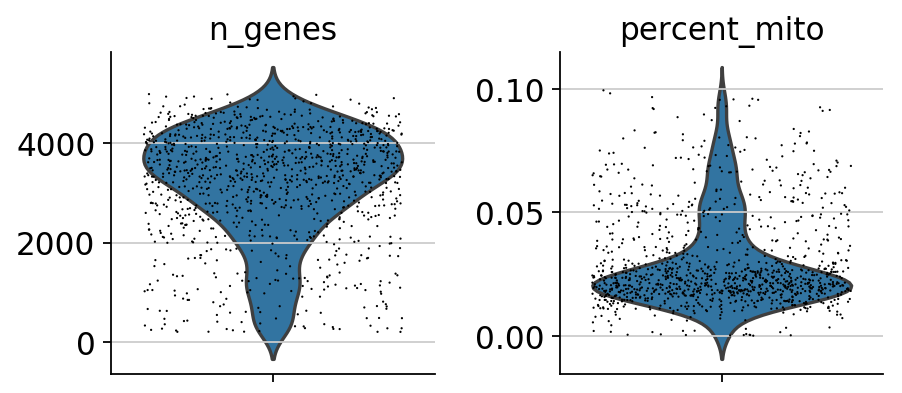

In [30]:
sc.pl.violin(adata, ['n_genes', 'percent_mito'],
             jitter=0.4, multi_panel=True)

In [31]:
adata.raw = sc.pp.log1p(adata, copy=True)

In [32]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
    finished (0:00:01.21)


In [33]:
sc.tl.pca(adata)
sc.pp.pca(adata)

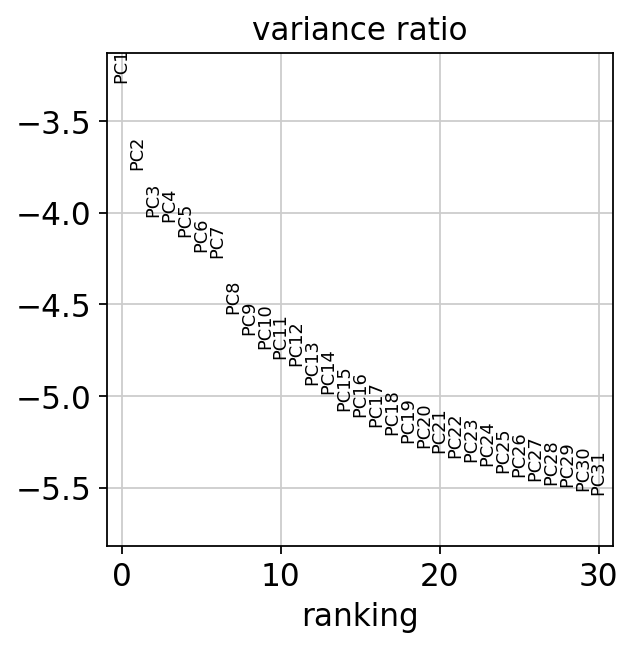

In [34]:
sc.pl.pca_variance_ratio(adata, log=True)

In [91]:
# Adjusted to 30 PC's - better results
sc.pp.neighbors(adata, n_pcs=15)

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished (0:00:00.32) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [92]:
sc.tl.umap(adata)

computing UMAP
    finished (0:00:03.10) --> added
    'X_umap', UMAP coordinates (adata.obsm)


In [93]:
sc.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.07) --> found 7 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [94]:
sc.tl.paga(adata)

running partition-based graph abstraction (PAGA)
    finished (0:00:00.03) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)


--> added 'pos', the PAGA positions (adata.uns['paga'])


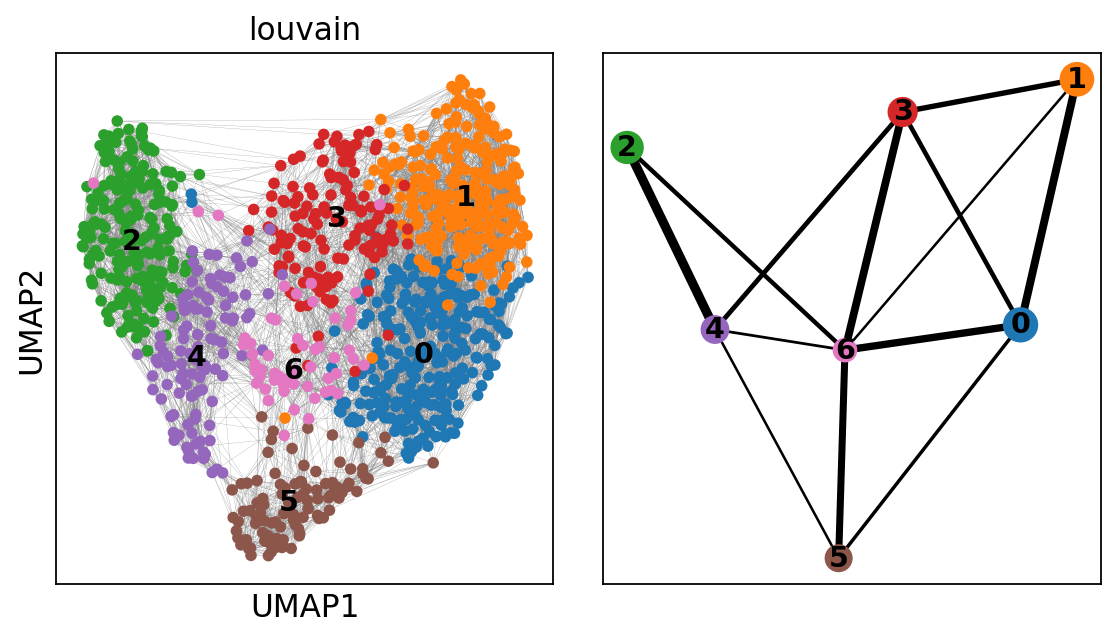

In [102]:
sc.pl.paga_compare(adata, threshold=0.15, basis='umap')

In [96]:
gene_names = ['Vim','Eomes','Hes6','Neurod6']

saving figure to file ./figures/violin.pdf


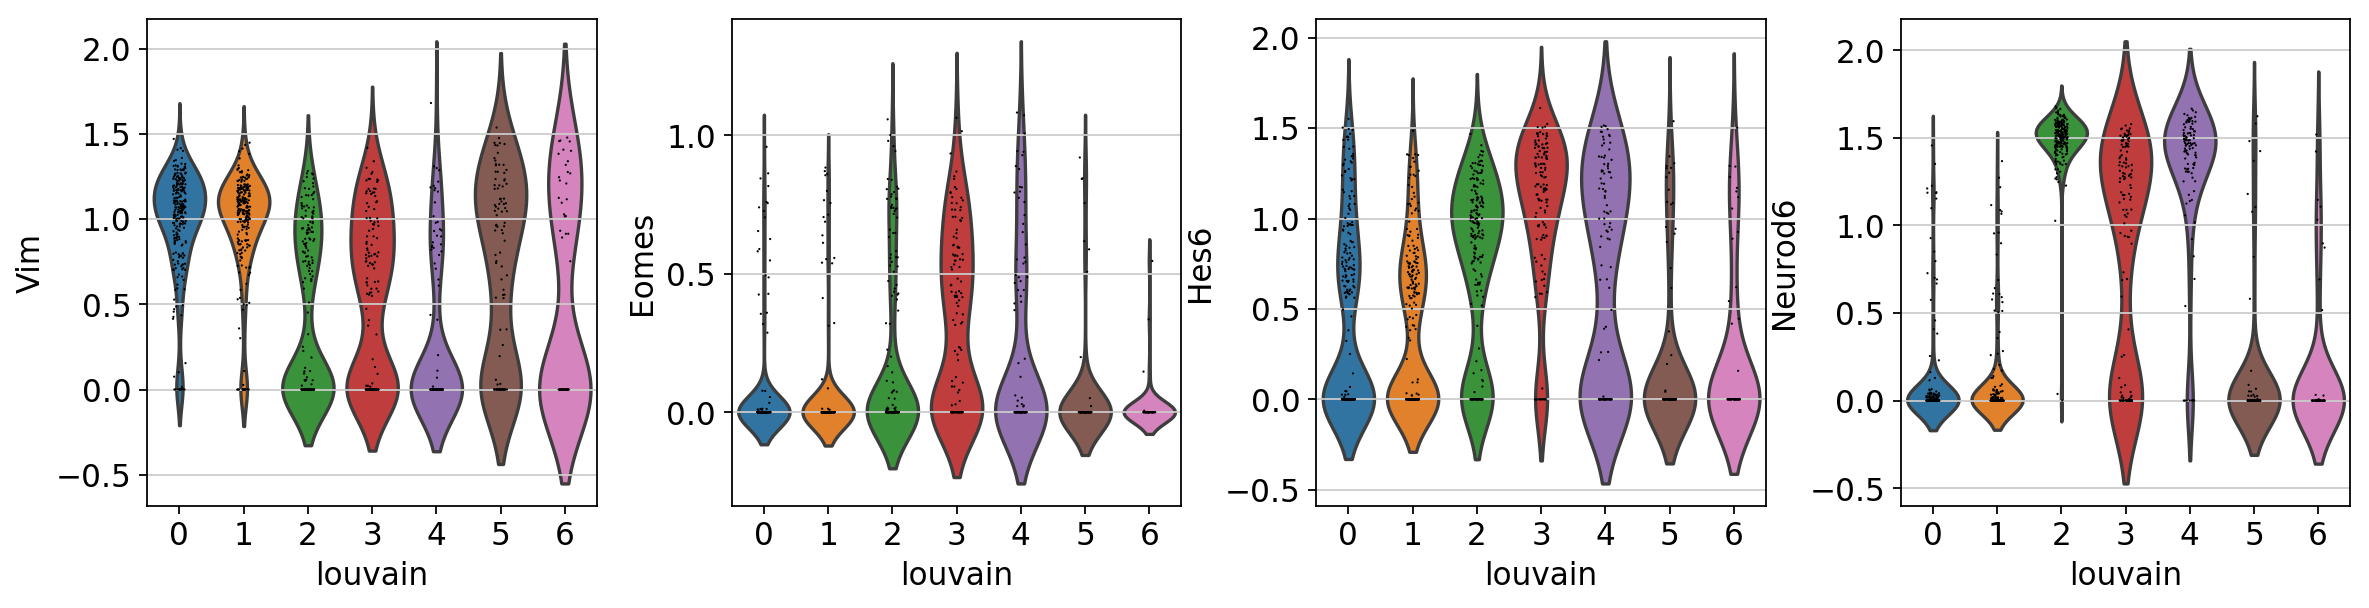

In [97]:
sc.pl.violin(adata, gene_names, groupby="louvain", save=True)

--> added 'pos', the PAGA positions (adata.uns['paga'])


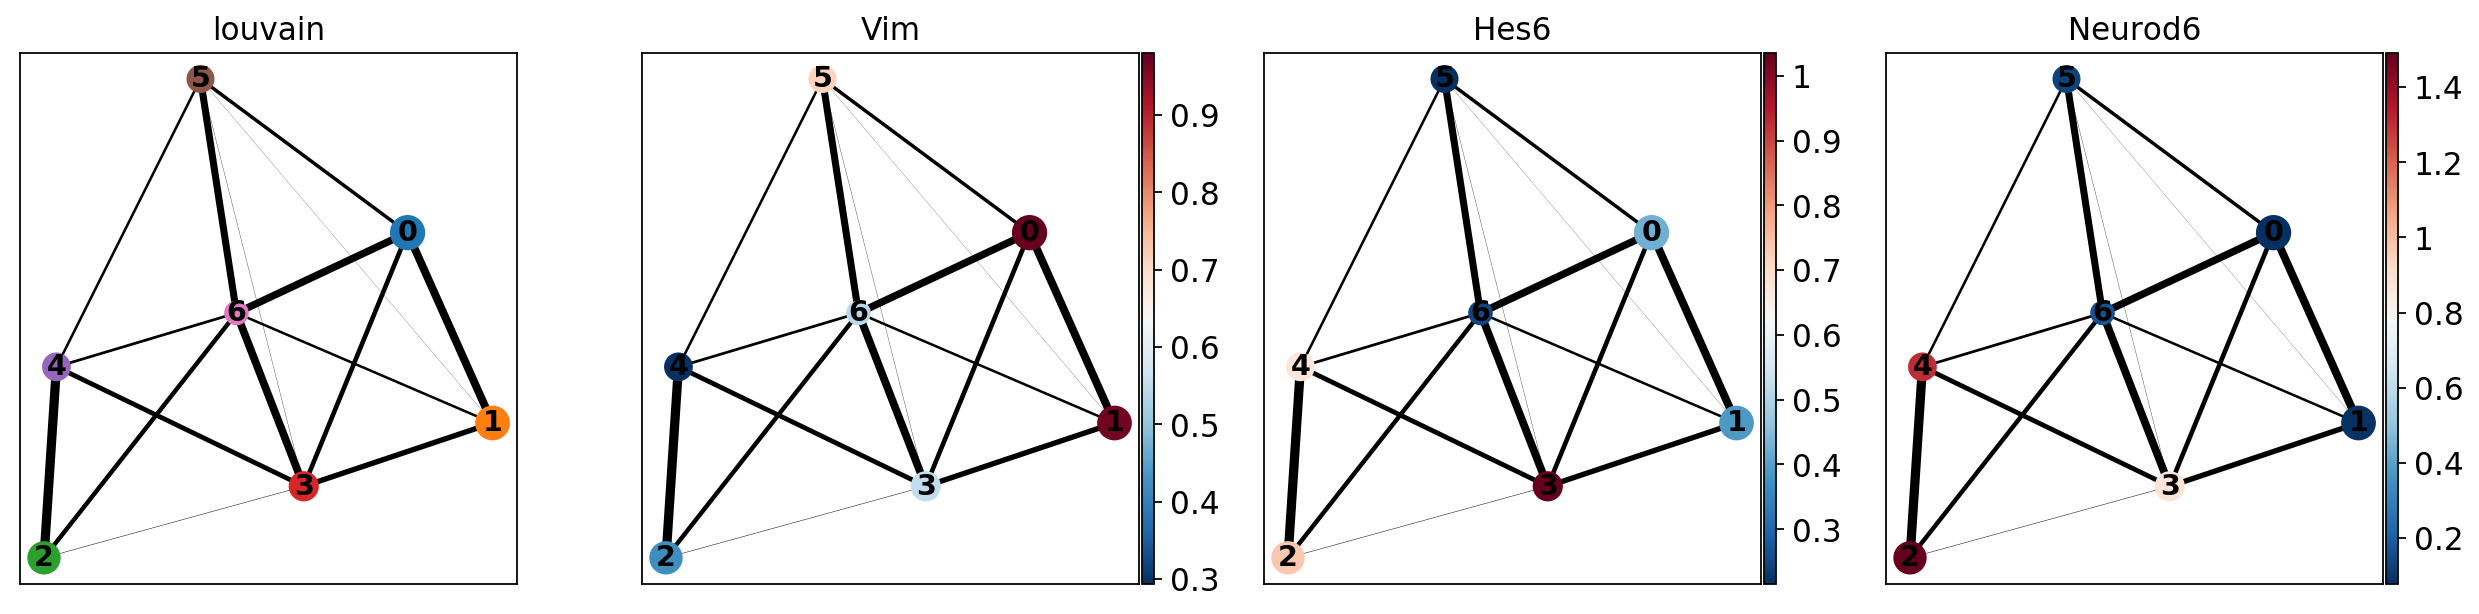

In [128]:
sc.pl.paga(adata, color=['louvain', 'Vim', 'Hes6', 'Neurod6'])

In [25]:
adata.write(results_file)

ranking genes
    finished (0:00:00.49) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
saving figure to file ./figures/rank_genes_groups_louvain.pdf


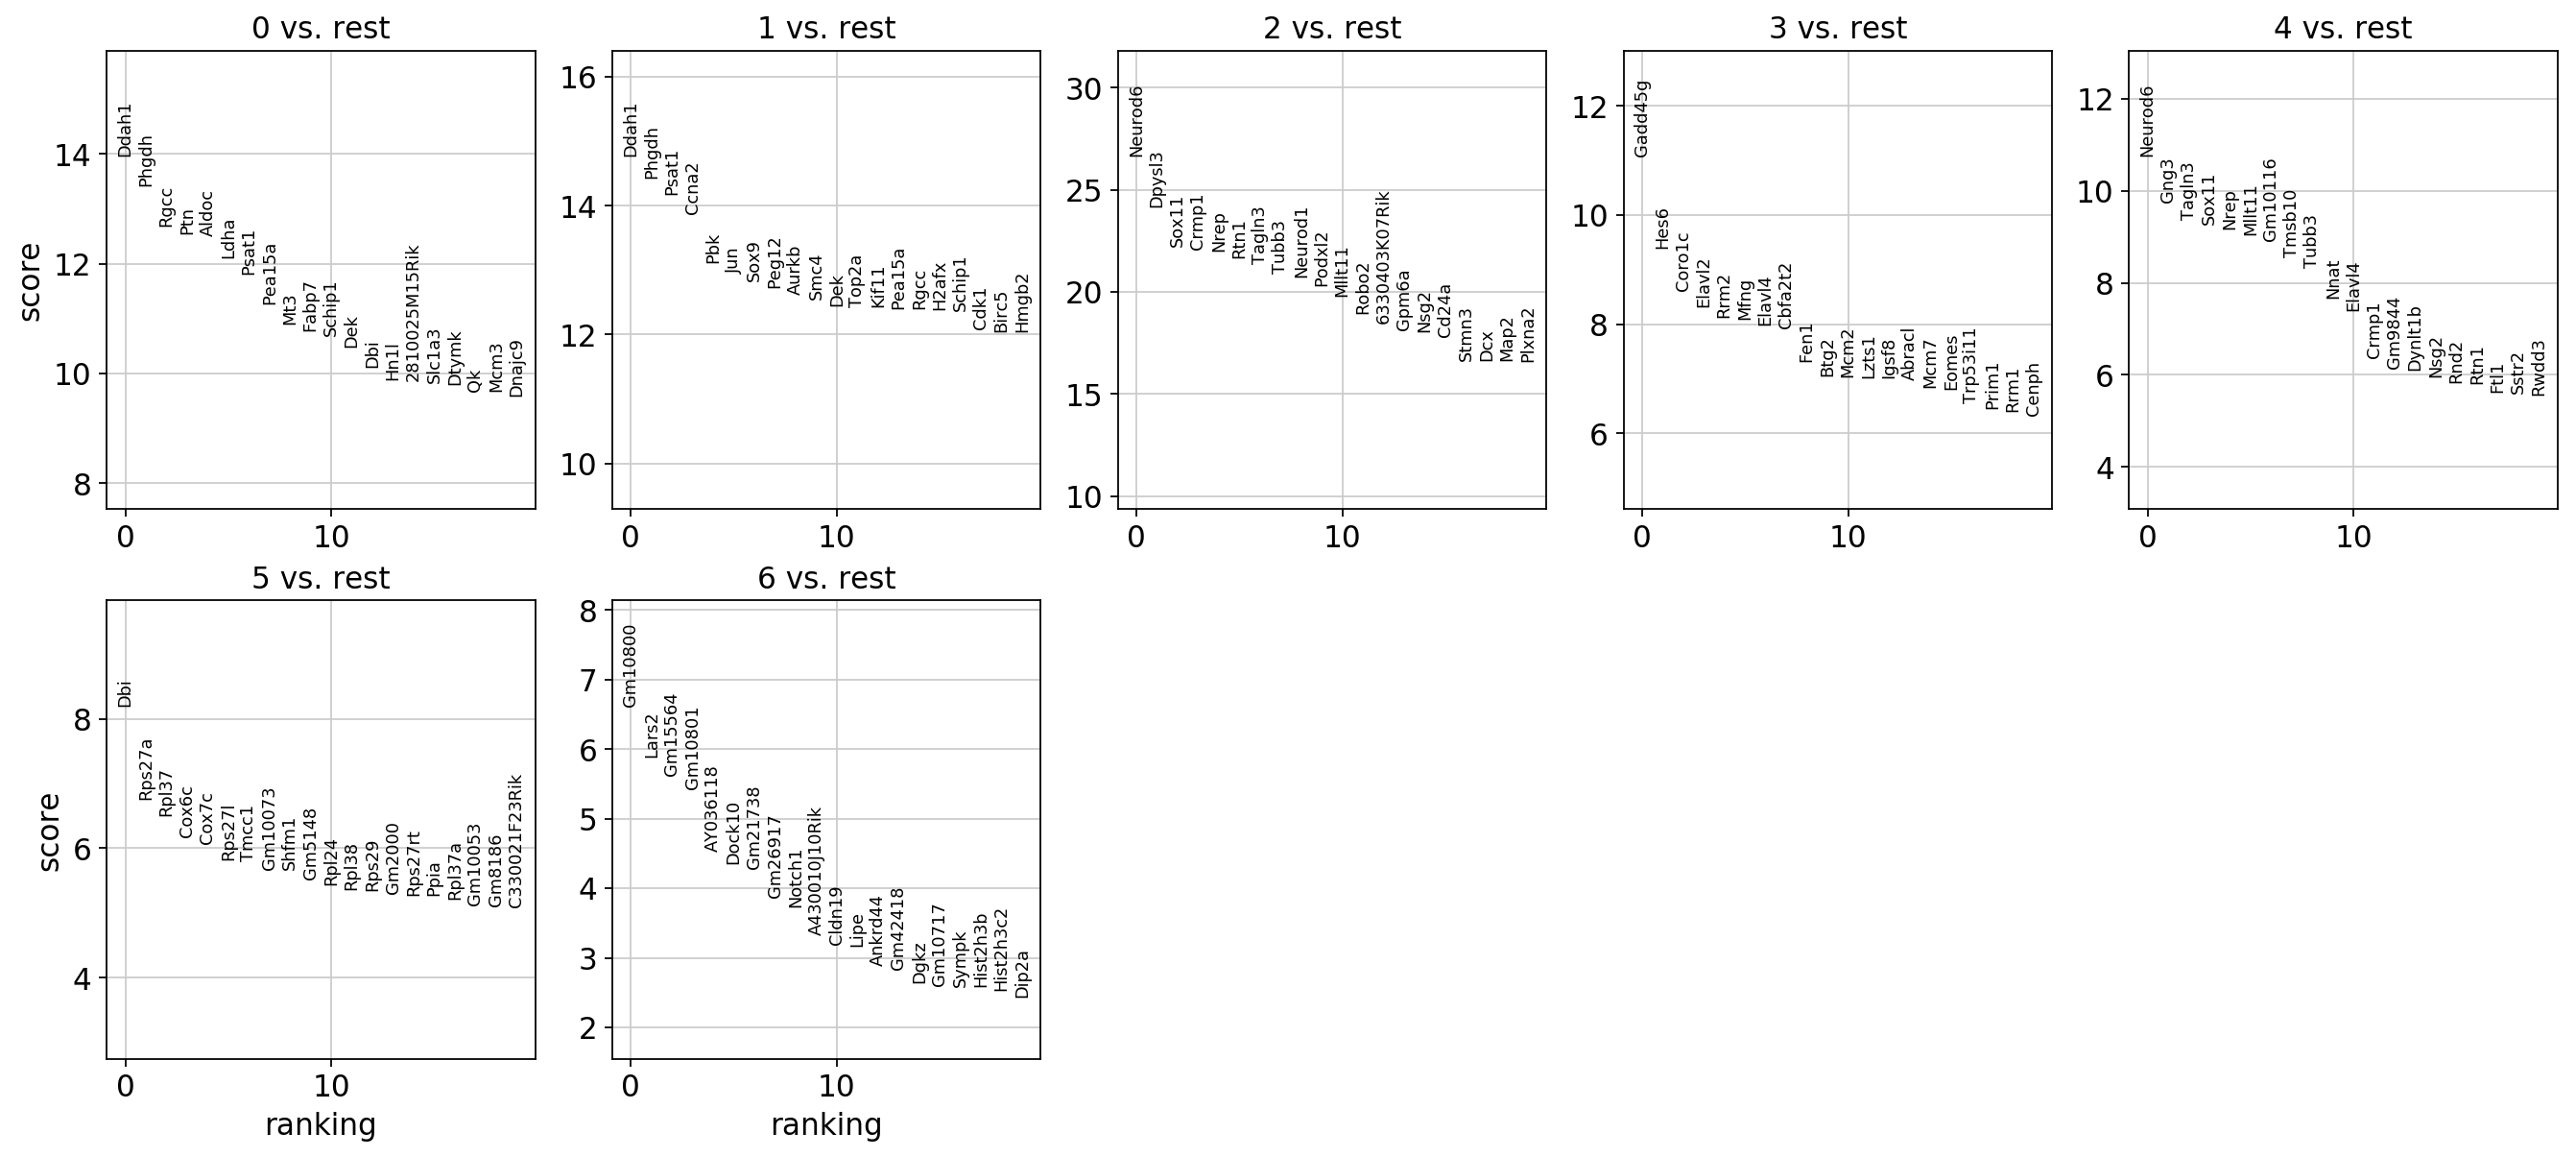

In [124]:
# Find markers
adata = sc.read(results_file)
sc.tl.rank_genes_groups(adata, 'louvain')
sc.pl.rank_genes_groups(adata, n_genes=20, save='.pdf')
adata.write(results_file)

In [105]:
# Plot using Fruchterman-Reingold algorithm
sc.tl.draw_graph(adata)

drawing single-cell graph using layout "fa"
    finished (0:00:04.62) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


saving figure to file ./figures/draw_graph_fa.pdf


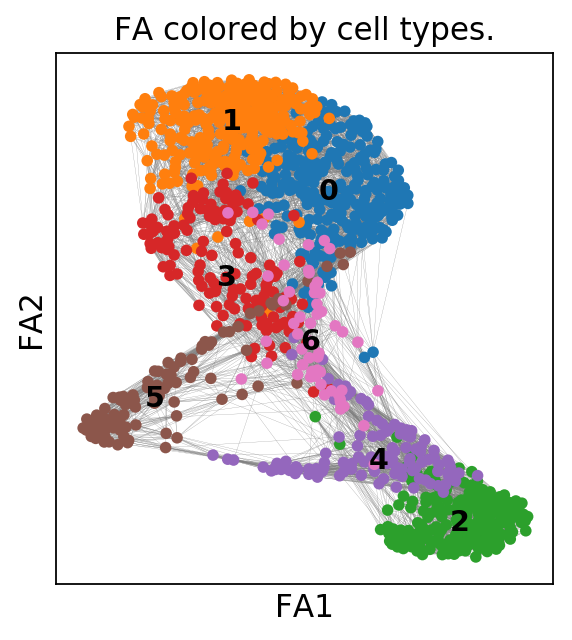

In [107]:
sc.pl.draw_graph(
    adata, color='louvain',
    title='FA colored by cell types.',
    palette=sc.pl.palettes.default_26,
    legend_loc='on data',
    edges=True,
    save=True)

saving figure to file ./figures/draw_graph_fa_annotation.pdf


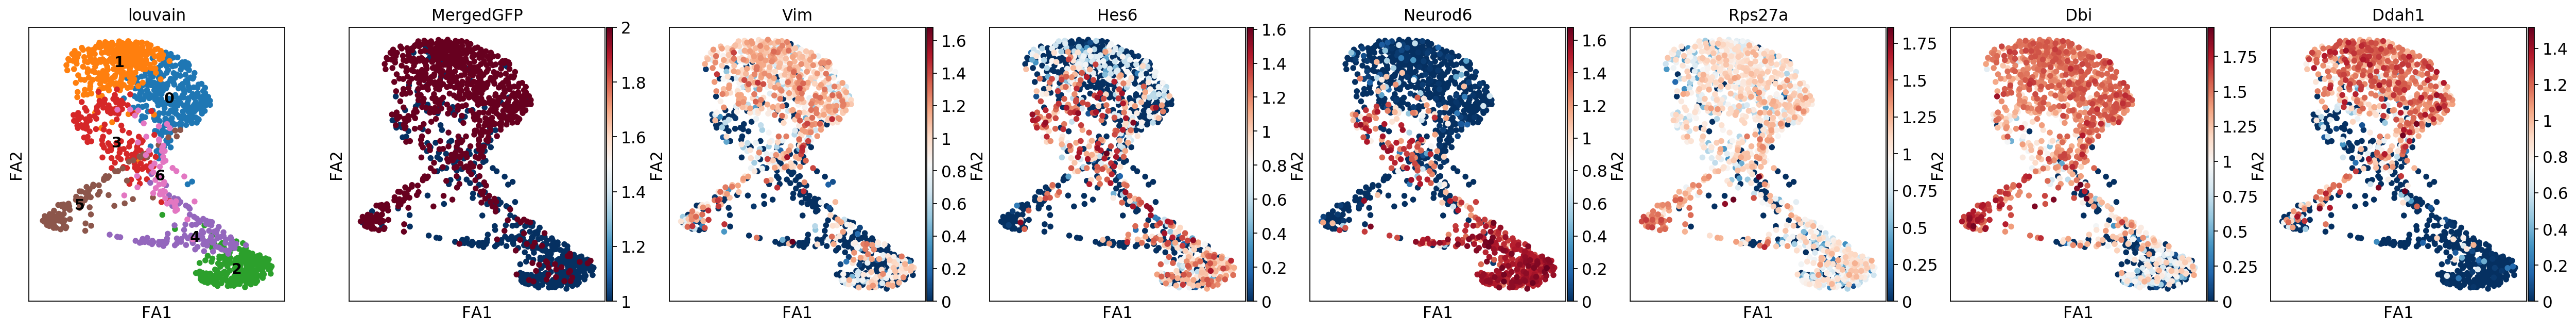

In [131]:
sc.pl.draw_graph(adata, color=['louvain', 'MergedGFP', 'Vim', 'Hes6', 'Neurod6','Rps27a','Dbi','Ddah1'],  legend_loc='on data', save='_annotation')

running partition-based graph abstraction (PAGA)
    finished (0:00:00.03) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
--> added 'pos', the PAGA positions (adata.uns['paga'])


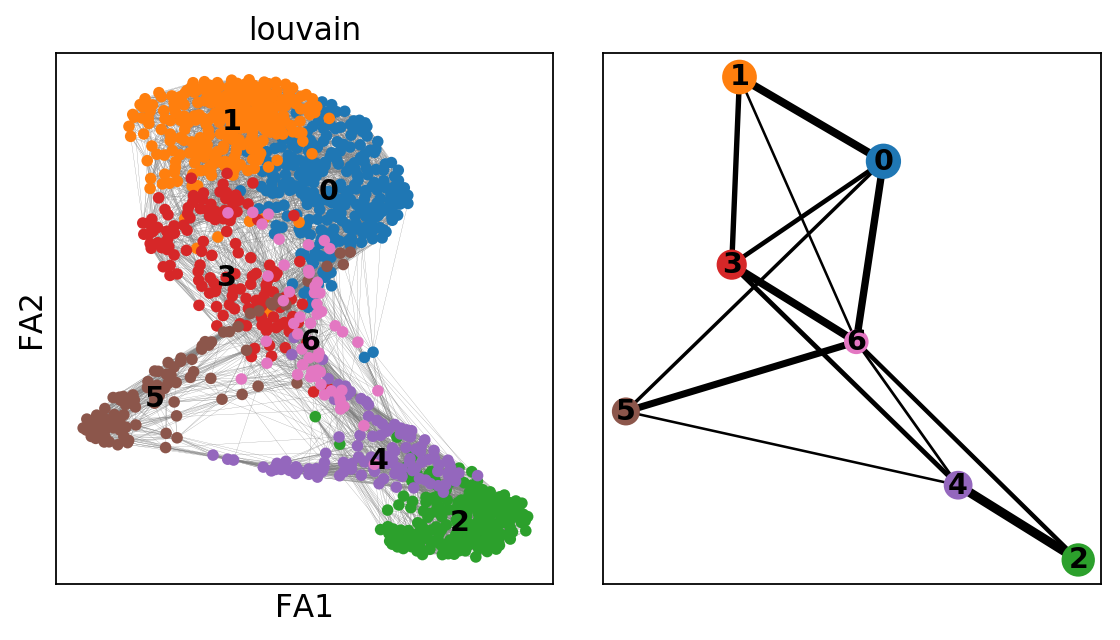

In [110]:
# PAGAdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcgAAAEgCAYAAAAwtuMFAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsnWd4FFUXgN+7NaEkBAKhl9B7FaVIlw4iIiKiIAIqKCBKF0Q+qiAoIk0UUFBURBBEOkjvvffeSxJIyNb5fszOZGdnEwIKiMz7PPPAzty5c+fuZs6ce5qQJAkDAwMDAwMDLaZHPQADAwMDA4N/I4aANDAwMDAwCIIhIA0MDAwMDIJgCEgDAwMDA4MgGALSwMDAwMAgCIaANDAwMDAwCIIhIA3+FQghOgghYh7h9ScJIZancLyOEEISQmR4mOO6G4Hj+reO08DgccQQkE8YQojpvgdo4FYmoF1FIYRHCPHXoxqrwYNBCHFOCNH9UY/DwODfjiEgn0yWA9kCtn0BbToA44GyQohCD3d494cQwvaox2BgYPDfwRCQTyYOSZIuBWxu5aAQIi3QCpgM/Aa0T02nQog3hBD7hBCJQohLQohv/I7lEULMF0LcFkLECSF+FUJkv0t/nYUQx4UQTiHEUSFEe79jFp/m+7av33hgsO9YCSHEn0KIW0KIK0KIWUKIqIBzxwohYoQQN4QQn5H6v4UqQojdvnvcKoQo6+szve/emgXcQwMhhEMIEXmf85ZBCDHVdx9xQojVQohyqRxrsGutA3IAY33z507N2IUQBXztWwkh1vvGekAIUSfgnLvNfWkhxErfvdwSQuwSQlS/3/sxMHiQGALSIBgtgaOSJB0AvgfaCiEsKZ0ghOgCTACmAqWAxsBB3zETsADICFQH6gC5gLlCCJFMfy8BnwOfASWAr4ApQogGAU0/AeYDJYFJQogcwF/ATuAp4DkgA/Cb37V6AW8ga8mVgVDkF4LUMAr4EKgAnAUWCiFCJUm6BfyE/mWiPfC7JEnXkrnPu83bn0AWoCFQHtgArPQXOvdIU+AiMBB55SDHPY59FDAWKAOsBuYLIbL6xpuauZ+NPG8VgbLILzWJ93kvBgYPFkmSjO0J2oDpgBu47bf9GdBmPdDd938TcA54PoU+BfJDd0gyxxv4rpnLb19BwAvU8H3uAMT4Hd8MTAnoZyaw2vd/CyABYwPaDAOWBOyL9LUt5/t8Bejtd9wEHAeWp3CPdXx9vOy3LwyIA9r5Pj8DuICsvs+ZAAdQ/z7nrS4QC9gD9u8DegSMK0Owz8n0e075fv32pTh2oICv32DzNuge5j4eePVR/x0Ym7GlZjM0yCeTNcgagLJ1UA4IIYogv93/CCBJkheY5d8mCNmArMCKZI4XBc5KknRW2SFJ0lFkQVUshXPWB+xbF6T9toDP5YGaviXD20KI28Ap37H8QohMQGZgo99YvMCWZMYRiP95ccB+ZUySJG0CDgGv+5q0Qb7Hpcn0dbd5Kw+kA64H3E8RIH8qx5sq7mHsweZN+U5SnHvfv2OA6UKI5UKIfo+LfdvgySTFZTOD/ywJkiQdS+ZYB+TfxXm/1U8BSEKI7JIkXQhyTtBl0oDjyZWNSamcTLBjgfviAz4ry7m9g5x7CQhJ4Xr/BFOBt4FPkZdxp/kESTDuNm8mZA2zRpBjsfc7wBS4l7EH425zjyRJA4QQ3yMvGdcFBgkhOkqSNONvjdzA4AFgaJAGKkIIK/Aaso3OX8MsDRwA2iVz6gXgMlA7meMHgNxCiFx+1yqIbFs7kMw5B4GqAfuqptBeYQdQHDglSdKxgO22JNvTriIvKSpjMSHbzFKD/3npkbWng37HvwfyCiHeQ7YpTkuhr7vN2w5kDdMd5F6upnK8wXAC5iD7UzP2YPOm3H+Kc6+cJ0nSEUmSPpckqSEwA3jzb9yLgcGD41Gv8Rrbw92QbZALkzn2IvLDU2e/AvoDxwCRzLnvAXeAbsj2xbIk2clMwB7kpd3yyA/VLcAmv/MDbZAtfGN5x9dfd2Q7ZgPfccUG2SxgHDmBa8AvyEvF0cjOIlOBUL97uQE0R16uHI9sS0yNDXKf7//FgTnIQi40oO0sZPvdilR8H3ebtw3ALqAekBeohOzYUjlgXPdig1yJ7NiUA8iUmrGTZIM8HTBvCUC21Mw98nLxl8iOWnmQhe0BYJLvfDPyMu/bj/rvxNiMTZIkQ0A+aRspC8hFwKJkjhXyPSBrpdB3J2Rtwom8pPa137E8vofybeAW8CuQ3e+4RkD69nVGdgJxAkeBN/2OBRWQvmOFgbnATZ/wOQyMAyx+534BxPi2z4GvSZ2AbAzs9QmRbUD5IG1r+dq2TuV3ktK8hfmEynnf8bPI9uF8AeO6FwFZxe8e3KkZu5+AfAXY5Dv3EFA3tXOPvLz9I7KQdSC/XEwG0gV8px896r8TYzM2SZJkbcDAwOCfQwjxKrJQyy5J0mMVwpDc2IUQBZBfUspKkrTrUY3PwOBhYjjpGBj8Qwgh0gD5gL7A5MdJOD7OYzcweFAYTjoGBv8c/ZDthZeBoY94LPfK4zx2g/8AQoguQog9vixLcUKIjUKIRo90TMYSq4GBgYHBo0YI8TxJ/gYmoC2yR315SZL2PJIxGQLSwMDAwODfiBDiBtBXkqTJj+L6hg3SwMDAwOBfhRDCDLyEHBq04VGN46EIyMjISClv3rwP41IGBgYGBv8g27dvvyZJUmaAXCJUSuRekislcQ3nfrSJ6adIkjTFv40QoiRyOsMQ5JCwFyRJ2ntfF/wHeCgCMm/evGzbFpgy08DAwMDg344Q4rTyfwdeWops99XPBOl0oiRJFe7S7DBy9q4MyIlLZgghakiSFFiv9qFgLLEaGBgYGKQKAZiDV6i7O6lwd5EkyYmcsQtgmxDiKeB9HlE6QkNAGhgYGBikGvN9ysf7xATYH+oV/TAEpIGBgYFBqvhbGuTd+hZiBPAHcjrF9EBr5Eo2jywW0hCQBgYGBgapQzxQDTIrclH0rMjl3PYgFydY8sCueBcMAWlgYGBgkCoepAYpSVK7B9Lx38AQkAYGBgYGqUIWkI96FA8PQ0AaPFIkScLj8YAkYTKbMZmCpwf2er14PR6EyYTJZELc51usx+3G7XYjSRJmiwWLxXLffRkYPHmIB6ZB/hsxkpUbPDIkScLpcOB2uXC73TgdDrxefRCycsztduNyOnG7XHft+/iG7czrP4oN037G5XAAspB1uVwo6RU9brcsnIOw/Zc/+Cj6Wd5LU4TvO/TGeefei1t4/MZrpHQ0+C8gkIXG/WyPI4YGafDI8Ho8OsHhdrmw2bVe3W63W/PZ4/FgkSSEEOr5/lrghm9/5rs3e6mft81eQNcl3+MNEIaxF68w+52POLR8PdmKFuCVCf+jYLWnuXbqLN+80lVtv/6bn0gfFUmzoT1TfW+K0Ffv1evV3ZeBweOIoUEaGDwEUq1TBdG+JEnC7XLhSEzEkZiI0+FAkiTWf/MT33fqo2l7YOlazu7ajwhYvv2l22AOLl2L5PVyYf8RJjV/G0fCHQ6t3KATpgeXrbuXW9MJda/XG1Q7NjB4nBACbCZxX9vjiCEgDR4qt6/fxOMTHmazWXfcbNEvagS2U7TFQA3t0tGTzOzUF8kTZJnW4cRkMmn6OvrXJk2b+Os3ObVtD1GF8+vOz1mqSEq3ZWDwRKA46dzP9jhiCEiDh8KNsxcYWekFPowsS58cz7D9lz8QQmCz2zGbzZjMZswWC16vF0/A0qvFasViscgCzmLBZrcH1cZObNyBFGR/loJ52TxrHn9N+B7J7cFut2Oz28lVupimnTXETmT+3OQqV5zaH3bE5BPWOUsXpV6fd9j9+zKOrU9dTmGL1ar5bPI5FxkYPM4oYR73sz2OGDZIg4fCT+99zMlNOwG4deUa01/vQeFalUmXKQKTzYbL5VI1Sw+y1mi12QBZYwwmcALJXb6Exi4JEJErO1eOnuLK0VMA7JiziB6rZiOAVuM/YcLzHblx+jz2dGlpMXYAaTNmAKDJ4B7U6PI6CTdjCU2fjs+qtST24hUASjSsSeffp2IKogErKN6xXq8XkxAptjUweJx4XLXB+8F4pTX4x4m5cJnxjd7gXXshhlVowsktuzixcaemjSvRwbndBwFfqEcQR5yUPD9NJhOWgOXYzPnz8OKYjwgJSwdAwepPY7ZoBdOR1Zs4s3MfbrebzIWjGbB/Kf13LWLkhc1Ubd9S0zZ9VCQ5SxZh8bCvVOEIsG/RKvYv/uuu82A2m7FarZiTCSVx3klk1fgZ/PjuQPb+sfKu/RkYPGqEMDRIA4O/xcyOfdi3aBUAZ7bvZVKzTuStWJq9C1eobawhdqKKROP1eu87DtFitYIQuF0uEmLimN9nJIdXbCDPU6Vp/HE3Cj5bkQEFquvO87jcaqiIMJnIXCgfVpsNYTJhs9vlsAzA4lv2vXH2oq6PayfP4nG7MZnNdx3/mZ37WPf1bMxWC9U7v0ZWn41zQpM3ObRiPQB/ffUdL30+kNrd2t/XXBgYPCwMDdLA4G8Q6PEZe/EKNbq8Rt6KpQFIlzkjr0wZRmhEOC6nEyEEZrOZ+BsxfNfuQ/rlfIZxdV7lzHZtndTrp8/x+8AxzOs/istHTwJJDjxzug9m83dziTl/icMr1jP99R54PR5qddcKnAJVnyJnGa3tEVC9VoUQ8jKt14vbFydZrkUDTVtriJ0i9Z7F5XKp3rPJcWbnPj6t1Jw1E2eyatx0RlRsxrVTZzm/95AqHBVWjP0m2X78Ob19L4dXbdBp3QYGD5onzUnH0CCfMDxuNx6f1haYRUaSJFWjux+HkrjLV5n1dn9diIQ9bRqiK5en96Z5XD93kdDwdJh9NkVJkpAkCYvVytwPhrLj5z8AOLFhB181bs+wMxuw2GzcOHOeoWUbkXAzFoBV46bTd+t8shYpgNVmY99C7RLl9VPnOLfnIDXfbUumvDnZu3AFkQXyUKV9S3mdyEfM+cvcOHOefE+XwWqzqUJRGZvL6eTG6fOYLGa8bg/pMmfi1W9GEJEzm9rG43brbKQK66f+hNvhVD8nxt1i83dzKfNCvXueX7fLxaQX3mKfbzk2qlA0PVbPJjxblnvuy8DgfhBGJh2D/yputxuXy4XX48Hjy06jZpXxeHAkJuJyOnE6HLhSka0mkJkd+7J73lKNJ6ktTSitvhqMxWblzI59WENsqnD0RwjBgQC7Xtzla5zZsQ+v18u8/qNU4QjguB3Puq9nA7IWmTl/Hs25FptNFWJF61XjxbEDqN7ldSyhIXjcboQQLBk+gcFFajOu9qt8XKAGZ3ft1wn3wys3sHj4BLxuef/tq9c5t/OApk1K8Zxmm/5eLx48So6SRShSu4pmf+33k68J63a72fbLH6pwBLh85ATLRk9J4epJ3ImN49TW3bgS7z0jkIGBP0+SBmkIyCeIwCU5SZJUYRaYvs3jy1d6LxxYuka3r+uS74jImY0+OSsxvEITPs5fg93zlqrHrTabqsVGFY7WnGu2WomMzs3013uwZeY8Xd/+oR4vfT6QkPSyc44wmWg69EPSZ84k30uQdHI3z1xg8dCvVIEYd+kqv/YcrksmcHrrHt25p7fuwev1smrcdL6s9zo/vNWPayfPBp2T6u+0wZ4+rWbfttkL2Tl3MZ0XfEOr8YOp3uV1uiz8Nln7o9frxe1ycT3INa4eP43T6SRRSZYQJMxl86x59M7+NCMqPk/fXJU5EhD/aWCQWp40Jx1DQD7p+H64wYThvQhIj8tF5gJaLc4aGkKmAnmY2akv8ddvApB46zY/vzcIr8ejxkAq12o+uj9pIyMAWTg2/7QPCTdi2DJLLxxtaUKp2vEV9XORWpUZfm4j7y2ewdCTa6n7YaekWwwy3stHTuiEyeVDx3XLzvmrVNCdW6BKeZYOn8j8PiM5vnYrG6f9wpiarfAE0bqjCkVTq+sbuv1bZs3DFhpCjS6v88r4wZRsVCvIKGWUcRarX10XLlK8YU1ZyPuWx51Op+a4Iz6BHzsPwJlwB4Db127wwzsfJXstA4OUeNJskIaAfIIIFkt4JyYOR3xC0Gw1gd6Zl67F8sGoH3j+vc+Z/PMqVYAeWrmBfnmqcHH/UVUDs4bYaT6qL2arhWsnzmj6ib9+k5jzl3A6HKp253a7yV2hJIOOrKLrilkMOrKSml3fICEmTncfZpuVNl+PIHuxgpr9oWHpKV6vOhlz50jxvgHyPl2G0Axhmn3F6ldXkxfY7HbsISEUq1OVRgO7YkubBpPZTMVXm1H7/TfZPnuB5twbp89zdO1W3XUAshbRZ+ZJnyWT+n+308mPXQbQPbwkAwrWYNvPCzVtlTnNVqwgb/zwBbnKlSBLoXy8MLIPFV97QdNWsSN7vV4kSeLmuYskxt3StLl08JhuKdnAILU8SRqk4aTzL+bqjTjmLNuK2WTipXoViQhLe/eTUsBsNiPsdrweD86EO0xr+wF7fl+OxW7juZ5v0WDAe2pJKYvFQuKt2/zSfTD7/lxNVJH8zBERbL8pV8b4c90ertyMo3+Hxsxo96EaJyh5vYRnj6LP9gWEhqcHIN8zZdUkAQCZC+YlIld2AFxOJ6aQEHX51xpiJ7pSOUBeWsxbsQzZihXk4oGj6vkep4tvX+3GtZNnadj/3bvet8lkwmq14vGVzAKwp0tLx19lLfDaybMUb1CTJkM/xJGYiM1mUzU1h8PBc33eoUb39njdbtJmCMditZIuMoKrx09rrpPOp/0GUq5FA1Z+MY3T2+Tl2vSZM1Hng47q8SUjJvLXhO8B2Ynn29bdyFO+pGpXNZlMWKxW3C4XJZvUpvTzz2H1OS7tnreUPBVKkSFnVrU/p696CUBkdG4y5c3J9VPn1H1FalcxEhcY3BdPWj1I8TDK8FSoUEHati11KboMZE5fuEaV14Zw5YasQeXOmomNswaQOWPYXc5MHQsGjeWPT77Q7Pvgr58oWO1p9fP0tj3Y9N1c9XOCxcbPxSrj9Wk0ebJlYts3PemdvaKu/6HnNqpZaa6fPs9PXQZwYv12cpUtTosvBnLt+BkuHzpO4dpVKFClAq6ApUEAm92OyWQi9uIV/vjfONZO+UGTZ9WeNg2jr+3AGhKS7H1qqmoIgUC7dByYeQdkgaSks/MXNkofISEh7F/yFxObdsTtG3e5lo1oO+MzbHZ70LhIj8vF3kWrSIy9RammdUiTIVw9NqpqC44HpLB7dcpwnvVbQsZv3EII1n79Iz++8xFejweT2UyriUOo2KaZ7rpCCK4cOs6PXQZybtcBCtV4hlenDCciR1Zd20CcdxK5sO8wUYWjCQ1Lf9f2Bv9NhBDbJUmqAFDAGiqNidSviKSG5y/tV/t5XDA0yH8pk39ZpQpHgDOXrjN9/jp6vtHwH+n/1Jbdun0nt+zWCMi9AaETadxOIu/c4kpa+eEeli6UsKyZyVIwH1d8cYkA2YoXUoUjQKY8Oei88FtsvpRyM9p+oIZzLBo8jtaThlLx9eaaa/mHmoRny8ILw3uxdtIsTRtnwh0SbydgslqDJj5XYhmTdkjg69fr9cr5Uc1mWYg6nez7YxWJcbcp1bQOGbMnI0AkCUdiIkVqV2HAgWXs/3M1kdG5KFjjGbW+pSXIeMxWK2Werxu0y+wlCukEZPbihXTtFGHucjj4rddwVRv2ejz83m8Uldq+qHNIkiSJnKWL0Wv9r8HvJxkOLl/H1y27kHAzFnu6tLz+7aeUf6nRPfVh8N9DCIHZ8uRY5p6cO33MuJ2gd8e/FWSfwuWjJzmzc1+q+89fubxuX3SlcmqYh9vtJnPBvJrjksnELZusrZnNJvp3aooQgg6zvyRHSbnaRa4yxWj33Wckxt3m/J5DquOKxWLBZDYTc/aiKhwVloycqBtLYBxmaHgYpQNiB0s2rYM1bSgupzOoBuoN5niErJmGhIaqTkKuRAdf1GzN9Fe7M/udjxhaqgGXj5xINsG4JEm4XC4icmal8pstKVSzkqo1KrGTgeWuUqLRwG7q/AmTiZpd26nLzP7XdDocOBITib1yXWebvX3tBq6EO0G113vJVHRo5QaWjprM9LYfqGE1jtvx/PB2/7uGiEiShMfjMeyb/2UEmMzivra7di1EXyHEViFEnBDiqhBigRCixF3OGSSEkJLZsvja5E3meP27jcnQIP+lvNakClPnrsHti78LsVtp3bCSrp3X4+HbV7ux7SfZsSPPU6XpuniGRoMLRu0eHTi0Yj1H/9qMLW0o9ft2IVf5EqoG4vV6aT6qH5ObdSL+Rgwms5mmQz6gSaXKHDtzmXpVSlI0WrYj5i5XggF7FuO8k4gtNIQN037hs2ov44xPIDxbFt78+SsK+rxBXXf0D1ln/B3dPv+iyMp4Xpk8lKjC0Zzaupu8T5Wm9gcdkm1/dtd+1kz6Aa/XQ5UOrchesjAA5gCBJ4Rg34KVnN25X90Xf/0my0Z/TZspw7HabHg8Hlng3YtXr9utyxWbHBmyR9F/1yJObd9LmohwMuSIwulwaJZr3S6XGtaSLjKC6MrlObFhu9pHkdpVSJMhPOiysMfjCaphB/Jrz2HJxlXG34gh9tJVIvPmCnpcEeDKMrDJZNKE8Bj8NxCAMD8wvaoGMAHY6rvUYGC5EKKYJEk3kjlnNDApYN9sQJIk6UrA/vqA/9JZcn2qGALyX8pTJaJZOrknU+asxmI20aVVbYrky6Zrt2veUlU4ApzeupvlY6by/JAPk+3b6/Uy5cW3ObJajoczWSwUb1hTZ4vL81Qphp/dyPEN29j64+8sHj6R0PCZNB7UnaLR2XWZd2yhIdyJjWP2uwPVsILYi1f4tcf/6LvldwAsdhtpMoRpNKBK7V7it17D2TV3CRlyRNF4cA8KVn9aMxaP2409bRoaDHjvrnN3ft9hPq3UHFeiLCi2zprPB+vnkK1YwaAerQk3bur23b52A4/Hk5QUXZJ0WqFSosvtculDYu5RMHg9HrKXSFpWDczQE1jeq93MsSwcMIbTW/cQXbkczT/t67us/rqKI1RKwir+Rgwrv5iW7PGowtFkypMz2ePugLhZr88hKlh9T4PHGAHiAXnpSJKkWSISQrwGxAJVgAXJnHMbuO13Ti7gWeC1IM2vS5J06V7GZPx6HzEOp7wEaQ+ScaVquUJULZf00PS4XPzWZyRbfphPWFQkzw/tyaWDx3Tn+e87t/sAJzbuILpSOXL66h8eXLpGU43iTkwcc3sOwxJi5/bV61Ro1YSqb7UG5HjD83sPs+HbXwDZy3Jmh97kLF2UqGIF1D7MFgtWq5Wrx8+owlHh/J5DgCwEvqzfViMcoyuXR5gEf43/DoDYC5f5+sV3+PjwSkJyJr0Q+D98E2Jv8XufkRxY/BeZC+Wj2fDe5KlQUhUAG6f9ogpHkG2V66f8SGR0bkLD0lGhVRON00nZ5vWZ33+0ZtzlWjZSl22tNhtmi0VTYUQpvqy8HATmZA3UHjdM+5k/Bo/DcTuBqh1b0XTIh5rl22DOckqohhACYTIh+S1dhmXNTNvpo3UC6MjqTZzeuY+C1Z8mW0AYjP+1FKFuMpuxWCw4E+7o4ziFwBpiJ0+FUrSeNDRFAft342gNHhNE6pZL/yHSI5sB9W+wyfMmEAMEM7rPFUKEAEeBsZIkzblbZ4aAfERIkkTPz2YzZc5qADq1qMGoD1ql+BBaPGIiy8dMBeTML5Obv02nXyfoPDGLN6gBwPIxU5nzwRB1/4uj+1OnRwdunr+s6/vQyvXglfs4tXkXwmymRmf5JSww+bgkSYyt9QrPvvUqDQa+h8lsxuN2YzabyV6iEGFRkcRdvqa2TxMRztXjp0m4GasJNwC4sO8Ijlvxmn3OhDucXL+dTC83VveZzWbO7jrA7Hc+0iyHxl2+xpTmbzH0VFLib0uIXXd/67/5CY/vZWT5mKn03baAkHRy2EzG3DnosXo2S0dN4U5sHBVfe4FSzz+nnut2ubCHhGCz25G8Xu7E3cKaLq36XSmxk4oANZvNGuF3etsevmvfS/28ePgEMubOTrW322juL9DBxuv1ymEndjtWqxWnT2AquFwu8CV6B/ip2yBWjZuujumVycOo2KZZUgJ2nxbsn1HJ6/WCJBGRMxtFn3uWg8vWqscqv/ESr3/zqW4ug2E2mXS2RyOU5L9JYLapeyBSCOHvjTZFkqSUciV+AewCNqZqXEKYgPbAd5Ik+dsZbgMfAusBN9AU+EkI0VaSpJkp9Wk46TwiZi/ezLhZy0h0uEh0uBg3axmzF29O8RylhJSC2+nk9tUbvD5tFJkL5CUsa2YaDexKlTdfxpWYyMJBn2va//HJ59yOiaXIc1V16c8U4aiw5fu56oM3h89+509i3G2WjZrMGl/8HsiC02Kz8fa8KZog/LhLV/mqcXvCc0RhCtB4MuXNQZYAZyCAqML5NJ9NZjMzXntfIxwVbl25rsYYAlTt2Epjg7WE2FXhCHD58Am2BzgK5X2qNJ1+/or3/pxB2Re11TuUhOrxN2IY37AdH2QsQ6+sT7H+25/VNkryd6vVqhGON89d5Keug3Rj3r9kDV5/jdRXOzLYC5Lb5UIIoRaQVtg9byljqr/MZ9VbsuHbn1nt08KVMS8aPA7hswVKkoTD4QhaAUQRzJ3mTKBB/3cp3qAGL4zoTeuJQ3Rtk8NssWDxjV8Z6/0kvDf4dyP+npPONUmSKvhtyQpHIcQYoCrwoiRJqfX6agDkAqb675Qk6ZokSZ9JkrRJkqRtkiQNBCYDvYJ14o+hQT4iNu46GnTfKw2eSfacqMLRmoB7kLO0RFcqT6W2LTT7XYkOHLe1mpnjdgKuO4mky5yRLoums3TkJOKv30Tyejm1eZembUJMHE6nE4vFQr3e73B0zRbdtQEOLP6LGu+1A5LsX9HPlNM53lw6dJyEG7E0GtiVhR+PRZIk7GnT8NKYAWTIEcW+P1erDjxmmxWvR2tzizl/iStHTwWdF5PZTGR0bkAWDBlz5+CjPYvZMvM3hMnE0bVb2LtgheacJSMm4PV4dLGG/tqW2r/JhBCC+f0+5cBSWcOKvxHDzI59KFyzEpH5gjuuuJ1OPqvWMmie1iwF86lp4aw2G2afPRMhdB656lj8xnR83Vamv9pdPXYTyOizAAAgAElEQVR07VadE1HCjRjsdju3r9/k8OpNRBbIQ1Qh7YuHP6Fh6VO0Xd8Ni8WiLjs/aPwdp8wWS6odogz+Pg/KBqn2L8RYoBVQU5KkE/dwaidggyRJ+rdoPZsBfQ7IAIxXvIeIssTldDpp3eBpbFbtH3WF4sk/vCRJovGg7mp2FSEEz771KrkqlFKrb/g/1EPC0lOsvrZYcLH61UkTIccw5i5fgg4/j6f7yh8oHtAOIGeZYnLGHYeDNBHh9N74G22+HqFrl6VQUoJxt8ulaiMZ8wSke7PbsEeEUfvDjvTfu5i3533NsLMbKVK7Cgk3YzXerR6ni4WDPldDJhLv3MEWlpb0UZH6iRGCxp+8T0SOrHh9FUmcDgehGcOp80FH6vZ8i5rvttU9tK8cPcWsTn1ZM2lmQHd+2o8QckFkYNZbfVnrqx6iIHm97P59KUs+ncSG6b/obK+HV20MKhxzVyhFjW7t1M8up1Nj2wxE0eSFT1AD7Px1sdbGJ0mEBczPM21f5ODydfTLXZmvW7zD8DINWTR4nK7/5Ep13QurJ3xPz6gKdE1blB+7DAial/afwuv1ynPmW3J2u1xGbcyHhRAIs+m+ttR1L74AWgO1JEk6lPphiexAI+DrVJ5SBtBXQg/AeO16iPgLkDKFc7FkUg/qdBoNwGuNK/Nqo8q6c9SHgSSRPmtmPj64nDPb9pA+SyThObMmPRi8XiSvV7aT+QTLa9NGsWTERE5s2E6aiHDKt2oi2wr93rYlSaJcqyas/Pxb7sTKOTvNNisJ12P49pWuVOnYiuL1qmOxWKjy5sscW7tFza6TpXA0z/V8SzNWr9PJzcvXKNmkNmu++g63U14ebDiwK2l9wjkyOjeZ8+fB7suAE8wmGnP+kly70jdfZquVVyYNZVaHPsRfv0n6LJHU7/sOZV9sQEYlbV3AQ9nlcmEymylWtxpdl37PgoFjOLFxh6bN5pnzqNqpNZLXKwtDxSPXnmTHXDR0PGun/Bj0O/2t90i13uPqL2fQe9Nvajmv0LB0uvY5yxSjx5qfdPs3z/yNg0vXkq1YAap1fg1LiF21Z5otFrxeL8tGT2HbTwsJz5qZDLmz6/qo9k4b7sTe4vyeQxSpU4XnPujIiIrPawT38lFTqNKhFeHZs6h9Bwplj8vF4dWbsKdNEzReNpBTW3czu8sA9fNfE74nc/481OnRIYWz7p9gcZYew2P2oSDggTnpCCG+QvY+bQbcFEIo2Tpu+7xVEUIMBypKklQ74PT2QDzwc8B+hBBtARewE/ACTYAuQO+7jcn4RT0klCBqf8oXzcOFlXK6t2B5VhVBp2gKSh/RlcojSRJx12+wYepPXD58gqJ1n6V0s7pyW5/NLCQsHZXeaMGWmb8Rf+0mB5esIe+EMnT5c7psM7PLNq1MeXLQY90vbJ7+KzcvXGLnL39yeOUGAPYuWMH7q2dT6NmKCCFoN2MMDfq/S9yV6+QoW0z3cN27YAXT27yvahClm9XlxVH9CMsRpbs3xUOz2HNVdaEf5Vs2wu1yseh/X7J99gLSZoqgwYD3GHJqHTFnL5KlQB5N0WV/D9PA6wghKFqnKpLXy7h6r2uOp80UkRQ36HKpy53+KHPhjyXETlShfKqHLsCZHfvY+8dKyjSTvdWjK5WnWL1qHFgilwEzWSw0G9ZTt4S7dMREjWa378+/+HCN9u986ajJ/NZb1uDPAiFh6chSKB9XjsgZjLKXKEytbm9oUth5vV6unz6v6cfr8RB36QqZ8+UKqq3GXrzC6GotuXrsFABF6lTl3T++xRJg/9TMzyq9D8XhlRsemIAM5iRixFs+JAQI0wOb686+f1cE7P8EGOT7fzZAk+tOyF/+m8AsSZISkun7IyAP4AGOAO3v5qADxhJrqnG73TgcDpxOpy4m7e+QIX2a5JOQ+4SIdlfSvinN32Z+30/ZNH0O01p3Y5USx+b3sFg55hviryV5SZ/avIuB+Z6lZ6ayfPPyu6rWGFUwHy1G9ycyby68fstVktfLpu9+1QjqqELRFKz6FPYgeUcXDByjWV7b8/tyrEG8Sv2rhYSGh9F95Q+UalqH3OVK0Gx4L+r2epvVX85g6YiJXD91jjPb9zK1ZRduX7lOtqIFNMLR6XDo6ln6X0ehSJ2qFKlTVf0ckj4ddXp20rQP1k+OUkV0+7osmKrWm/THcVv799ll4bd0mjORF0f3Z+C+JZRoUFPjwGIymVg3+QfNOcfWbuH8vsOafTt+WaT5nBh3m0YDu9J5wTd0Wfgt/Xcs1AlHp8NBqaZ1NOdlzJOD6KfL6oSj2+XCkZjI4pETVeEIcGj5Onb++qfuPv3JWbqofl+ZYrp9sRevcHLLrr+9HKrLcORzkDJ4GAhMZtN9bXdDkiSRzDbIr007SZLyBpwnSZKUT5KkzoF9+o7PkCSpmCRJaSVJCvM5CN1VOIKhQaYKt9utPjglwOnxYL9L4HUgcg5Di+bh4O/Q4EpMZP5Hn7F34QqyFMxHs+G9ks3HKYTg3J6DHA8or7Rm4kwa9JF/IxaLBbfbza2r+mQRilDcu2AF8/uNwmQycWTVRrKXKKQrWgyQNiIDHo9H1jr97FVmX/o4/xjAuEtXNedKXi+3rl4nLFsWeQnUp9EFemTmLluCzvM1zmfs/3O15rPH6eLQ8nVk7tRa3ecNCH3wn6fATC4mk4mui2ewf8ka4i5dpUSD6tgDSl4F66th/3c5uWknJzftxGQ2U7NrO4rWeZb46zEcWpEUXhIWFakTSGaLhXIBXrGBS7gWu/4FQtHuFTLkiOJ0QL7/jLmyc3LzLrb9tJC1U36g8aDu5C4rZ+ZSfmcvjO6HLW0aDi5bS7YiBWj+aR/dUqTH7VaTINwI0DgBju4+TEzefVQuU5C0ofqxFqtbjRrvtmXNxJl4PR4KVKtIzW5vqNo7wKIhX7Lwky/wut1kzJ2Dd/+critXllqUsBqvx4NEkhOVwUPgASYK+DdiCMhUEKwifWCWEDXGzONBQNCE1UoIgJoo2+8teG6vEaz6cjoghyGc2b6XISfXYrXZNF6NQggciYl4PHot1v96ipZbvlVj9geEh/ize+5iVWBeO3GGTPlykSlfLrV6fVjWzFTp2ErTp+T14nK7ZbudL4xAEVQVXm7MOj97XdaiBchVprgm+XhKDzMlA4swmcgcnYejf2lDXxQnpZQQQqj2zUBMZjMlG9aU78MX+uDv/Wk2m3E7nZzcvIuIXNmIzJuLdJEZ6b3xNy4fPUloeHrCssjOMBVeboI1NIQts+aRPkskdXp0SHXVi3O7D7Dwky+4ee4SucoV58aZJMFUtnl9ogpqHbYafdyNo2u2qPlRy7VoyMnNu5jbazgAZ7bv5diaLQw5uZY0GcJR7sieNg3NR/cD5Jcm/xccl8tNQqKTUHvS77hk0zrsnrfUb8JMvD9/OzeXHCIiLC2/f9mdp0tpqzkIIXjp84HU/qADjoQ7qlevYu++cuwUCwaOUV8+bpw5z2+9htNl4bepmqvkMOIsHz7CEJAGgQhAp1cEPOQ9fgHYEsmn9zKbzUHzYu6cu1jzOfbiFcbUfIX2348lMjq3upSoCKmoItEUrfssB5cmBXYrNQaVgrkgP0i9Ljebv5uLyWLm8AqtPc0Rr10SvH7yLB+um8PlIydwJToo1awuaXxalmL7cfottyq2P6U81PMjehOaIYxDy9eTtVgBGn/cXRNQnxIej0fzMvBc77c4sjrJE7Tiq80oXKtysu0VhN9LyN2w+Gn1JrOZK4dP8GX9tsScv4QQgrq93+aF4bItP1BoAZRu+hylmyYlFfB4PJosNUpso9frZeXn37Lj1z/JkD0LB5etU19MTm+Fqh1fIV1kBNmKFaSCX4IEhdxlSzD05FoOLF1LhhxZyV+5PMMqaNslxMRxYOlaKrRsHNQM4G+7+3buGvqN+4UbsfFMGvA6rRvIqf0qtGpC/I0YNk2bg7Db+S5GcDNENgHE3k5gwPhfWTpFHz4meb2kj4rE//VACcU4t/eQTjP3r+9p8BghBGbbk/NiYgjIVGCxWjUJoINVeUiNlqmwd9Eq5vUZScz5S5Rv2YiXxg4gY+7sxJzXpgk8uXEHHxepTVShfDQc0JWSz2uX79rP/pJtP8zn0uETFKv7LEXqVFXd3v2p8EpTKrzSFIC/vpzBH598gTPhDnkrlubq8dPEX49JujeLhahC+chfubxm6VQJhA+2pKnsk7xerCF2Gg3qTqNB3QFwBdF0kyNw3NbQEJr8rwfOO4lEP1OOHCWSEhZ4vV6unDhNusiMSTZOIUCS5PAUjweL1Zqibcrlcmk8Ik0mE/P6fqp+D5IksWTERDxuD/X7vEO6TMELIisoTlUAsReucPPcBfI+VZqQNGlYMmIi8/uPSvbcU1t20XPzPExCaJIp+DszhYaHqSWnPB4P6aMy6/rJkD1Kty+Qk+ev0nnoDLy+5BC9xvxM1TIFyJ1NtqnWfLctdXt0ZM32wwzpKGfS6dKqFr3aNSBdGjtOp1OX1CCY44zyOwkJS4c11I7rTtLfUGAIksHjgQBMD85J51+HISBTgclkwh4Sotrhgtk8AnNlglxuSfKFGigCNfbiFSY3f0sNDVgzaRahGcJ4YWQfxjd8Qxfc73W7uXjgKN+07kqfbb+TtWhS/lNriJ1K7VuqnxVvzpSciKq/15Zn32pNYuwtJEmif75nNccz5IgiNCJcl1sUUtAAFQ0xiOa2aO1uXm4ga31epT6jL7g7pQoTR1ZvYmqLzmqIQq3u7Wk5diAAV0+cYWKzTlzYe0ieu1F9qfhqM3WpNOFmLKe27CZb8YJkLZAv6LiVpVx/3G636hXqz/LRU9g5ZxEf7VpEaHjyBauV/pYMn8CSYXIiggw5svLe4hlsmTUv2fNAXsqWvF48vrH5h+so34PFYlGTo3s8Hur378KJDdu54/P+LftiAwpUfQqQU78FvrQp38vmPcdV4ai0nbFgA590fgHhyzELULFENJkj0pM3eyaGd31Rc5+eQHu02YzXTxsXQuB2ufi2VVd1id8SYsdqs1KmeX01ufq/Bf8XEcOemQLigVbz+Nfx5Nzp30TRoJLLFGKxWLRv1EKozg9OvxRfR1ZvVIWjwuovZ+BMuMOwM+tJF5mMliJJ/DXhe43wCzaO1HgI2tOmIWPuHPLSZYAQdDucQatTSH6VOwIDyxVtwu32MGzqH9yMk4X8yi0H6TbyR06cu5K0ROwT4C6nU/cA9xeYCweM0cTvrfpiGldPnOHQyg2Mq/86F/bK4RV3YuL4qctAbvuckQ4uW8egQrWY8sJb/K/oc6z4PLidK2gibUmiRKOaQdtfP3WObQHp6QA2ffcr4+q/zvS2Pbh0+ATXTp5l8ZDxqrCMOX+Jub2G64L4/QkJS0f9/u9qxqYsH/uPU/0t+frOVbY4Aw4s4/XvPqPr8pl0+Gm82la1gfvFdSq/l6dKRKv/L5gnih0/fcyATk1UZzTlmqEhNhZ+1YM2jYPH5wLcibvF0tFTmPV2Pw4tXYs9JETNW7tn/jKN/dud6KDaO21oO220mgf3n0KZs+TCfVJC8eBV6m3+k17q/0UeVD3IfyOGgPyHUB5CNpsNq9Wq+yNVvAT9NUAFR3wCE5p04PrZC7SaOBRbmtCg19j4zc8ML92Qq4dP4kWw49CZoILsbijLYdHPlCV9Fm2oQvGGwQUEyA+SxDt38Ho88n3abNhDQmTHFrcbr8fNR52aEHPrDnU6jaZZ9/E4nG4yR6QPugQdKMyFEJzfdZBbl68Rc0GbPECSJJaNnsLntVtzNSDlnMfp4uKBowiTid96DsPps6t6PR7m9/uUeJ9jiz9Kphx/zGYzzw/tSbV32gRNeO6fzxXkBOjT237AgSVr2PTdXMZUf5kLe/T2tksHj9H4k/c132v5lo34cO0vvPnjOAYeXE7uCiU15wQtoYX++02TIYxyLRqSv0oFVUNU2lhtNkJ8wspfq8+fKwvj+rQhPF0o3V99jkwZ0mn699esyxbNQ6eX9L8JYTIhSRJfPNeGuT2HsXbyD3zVuD1rJ89StbAbAYnpgWTTBd4r/vOgvHwphbODrX6k1E9gGbPkQoYM8GXSub/tccQQkP8gQklNloI9JmfpYtQOEkDtcbnYu2AFJRrVZNDRVZRoVCvoNa4eP82Mdz6iSNO+VH9jBA27fE6iI/V/0P7JtM02G51+m0zBGs+QIUdWKnd4mWYjk08uobxZe71eXC6Xqk0H2j3z5Yhk4FtNMZkEgzs1Zs/s31k59htizmltrP4a8KVDxxhQoDqjKjfn4wI1yJhLW/syIld2tv4wP+i4bGlCiX66LBaLhWsntKndXIkOnW1XubbNlxRA+Go+mi0WbKEhtJ4whK6LZ2i8JNNnzqRzntn0nbaiTvz1mzhuxROSXptBp3j96hR8tiL/O/4Xr08bxfsrf6DZxOFYovPxVKumhAexJd4LZotFXZJ1JCbKm5+mGYy3Wtbk3IrPeaXB07pjgaJFzRPrQ6mReXLTDk5t2a1p619TslTj2rq/hZJNAhOgyNw4c17jyZsc106e5bMaL/OOKR9DyjTg9LY9Oq0xmNBLjkBt0eN2s/XH35nX71MOr05VEYknCuFbYn1Qqeb+bTyeo/6Xk5yNUlnKaTLkA55u21x33ubv5jK9zfvcPHuRlz4fqNPuFM7tOsCla7JWtH7XMXYf0ef7DMRiscjaXoDTSq6yxemyaBoDD68gfeZMjCjXmE+ffoE9vy8HSHZJ2T9hgRRkSapS6fzs+2kQ1z8dy/cdejO313CGl2/MhX1H1DZmX6ymw+FgTs9hagye1+Ph9NY9PNupNTlKFaFci4Z0XfKdbmkaIDxbFtr/8AX29GlxOZ2UbKx9schSMF+ydRGVEBW73a5WolAoVP0ZPlz3C8++1Zrner5Fr83zsIenlx17fPebxq9iiEJEzqx0XjCV3OVLkiYinErtXuIFn70tPGsWKrd7iW92nCFPvQ8o1KgXdTqMJC5eLmllsVp18aEKSlxn4Pfnir/DxX2H8brd2iXZAPtlIJIkYRZgtejtwMFsw1arVbN8KoRABGnnLxBzlSnOmz+OI0fJImTKl4vGg3vwVOvntcvGTieTX3ybfnmq0C9PFaa81Bl3EM9khemv91BDf87tPsjkF98JblZIpQYZ6Gz3fbuefP9GTxYPn8DYmq+wavyMVPXzJGEssRr8bWx2u+ZhISkOKj4a9H+PiIB8mleOnGTX3MWMr9+W0PD0DDq4gpe//ES35Jr/2aew+L2RfTLpd1zulCvCSOhtlv7euOsm/8CS4RO4efYiF/YeYvqr3bl58hxms/muy1XBNGa7zcqVtRs1xZsdt+JZ89X3WHwPW8nrlZcSvV4uHzquHa8kcWbnPpwJiaSPiiQiVzaqdtJW3ihWrzrDz22idNPnVA325a8GU/G15kTkykbJxrXosvCb+y67FP1MOV6dNIwXRvQmfdZINZRHCbep37cz9rRp1PYFq1WkWN1qFKr+DH23/s6Ii1t4ecJghMWsfvertx7k85lLcfu+rzXbDzNq2iJVKwsWBqQ4iZl9YSM2mw2L1crWmfPol7syw8o1pl/eqpzetld3D8l9d26ffdz/uBKAn5yTSqADS3jhAuQNyNWqhBoplGvRkJ6bf2PA/qXU+bCjGgajsOHbnzUhTjvmLGLjjGC1bmXt7tg6bXKMG2fOc/2E/gUxtTGSykqCEIJrJ8+yKyDcaunISanq54nBl2rufrbHEcOL9QEhfCEHyZEhZ1b675Zzni4cOIaL+5Piwu7ExPHrh0NpPLAbNd9tS2SBPPzcdRDXjp2mUO3KtJ40hHOz/2LiL6sB2H7wNA6XN6g24I8SFO9fHshqs+Fxuznw51+atl6PhwPL1pI5mfJIVpuNmAuXuXLkBHkrlsEaYk+K//NpZoFp1wCc8Qnqtf2XAIvUqcrVY6f9J5DTW+Uaj38dO4XjdjyvTR1J5oJ5ObJ6EzlLF6N6l9d0D/M0EeG0njwUINXZjjwej5qcIJjGHGyp0ulwkLt8ST45soo9vy8jLGtmSjaurT6Y3X6apvLZZDKx+7D+Yb778BnNZ4tf7KSy/OuPyWzmzs1Yfu72iVoFJfbCZX59/3+8H5AIPbn7V+7J43Jx9K8t2NOloXC1p1P1MuFyuen0yTR+/HMTVimc15o0pkb+LJRuWofCNbUOPcESiy9au5tv563n60/ac26PvmDDud0Hg17XbLGQrVhBTQxlmohw0mX1c4ASAmuQJB0pYTKbsZvNmIX+3l2JjiBnPLkIX6q5J4Un507/hVjsNoo3qEHmAnl1xzZ/N5ePi9Rmz4LlFKpZif67/+SzW/t45/ephGfLwiedm1GqcC5qVizKwvHvE54ueOYY/xR3wcoDKV6pWYvk1517Yd/hoA4LwmRi+Ziv6Z+nCmNrtaZvzmc4uXGHbgmuXIuGhIYnhY4LIajyZkvNZ4XG/+vB0683JzRDGJkL5NG9XOz6Tc7uUvnNl2n3/VjqfNgRa2gIbrc7qGt+atOPuV0u1aNW+X9qcTmdpI+K5Jn2LSlSr5rsqORnpw1E8nqpVkFffLp6BW2uV//l6+Tu49rx05oSYQDn9x5iepv3mdN9MNdOntWl2vNHIIccDS/XmElNO/BFrdZ8UbdNisubCtPmrWXWHxvxeiUcEkw9m4C3bl1VOCq/scDqKgr7jp3nz3V7aN1rIiuv3NEdL1JL7zULslB/+avBhGfLAkBohjBe/mowttCk335yiThSQ7aiBShUQ1uPtXrnNvfV138WXyadJ8VJR9yrS/T9UKFCBWnbtm13b/gfwz+Hq0JgJQeAszv381WDdiTG3db1EZI3N8U+HcRrjZ7RPexUW5AQQa9l9lW4d7tcOqcFk9mMzc/edenQMQYVq6Px0AiNCGPomQ2qVqSM/daV6wwqWFOTlDx3+ZL027ZAN/4LB476SmnFUbl9S4rXSwoQVxJq++NKdDC2eis1jEMhR6ki9N22QH8firaaqBUWgWnVkiPxjv4BHej1GWycCsG+T3tIiKa0mX+/CTdi+H7pdoZMXUjs7Tu0aVyZcX3bqLVBFUcbf6xWq9726HDQP08V4i5fCzqu9Fky8cnhlZoE5v54PB7mfDiUVQFhMIVrVaZUk9pU7fiKZvnYn06DvmX6/HWafd3b1OXTD1oFTd9n8sVkCiHYuPs4L/eaSMytpHkve/EEJa6fJyxdKHXef5NGA7vprun/HXjcbq4ePUVkdG5dztrAPLf3SuLteFaPn8HF/UcpWvdZnm7zwhMfFymE2C5JUgWAEpkzSHOer3Ff/RT9Zr7az+OCscT6ADGbzUEFpM1u1zxEcpUtzkf7lrLmq+9ZOnKipv3VC1d4d9hMni6Rj8J5s2qOKU4Yihao5HlV8LjdCIIvswXuCw0P07kvOm4l4HV7dPacG6fP6wriXj58glY9J7Bqy0FKFszJ2N6vUrJgTrIXK0ibKcODzo+agMEvWfbueUt1wtFksfDi6P7yOAIEpNlsDp7F6B+MZVMeusGcXpILxbBYrXKiCN844q/eYPyr3Tm2bitpM2bg17EDqNjmBX1GJrebM9v2IswmcpUtLu8LkvdXAtr/9CW/vj+EiweOEpI+HbevJSWmv3XlOrvnL6NS2xZB78lsNhN7Tu/de3jlBg6v3MCeBSt4f8UPQc6EymUKqgIyc3wsGRLjKZM1XB2rzrQgBLfuuKjTYSSHTumvuTNbNDuzRTN9aEcaNawU9Jr+36fZYiFr0QJyqEnA93wv+Vm9ig3cr+5mSLq01O8TtCiEAQAiqM/Bf5Un504fAcG8O5Vg+8AHY7rICBoOfE+33HosQhaKXUf+oMl+AkkPZ0mSuH4zjvKvDOanJVs0bdxutxosrqAkPfAnPFsWij6nzapTtkUD7Ru6T6jmLFOU8ICUZjHZczJ3+TZCbBaqlMnPhh2HcLvu7movhNDEI/o/5BWK16tGseeeVR1ZFMy+0IxAYR978Qo7fvmDc7sPpHhtxV7qT7A0gsp+m92uGatIZvlT0ertdru67Dyvz0jVwST+RgzfvdlbV/nkTtwtRld9iTHVWvJZlRZ81fANnAHLqIC6lJu3Yhk+WD+H0Td3k7+q/sU8MNwkkLLN6yV77PDKDVzYf0Sz3KvwWpMqvPNyLSpdPEaTo9t59uwh1rV7j52/LU6mN8iSKZxur9VTq4GkCdV764bYgmv853YfYNUX03R1OU0+e6PyG1KcnAJZN3U2/fNVpWdUBX4f8Jl6T4qzlVpo4G+W4XoSEIIHVu7q34ihQT5AJEli4cCxbP1hPmkyhtOg/7uUfkF+KJmEIFB8mq1W3l/5A4uHfcXRnQf57dwtDkTmBCDmVkKKORDD0oZw9UYcebLpQ0MkScJqs8k2SJK3a3X65Sv+HPYVp7ftJV+lctTq8aZ6TBGqLqcTs9VKp7mTmNdnJJcPHqNYvWp03X2dTBnSsWZaH6IyyenYnC6n/MeRwhun8havUKppHRYN+kKTRaeyL52e20/TVO4LkoSa1+tl/5+rmda6mxoSUq/327wwok/QOdFV8vBzXgqGEILEG7EsGTmRq8dOU6pJHap0bKWxWwaGiyhLsCc27tDet9vNme17NblT10ycyaktu9TPR1dvYsXor4m9cJk7MXFUeuMlyjxfN+iLV+333+TAkjWqXTJ3uRK6kBfwCVePB4Sg/MtNuH09hnVf/8jlQyd09kev16su9ypL2UIIzGYTg9rUpl//geqig9ftZn6/UZRpVk+/aoI83282r07LehW5cDWGi1djaNR5jOp9XTx/dkK3b2NE//8RkTMbjT7uRs5SRVn/7c/M7NBb/a6rvtWaFmMHqKsmio09OU5s2sHMjknf/6IhX5Ipb06eaafXrD2+/L0GKSEe25jG+8GwQT5Alo+dypweQ9TPJrOZgfuXkrVw/qC2Jn/blyRJVG83jE175PCHtpBNDEcAACAASURBVE2r8GWf1iTH5etxrN1xhOIFclA0nzbIPtCmtnfRKlaNm4bX4yEiVzbciU4K1axElTdfVu1Fgc4qij1TqdCAb5nPJARms5kvZi6lzjPFKJRHq1mazWYuHTjK/P6juX7qHGVeqEfjj7upBY+D2U7Pbt/ns1veosqbLXmqlZxoPTExUSPQvF4vJ9ZsJfbiFYo3qEH6LJkYUrq+xiNYmEwMO7OBiBxJy9OSJOkSlQPJJjePvXgFa6idkPTp+KT4c1w+fEI91nTIhzTo1yXZPJ6KpjKj7Qfs8EtVZ7ZaGXZ6vepwAvB9h96s/0brhWqxWXH7ZfB5+7fJFG9UK6i2c/3UOXbPW0q6yIxUaNWENAEaZLC5Vjx9V46bxs/dPlH3F69fnY5ztSEOZrNZjdM8s3Mfw8ppEyekyRDGmJt7kp3fQK/igycuMGfZVrJEhJH96H7++Gh0Ul8R4Qw9tY7Bxety89xFdb8wmRh8bDUZc+dIlTPOH4O/YMHHYzX7yr5Yn44/T9DZlf+u/fK/ir8NsmRUJml+6+RXHlIi/+c/GjbI/zrKcozk9WLyecwlZ8Tf94e2DqPX4+HgsnVkLZxfrVmoPOiUjC4KQggWTfyAafPWcuLsFbq/qq3kofR3ctNO7OFhZC2anxbPyb89ZRlX0fr8heOJjduZ0ORNnRay9cffuXzoOC0++yioTU8RHGazWRPT6fXlaO38cvAUdY7b8Xxepw3x128Ccpkjj9vNC8N7y0vNQuB2ONkxZxE3Tp+nRKNa5H26DG/NSbLF+ge/+++b2qIzBxbL4Sn2tGnotux7Ys8HpKjzeom7eEUVkJIkyeW6gnmZBrwsJt6O5+uWXdj/52rMVitlmtfTCEeQ4/ga9n83+XAKX6zh88N7EXvhMsfXbSNdZAQtxgzQCEeAko1r6QSkOyC93YZpv1D6+bqalHCKLS5T3pzU6t4e0AfAQ8oVZ2p1fYMsBfOxf/FqshYtwFNtmunb+s1ZrjLFdSEXT7V+Xh6PEASbDY/brdHQikZnZ8Bb8jlDy43WtE24GcuYGq2IvxGj2S95vSTE3iK904nwe/G7sP8I5/ccJH/Vp8iYKym+OFhqx9Nb96hZr/yFuKE9pgJB0AQR/1WeHF35H0DRBjw+G1Aw71B/sgSJIYwqlE99w3YkJuL2LXcFM3ynSxPCe62f49NuL3Jlw1Z2/vqnapOKOX+ZEeWa8OVzrzG64vPMat9LfYD5L6EGBoNv/XFBUOEAcmWRYFUuAkkphVkgx9dvV4Wjws65i9V8mSazmckvvMUPHfuyeMh4PqvSgn0LV6ptlXlyJCZqhNCJ9dtU4QhyPttFQ8ZTvmUjzbUyF8hLrnIltPUrk7n/QI1k2egp7P9ztXyey8X2nxbqzvEPYwmGct3wbFl4b+n3DD23kU+O/0VFnzDxp0yzerT84mMyF8hLVJH8PPPGS0GvpwS3Kw/0oPcTRJO9dvOWfnwk1TItUONpnh/Rm6fbvhh02TJQ6L6z4Buefr05eSqWpl6/zrz4Wf9k50HB43Zz4cBRzRI6BC/TdXbnfsKza18i8lQsTVThaLUvgEVDxzO4RF2+ad2Nj6Krsf2XJE29bPP6pMucUdPHjTMXOLpmMzabDZvdruYUvt+EEk8SwrfE+iBSzQkh+gohtgoh4oQQV4UQC4QQJe5yTl4hhBRkq/9P3K+hQd4DwRwWPG431mTePBv0f5cjqzZyyZcl5pnXm1P0uWflqgOKYPXFjCXnHBJ/M5ZRlZurfWTKm5Puq2ezYvQUrhxNKs2085dFPNX6eYrVq6brw+PxYLFYkCSJNJH69GgK1hBtFhVHfAJbvvuNayfPUKZZPYrWrgIED20IRPEKjMybU3csIlc2tfrC6S27Obp6k3pM8npZMmICjtvx7FmwnEz5clHjvbakzRShClQkSVPDUuHWlet0mjOR0AxhHFiyhmzFCtL4k/dxOp2gOOQko+lZbTbd/J/Zvk/XLnvxQlzYL6fLM5nNNBrYNcV5MAV42ab1padzuVxY0NuDa77XjiqdXpFfxu4kcnb7Ps7vkQPnQ8LSUau7bBcOVvfTn8Cl4pYffsXp81dZOL4bYWnlzExKSapgKHOtvCyZTCZMZrPsyes7NyxbZl6ZNFQ9x1+zMFssuhep09v28vVLnYk5f4nQ8PS0+XqEWt+y8aDuHFq1EVeA4EyMu02pJrU5tHID9nRpddmU4m/EsGjwOPWz1+3m1w+Hqf2azGYy5squVntRcMTfUe/L4B4QD3TOagATgK3ylRgMLBdCFJMkSe+9p6U+4J8Y+G7tU4UhIP8mKcVIReTIysD9yzi1ZRdpM2YgqpD85vt/9s46PIpzbeO/WYsLIcFJcJfg7m7FpUjxAkWKtNAWaJEipdAWlxYpLsXd3d0taCBYCCREN7s73x+zM9nZ3QQ/Hz0n93XlIjvzzsw7k+V95rH7duahWcxmp1+8w3NXKMYRpDzTsfn/8PyOIyNL+O37DtsAJdxlMpko17kVxxeuIfyW49jaQ3paizCkRX124y+5feQ0APunLaTD3AlU6NLKQUDa1mC+fPCYeyfPk61UUdLnzk7mwvmo1KMtB2dLLQOuPl40+EkSU0YUHTwJkNpIFnwxUPl8ZdsBvjm6Wgnd6V1cKFCnCm5+vsTZhOBKtf0MU0ICzX75nma/fJ+U57XOzV6rUobeSlpuj1yVSnFx0271WHc3Oi/5g6hHzyhUvxoZnYTwbKHVajHbtd9Ity5xpdrm9eQ5ys/S4ObK13uXcmH9TuJeRlGkcS38AzOneD2dk8reY+dDWL9HKhIq2nIE9SoUJnP6NAz/slGKLzoaQUDv6qrMN7leUOWebO5RzucpKQSdjqU9f1CI4+MiX7G4+3fkr1MZd28vgkoWYejpTYwqVFv1/8M7QwAXNkp/A2NMHMt6DCVL0fxkLJgHrU5HdHiEQ3HRy7AnSk5YFEUqdGvD/a+GKfv9cwSSv2aFFO8lFcnjYxXpiKKoSm4KgtABiAQqAI5N1mo8F0XRsYfoPZFqIN8C8lu0Km+RQgWdfEyOssVV2wSNBuwWzOR6i149fe6w7cGtUAo3rMGVHQeTrqPTUaheNYU1RzmvNdcCkrfr6Z+GwSfWc2XrPkSLBYvZwuOrIeSuUoY81cphsVjQ6fXcO3lBMY4ydv32F6XbN8FisSg5U9sK0hNL17Ow87dYrOw2zScNpeaAbrSbNZYK3T/nachdclcpo4QlNVoteaqWJUO+nKqXAPsClIcXrrLmmzHUG94P74C0nLx0m9bfTCc6XV5KaR9QJJMvxWuUY/+Mxfwz8GcyFcpL16WTyeCEpFyu6JU9p5SEm2v078KtQyeVBRrg3snzPDh7hea//sDZq/fo2fcPQp9E0LRGCb7v2hCdE7o/Z0QGyr2azeisi7kzGNxcKdmmkfRBEKSGe+szN8UnEPn4GWmtXrozrU6AJxFRyu/PX0azePNR6lYo9NpeUY1Nft02lWCxWLi6/QBPb9whX80KZCyYRxlve1+2z1gQBMIuXledPy7yFU9D7pK1SH7MZjO+QZloOeUn1g35hYToGNLnzYF3+gAektQXazGbubr9IEHFC6PRaEifJwdZiuZX0dOVaFlfMY7GhATKdGqOi7cH59ftwD9bVmoM6IouGVL4VLwGwn+0itULKQ344nUDgTWCILgCN4HfRVH850NMINVAviX0ej0Wa6GKRqt9p3CDTqeTPAU5Z5jCeUq2asDOSX8qBlUEZlx+woFpI4l+/oKjC/7Bw8+XhiP6k8nqzcgeoLN+S5AW3eBmzkP0psREa9Wr44JtsQrSgrQAakRReUEQBIG1Q8ZjsS6koiiyYdgkKnZrg6uXJ9lKFCZrcAHJ+NkWD2k0DNy/gj1/zCP8TijFmtVl04g/HEKoB2cuIeTASYae3UzPUQt48OQFuHqwM3NeTnm5Y166XukrDLt0nQVfDOS7kxscb9DqIb9JBaTOYKBA3aoqAwlw98Q5oqLjqNtzoiIOfemmpH0oF52oLyn1RCbKLRZ2EC0WJTwph1xtPTvlpUwUsVgX/TPLNrJywGjio16RoUBuuq+aofz97VGjTAEC0njxzJqDDM6blSXjvnQ6VtBoEMChuMv227D0y+85tVR6thuGaugwfwIlWzdSxsuC2DJMiYkIgkCeqmW5vjdJQsrdzwdTQqIqT16uc0uKt6xP/Iso0uXOzupvx3J150FskS5XkGpuvTfNY/3QXwk9d4W81cvz2ehBynXl8wY3q0tws7oYDIa3IhNIhRoCyb/MfwRMBs4BKemORQPfAIcBE/AZsEIQhI6iKC5+3wmkGsi3hByC5D3+k8kLpm1RjT3kStSgkkV4XKcBpkOH0eu0aMuWIdpsYPPBC7QfMYBGIwY4HCt7dYmJiUpYTM4J2nuXyTHDZC9bnOxlgrlzPKkvr/JXHRzmaDabJYOcmOjQ+G6MjSMm4qXSsJ6cYfJO50+TsYOVz6YEIwu+GOgwt0eXb3B1x0Eu3lQL8eofhTlcO/TcFRJiYtEk03z+pshZvrjjtoql2HPiimIcZazZdcqpgQQUr8+ZgTQZjVzetp/o8BcUbVwLr4C0SvWrfQ4TIPpZBEt7DVUqXB9fucmab8bQd8sCp9f2dHdl3/zvuHHnEdFx8QTnDUyW2F6j0TjNqcvSZM9u3VOMI0jGfdvYGRRv2YBEo1EKqzq5x0SjkdYzR7Osx1BuHjiBIEBsRCQTyzejWv8uNB77rTLWxdMDT780CIJAxvy50Op1mK2kE/lqlKdYs7rKd08AfDNnoNPfvzlc0+IkfGwRxdTKxPfB+3mQ/oIg2Pb7zRFFcY7zywi/ARWBiqIoJlsVKIpiODDJZtMpQRD8gcFAqoH8N8OZYZTDQrJx0Op06PLlwZIjO3NHd8Xd1YDJZOZm6DOF1ss2FCZDVQhEUhO0wWBQVCIEQXDIK8kGTBAEvt65mAOzlxJ+6x6FG9UkdzU1kTNIC5/Fmkcr8llNzq/boezLWqwgaYMci3Reh+KtGpAmWxbmt+3Hi9BHqn2iKDK0e0PSeLlz5tp9Vmw/QT6Lo2qIp78fLh7uDoTZb+Pxm81mAvLmoNmkoWwdPZX4qGiKNatLvR96c/neU4fxWdMnVUuK1vYX+e+TXFGNOTGRyXU6cufYWQDWfDuWQQdWkqVIfmWMbFTPrd3OpuG/ERn2xKH94/7pS4oqieyhy98Ji8VC1nS+ZE2XfIGWMh+TCZ01fC6KIscXreHKjoNkyJ+Lqn2+IDHGMVQc/zJKuWdTYqLiYTy8cI0d42cS+egpxVrUo/JXHei9dQGTKrUi9HSSNNfeyfPIXaUsBeokMTkJgkDE/Ycs6TlUiUoAZCsdjKDVqr63JpPJocfy9tHTbP9lFvHRMZTr0opgmaDDOre7J89jjI0jV8VSqR7l20B4rxxk+Jv0QQqC8DvQBqgmiuLt1413guNA53c4zgGpBvITg21YCKQF68cen+Gq1+LuKuVNdDot+bNnSApjKWFRNcG2PSwWCzq7EJPBxcWBj1LZ5+FOzYHdlPM6azQHK1eoxULzX7/n+u4jxL+SSNejnoQT+eipqt/v7NptnF+/k4AcgVTt0xEPP1/lfuUFzmw2E1iiEI3HDebvDkmeZIb8uchTvRxDbFVAKhchfO0mzs1W87fmr11JenGwa3NJKWdsPw/5Xiv3ak+F7m0wGxPxsJJ/F8qZkS3TB9Bv/BJCQp/i6+XOiK+aKuexfckRTKZkQ7qXNu9VjCNIeblxJRtR8cu2tPxtGDqrSPLT2/dZ2PEblbGwRa5KpVRhTbON0XibthyQKmz1BgObR01m04g/lO1Xtu1n0IGVZC6Sj4c2MlWlOySJf1ssFgx6Pa/CI5herxOxLyRh77vHzyFaLFTt24nIh3a1FCL82bwnnZf8QZHGtZTw7o19xxzu98DKrfg1bUjpQlIL1fGFa9g6eiqxL6Mo16kFrX4fTsT9MH6v3laRqrq++wjdV88kuHFtLCYT0xp1VfL3GQvkZsDeZXin8ycVb4aPSRsnCMJkJONYVRRFRy20N0Mw8Oi1o94AqQbyE4OzsFCBHJmSlQ6SYTaZ0NgUHmg0GuyXRY2TQhBn7CFyhaVsZAWNRuq7sy5czqoZRVHkzD9bFeMIkkbhgdlLlDDwvhmLWN57uLL/zOqtDDm5QdXwLovXiqJIsLWH7dya7aQNzEylHm0d2jQaVi7K86xpubp0LQmvpJCnztWFej/0VsgSVC8c1paXlO5Xr9crXp+M+Khoru44iHd6f3JXlZRVKhbLxYmlw9l3+gaVS+TD29NNuYbtsaI1d+gMCU4UXMyJJvZPX4hPxnTUH9oHjUbD3SNnHIyFzLKTr2ZFpz2IMglAcpWqGmsu3X6/rJxxYKY6QhVy6CRhl2/w9c7F7PhlFo+u3CRfrUpU6PG56pyCIBCy77hiHGWcWbmFqn07Edy0jsO5RYuFXRPnUKq1VJBkSkwknRMJtvMRcWS/fp/ShbITdukGy3sNU+a/f/pC/Kwi5PY6jmdXbqZEs3ocX75RVdz26MpNdv8+l6bjhjh9RqlQQ0imZ/sDnXs60AFoArwQBEGmv4oWRTHaOmYcUFoUxRrWzx2BROAsYAEaAb2BD/IHTTWQnxg0Gg1mJwoFWoslxapD+yVQq9Visck5auy8w5RgNptV1xItFoUFJblqS41GQ0xEpMP26PCkArT90xeq9j28cI2b+4+Rs2Ip5TqJiYno9XqpdxHIVak0+aqVl1pLjEanOby02bMw8OAqjs5bicVspnyXVmQqmEciPbB7ZmaTycFA2osbJyYm4mItnLJYLDw4f5VpdTsSHykVuRSoU5nua2ZJVaNaDXUrFFb6TJMlWkjGSAU3rcPaIeOJi3Rs4r+y4wB1hvREo9WSubCjjmTp9k35fPoo9K6uCvG2MyRbIWswJEvULYoiWhfHSk+9qwve6fxpMUlqm5CrVeUIhPxsfTIGOBzrlV7y0hqN+Ybo5y9U1HsgqccASsVvpsJ5qfFNd/b+Pg+L2cwLVw/OZMzBi/WHad+wHDf2HXUw7td2HabU540cru0ZIHEUO2uFSq49KhXO8RGrWGUZld1220cCI6y/ZwTs35yGAUGAGbgBdPkQBTqQyqTzyUGlSGBVK5CJojVarZQkty54z27dU8rbnYXw9Hp9kohxCuK59nDmccgeUHIsNIIgUOrzRmjsjM/JZRu4sHGXdG9OFlytXRGNXB3s4uqK3sp0otPrscj5NSfXBYmhqMn4ITT79Qel7cDpvTnZllw4Wu5P3DF+pmIcAa5sP6AiN7BtKbD1RFXzdPLWLQgC3un8GXRgJflqOPblZciXU2ESylq8ELW+7aGExzMXzku9YX0wW3s97c9v296TXHg3IT5euk8nLz7R4S8ItMptySjWvB7pbNRm5EIyF1dXXN3ciHsRyaG/lnNu3XZylCtOkUZJ9Iiu3p7U/aE3IBnZ9nN/cRDprtCttSoc/OpJOE+u3Uar1+GTI4iDWfMRY3DlUshDqnf7lRtxjn/NzEXyUbJ1I0UqDMArnT81BkgEC0Ua1XB4VkUb13b6fFLhBMLHY9IRRVFI5meEzZhOoihms/n8tyiKBURR9BBF0VsUxZIfyjhCKln5vxIWi4X5HQZwcul6QFJu6Ld9IZ7+fq858g3PbzYrHpwMWbQ30Wh0yGnZii9f33uU2S17EWvTpuHm48X4h8e5sGEn89r1Vwxwrsql6bPtb9W5bBvnbfX6EARH42ylXLMP+dqSjifEx6sMvhx2te1/dOaZGlxcuL7nCHeOn+Pk0vUqzlGA9vMmKP2JcuXm28ol2Ys6r+g3gn3TFyJaLGQukp8e62bjnSFAmbeLqyuRj54SHR5BQN4cDnPWywVY1kprW6NnNplItJLM28PF1VXVmpEQE8uE0k2SyCgEgXo/9KbhiP5KyNb2RUCj0fD4Sgi/VW1DfJT0IpGzQkkG7F1GyMGTvHz4mNzVyuKRNg0gFRTtnvQnr54+x83HC72rC0Ub16JcxxaqPPdfLXtzaXMS7aDR1Y0lecsgCtJiO/X7Dngf2MuBmYsRLRaylwmm9+b5eKZNg8lo5OKmPSREx1C0cS1J79SK0/9sYfv4mRhjYqnUoy01+iep1qTCEbZk5cGBGcTdgzu87hCn8O87MZWsPBUfHxc27lKMI8D9M5fYOXGOU1mnd4FGq0Wn10utBoDOJjzrrODD1kNJly8H8XZ5tbjIVzy5cZtSnzcmbfasnF+3E9/AjJT8/DP1dTUaxVu8vP0AL8IeU7BuFWlhdbKw66xhULnQyBifwPk124kJj6BYs7oE5AxS2FzkcKtMF2ixIbvW6/UYbXJxOr2etd/9ws5fZzt9Pm4+XuSvnVRxaUxIcFodm5Kgr0YQEJEKn2Rj1nrKCGoP7kH08xcE2PH4yh6qaxpvPPzTJFt4kxztoaydGR/nyFwkysQP1tajs1v2qZmaRJGwyzdU3wFbL9lisbBt3HTFOALcOnyKy1v3UfSzWgDKi1Vk2FOm1e2IMSap8rjLkskKN62tyLi9/qMhPo4hDUrxUOvKZ9WK0bhacWhVjXo/9CYu8pWK1UhnMFAsmV7fEi3qU6JFfaf7UpEyBEFwiPr8NyPVQH4iEEVRRcuVUjj08dUQh22PnGx7H+iS00YUBAdjJQgCiQkJzO8wkLP/bHEIY7qn8SFDPmnxylG2OFmKFXQIQwqCoGhWTq7VXmkod/P1pu+ORWQqlEcZJ/cHygu2RqNBq9UyrXYH7p6Q6Bg3DJ/E1zsXk7tSaXR6vVTk5CQfqbGGnl1cXTElJHDz0Cm0eh17J89XjdW7upAluAA+GdNR+7teCqeqDKf5PydGXSYCsK841RsMIIr4Zs6Ab+YMqipY+2uYrExF9niTELqcV1UdZzXu8tycecK2ht5ZmD3aCTduyIETFGlUU6XdeGnLHpVxBDi6cDXFW9aXvFMrk5NosZCxQC4VH67ezZXvvm2Pu7WSWIZvpvROyc5T8RHwfm0e/zr879zpJwxZmFYWBE6Ij0821wdSkYj9YliwbpWPPU3AsU1CJiU4MGsJZ1ZtlhZ1m4U9TdaMfPH3RHSveeuUPaRLW/aq2FbiXkYpnpzcuwlSGDjRaMSUmMj2CbMYU6yBYhxBIhvYMSHJA3RmOmyfYURoGCMK1GJyzXb8VqW1A7+n2WRm4N5l9FwzG9/MGTi3ZptD2NX2meiTYWxxZoDkezcajSTEx2M2m5XjnWlMysfYVvRqrRXGcvgzPi6OBCeFO7KhOjRnGSNyV2NYYHk2/vS7YowTExMp1LAGvlmSNEUFjYaqfToCEBcZxdIeP/BjjspMr99ZyYGX7dDUYY47J/3JvPb9lfvW6fX4ZnQ0ZJ4BfphMJuUZmBITMZvNtJ46Cm9rYY/ezZXWU0Y4GMdU/KchVbG+y8+/Eake5CcAZ+Eyk9mMPpkvVWCxQnT8exKbR00h4VU05bu2plKPdh97mpLnZl38LRYLEZEx9B2/hOPnQ6j+8Dr2UrNV+nxB4/FDpNYQo1Hpy9PqdFjsDJB8/kg7RhxAUWLQaDQq42KxWNgwdCK7Jv3pdL62LSeyuoTildkp0W8bNyPFasYy7Zugd3Xl0ta9zG7WU2kjqD2kJ/V/+lo1Vm/1SmVvTX7ZkfOetrymoihy98Q5NBotQaWKAFJVrVxYBc5zwrZ/B4Gk0K1sXEDy9IwJCaomeo1Gw70T5/mn/yjlXFtGT8E/R1bKd2qJxWzG1cuDgQdWcPivFcRGvKRsh2bkLF8CgOV9R3B80RoAoh4/Y07THowK2Uf5Ti3RaLUs7/uTqqDp5NL11P2uF5kL5wMguHEtcpQvofD8uvv5UGNgN+VZ2CJriUKMvX+Ehxeu4Z8zCI80ScZRVoOR2XR01mK2VHxcCP9jHmSqgfyXQc6hlWnflLI2DdofCqqyfWuYVRAEEhMTFeMk9ys2+XoKp6/cBeDUKzP2dZh5qpVTLVpyD6JWq0UwGBwWfZBEg129vVT5rNLtmkghUCe9oMcXr032Xip2a6P8LggCBheXJPkmuyIWZ8axYP2qaHU6clUsRfWvJWKONd+OU/XY7Zr4JxW+/ByfjOkwJyayZdQUzq/dgW/mDDQe8w25K5VWCViDlDtNtFiIi3zFjAZdCD0jhRFzVipFj3VzMLi5KmoU8lydifvaEoLLIWr7FiFIapuQi4KOzFvpMObqjoOU79RSCWF7Zwig3rA+ACzYcJRRQ+dQsVgertqpm0Q9fkbYhWukLZQfihTBI20alYEEeGUjNaXV6xm0fwUXN+8l6mk4BetXxcPPl5jnL9g39W+e3bpHgbpVKN2uCYgiOhcXgkoWcZiv7b2L4PAikIqPhP8sWfn/O1IN5CcArVbrEHZzVppvtoYVZSQn0/SusCeZNptMindiOz/RYiHqVYxiHAFupM2EX3w0hV89Q6vXU+3rThSsV1V1ftvFS2OtVrW9niAI+GRIR691c1jUbQhRT8IJLF6IYk2kMnxn9dae/ml49SRcta1g3SpU/PJzijVVF2kIdl6jLYp8Vosr2w8on7V6Pc1+/YF0ubOraNsi7KjvLGYzUY+f4ZMxHdvHzWT3pL8AyeBOq9eJMfcO42nVsjRZq0jlSt3dc1coxhHg1sGTnFyyngrdWjss9DJFoOzFA6oXBpnmTSMIyZISmEwmop6Ec3KZI4m7MTaOSVVb45MxHTW+6U5GqxLKks3H6DdeqppftuUYXT08wYYAQKPTcexeBL0HDSImLoEyiQZsm0P8gjKTu1Ip1bW0Oh3BjWsp1cOiKDKjQVdF9/Lc6m1EPXpG3e+/Ijk4y5PKxAip+Lj4t4ZL3wX/O3f6CUOuxJTJvGXaOPvKy0Q7jyvRaHytcPHbILl+QGfbXfQ60vp6Kp9FQeBOcGn6bl9M3urluHXoFMcXJXl3zgShtVot13ceYkLpJgwLqsDab8dhTkxk+y8zcwZJ6AAAIABJREFUCb99H2NMLCEHT/Bn6z5SM79dKFqn0/HZ6EGq3ssKXVvTd+vfDsbxdajSqz2Nx3xLutzZCSpVhK4rppI2e1apPcLmuZdoqa5+9M8ZSOai+REEgctb96n2JcTEcm33YSXHaEqUlCsSEhIkrtE7atJ1gOd37mNwcXEwkCajkUN/LmNFnx85vWqz87+VKDqVu7LFpS17MdvxuOpcXTi/fic39x/n1PKNTKvTEVNcApGxRnqNWaQau90rE+5yqFOjoeyA7nwzeyMxcZJXfdwvK9fzFiZX5dKU79ySdrPGsnLAaJb2Gsr9M2oBaoPBgMFg4OHZK4pxlHF03kqnL3/yi4bT770gYLFYuLhlL7v/mMvjax+2cC0VSB6kRvtOP/9GpL5ufSLQaDQKVZwoiqrePDl89rGRXGWks9yOVqdl0ref0+Onufi9CEdwdWVMl9bMaNCJBGuV4s39xzG4uVKmbWM0Wi3R4RG4+XihtS7iLx484s+WvZWCmH3T/sbg4aby5EAq9498Eo6nfxrVdo1WS7GmdRl5bTdXdhwgQ76c5K1W/p3vvd4Pvan7/VcO2o3yS4rciuHi5cmVHfvJkD8XDUcOUJ5PQI5AHp5XL/T+OQKdLujGhAQK1K3C4bkrVNuLNa3r9HnPa9efM/9sAeDArCXUG9qHOkN7q+/B+q/c12ixMiDZIo2Vis0WLp7umGzCxjHPX3B1xwFy1K2OVqvBbE4yxpF+AYQ3qML+tbuIcnHn7z03VfsRBA67BbB+83TiHz9hTHB95ftwZP4qvju+jixFCyjDNVotbt5JL1oyDO5uTr+PyRExyC9g8zsM4MSSdQCs/mYs3VZMo3jzeg7jU/Ee+Jcau3dBqgf5ESF7fm8Le7oyuSDBfsGw5Rq1VaJ/V8jtErbnl4sfTi5Zz+TqbZn5WTdCDp5Ep9NRPzgHfSNuUO/WOepePsatsb8pi6GMU8s2EPn4GRMqNOebgOIMyVSGE9Yezmu7DztUi17ffSTJQ7HC1dsLFy8Ph/nKzyMgZxBVenV4Z+P4NjC4u9Fi0lC+O7WRTot+xz9HoDwZPhs9SGnsB6jY/XMyFsqTLIFAwQbVaPH7cDLky0mmQnnpuGAiuSuVdhj34sEjxTjK2DtlgYO3KL9YAQrtm62x1Wg0FKxdmaKNaynbvNL5O2UeurHvOGl9PenSpLJqe+cmldhw6BKPvPyIMbhiNltwddHjYYyn6OO7FH5yjwq5M+Lt6caxhWtU3wdTgpHDTvKfmQvnU7HuCIKgsO7Y358z46jX69EbDDy5cVsxjiCFXG3J1lPxISCAVcf1rX/+hUj1ID8S5HAaWBerFHhM7eGsxUO0Up8lJiZKArvWBndVXtLKLPOu1Xyyp6qVScqtBvj0qs0s6Z5EQnDrwEmGX9rO/ukLibApbgm7dN3hnN7p/VnVf5RStRgdHsHCzt+Sr2YFB6oxgIwFclGxexuW9hyqeG1Nxn6Lm6eHKudmzxTzpoiJeMn+GYt4fu8hxZrVoVC9ag7PQGfVPlSuZdeXKnsrtou1TqcjU8E8jLlzkJsHT+KbOQP+OQNT5M8FqNijLdX7dU75b+aEdF2WtDLbe6dWIyI/H4MT3dFe6/7k9tHTRD19Tr4aFRjR7UckhaAk3DosMV9N/aE9NcoW4MzVe3RuXIGM/t4M796ABesPM/iPfxBFkUxaC5VDTqGxfg899r0k8tHXTqkFdS72tc4SeqyeyZnVW3l64w6F6ldTCnMOz13B6VWbSZM1E3W+64V3pnSOB1ufjz05OuB0WyreAwKKuPf/AlIN5EeA2WxWLbBmsxlBo0lRaskWGq0W7LwOjZU1xsVmgZFzWzYbSLS2U7wP7BfrUys2qT6bjEbOrd1O+O1Q7JE2exaeW3NrHmnTUGdITybX6uBwfOiZSxSsW5VqfTuxb9rfiKJIutzZaThyAP7ZspKvRgXuHD9HUKkipM+dXZmXxfos3+UlwGI2M6lKa8WQH/5rOV/Mm0D5zq1U43RWNQ+LxYLGhtPUFnqbohmtTZ+X3tWVArUklh1nrDUpwWQySfdnLSaS7zFN5gyUaNVA9XeoMaCL9EsyxA22cPascpST2jYWbjjEojN3saf3dvP1ku5fo6FZzZI0rhqsKMq4GPT0aFmVe4+es+XgRerHPibWJhIQ8+w5h+evpHSHpuydMp9XT58D4O7rTeUebRkzZwOzVu5Br9MyqGM9en9eE61eT6k2amalPVPms/LrkcrnS1v2MuzSdvSuaiNrsYp2ZysdTMYCuVX9qeU7t3S491S8D4T/qRBrqoH8CEiu2OVNIdOfmaxUb3Lxjj1kz8G2dUEO636IcneLxcK+k9d46SQS75spPUUb11KIyEGqaOy9cS7P7z4kJuIlRRrVwN3Xh+zlivNiVZJyg85gIGvxQgC0njKCGgO78upJOEEliyjGKCBnEAE5g1TXdFbo8za4se+Yg5e7b9pCBwP5JteS+U5Tgn1rBkjG19YTll987LU2zWazqm2h86LfyV+7MqFnL5O3WjmFRk1n5cd93bztBZzl8249dIFnHj6Eeqcla5RkyDR6HTW/7YExIUGJfjj7/o7t15yx/ZqzeuDPHNyr3meMjcczwI9vj63l1LINCAiU6dCUHZfuM3JmUhh0wISl5M+RieplCmCPowv+UX2ODHvCjd1HKNhA7fXLrwcajYb+u5awbdwMnty4TeEG1anS+wuH86biPSCVtf9/z+I/hlQD+RHwplqMKUHmzkwJoiiydvB4jsxdgVavo2q/TtQb1veDGMe4eCO1v/yV4xdv4WGMo4mrGy7xkkeUo3wJiresj97FhZiIlxyeuwI3Hy/qD+tLpoJ5yVRQLc3U8vfhRIY94dbhU3gFpKXlHz+qBGr9s2XFP1vWt55j5KOn7J32N1GPn1GyTSPFc0sOzvq3NLqP959dr9eTaDVMcuhWbsGwJ0yX85SxLyKJehJO+rw5lFApSG0nFbo4GnKtVovGxQWz9RrJGUej0ZgUurcR2M4dJEnu7cpehKxR4bQqnYevhn+p5FbNZrNkUDUaSIb/tcwXzTg6fxWmBMlQu3i6U7Kt5A16Zwig+oCuyvV2/bWVjP4+NKtRnOi4BNbsOsPOY5edGkj7XDSAh58vW3+exoUNO/HLmol6P/YjR6miyn6fjOloPWWE03mm4v0h8PH0ID9FpKp5fATIPWkyo4nMevIuhstisbB3ynzOrdtBQI5A6g/vh392yZgcnruCRd3UuqBfbZxLkYY13vse5q05QM/RC5TPWouZvqWy0alVDfLVqOA07Pg6RD9/gZu3p1LF+q4QRRFjbBwjC9Yi4t5DZXv3VTNSJKG2WCz8Wr4Zd46fAyQj1XX5VEq2avhe83lTOFNCkb1EY0ICu377iy0jJ2NKMJIubw76bJxLutzZkznbm8NsMjkIbsu9mBGR0dTrNYmzV+8BcGD+dwTnVb+s6HQ6NFptim1FYRevc2zBP2h1Osp2aUn6vDlU+w1W6rx5a/dTv0IhEh494fnt+xAYyLXHkbRtUM7hnNf3HmVqvY6K4S1QpzLZSgezZfQUZYxH2jSMuXsIV0/HIq5UfBjYqnmUyBMkHp7iKM79JnCr1yNVzSMVScUuOhtv4V2x9eepbPzpd0Bqm7i25wijbuxFZzBwY/9xh/EhB098EAMZ+iRC9dms0fIsQxYK1K6czBGOEEWRRGv/oqDR4J7G573pwOTip3Prd6iMI8CBGYtSNJAajYb+u5dyZMEqnt99SPFmdZRc3H8CzlhuZC/x5f0wNg6dqBigp9dvs/a7X+ixetZ7X9eZSZOv4+fjybElPzL2r43sPHKJa3cfOxhIjZUeL6WX6aAShclROhhQF6gBJBhNSl68TZ3SbBo+kT2/zQXA1ceLnuv/cjq/bOWK8cP5LVzevA/fLBkIblKbMcHqv2/M8xdc33NEUQ1JxceGgKD731Hz+N/xlf/DMBmNhJ69rFCmRT56yt6pCzj69z8OrRAp4dgiNZVaxL2H3DxwAoDA4gUdxgdac3vvi8bVi6O1C0k2q/l2L3+JNs39Mi/o20Qsdh69RJVOYyncbCgT5m3GbCVzB5yGn7UGSSpLxblqA1EUQauhXJdWNBw1gCwlCn9QooXXISUFjkdXQxzm8sCup9IWZpncOyHBqZC0LZyF923zp8u2HmPkjHUcORdCz9F/M2vVPizWPLYsppzSNXR6vep8N0Of8e1vK9l+5BIzV+6lRJuRnLsuVTu/uPeQvb/PU8bGR75i0/CJDueUC6D8AjNTqVc7CjeqgUUUSWNDoi7Dz0lvZyo+EgRrkc67/PwLkepBfgTcPnaGWU17EPX4GQZ3N+oN7cOOCbOIs3JU7pz4J98dX4fB3e215/IK8ONZyF2HbQCVe7Yj5OBJzq7ZhqDRUL5LK4q3bPBB7iE4byD//NaHSQu2EW9MpEfLqjSqWuytzuFsUU0wJvIiKpaMAWq5KFtuTa1WS+jTlzT9egrGRMkgDpu6miol8lA0TxYA8tepRKbCeQm7KBXdaHQ6qvTtpPQByi0OtkbJ3guymM1YkimAkhF+J5Tt42cQEfqIEi3rOy3oeVPodToV/6xtpWrO8iXQu7qoeF7z1ajgtODKbDarQqZGo1HJ8dnDnp4QksSvZSzZlKS7aLGIDP59Fd6eHnRpJkULknuJSI77dMnmo8z+Zz+z/9mvbFu04TDF8gXxMjTM4Xy3Lt4gb8PBBOcLYsLA1gRl8rc/JdaJ0HjMN9w9cU75v1S+SyuyBju+KKbiYyG1ijUVr4GcY7TY9CPaLhTLvhpOlFWVwhgbx8affsNiSjIWYZeuc3rVZsp1bPHaazUcOYAZDbsqDfUl2zRSmEj0rq70WD2LiPth6N1c8ApI+yFvkwaVg2lQOfidj7fv3TNbLJRsNYJbD55RsmB2VkzsTdYMfg4csCaTiXsPnyrGESBd9EuW9xrGnVL5qdijLf7Zs9Jv1xJOL99IzLMIijatQ/r8SX2VMiWZrYBwcv2lJGMgjXHxTKzUkpcPHwNwees+EmLiqGaVfnIGk9GIoNE49XA1Wq3CciNfOyE+HkEQcPfzpfuqGawaMJrndx9Q5LOa1B/ZH2NCgiR9ZUv67oR4wGg0IoBCMK/MxwnBu32RhZ+PI5ONn29STs9WmUSGbW+oRA84i8vb9pMhX04MuR0NlrubtTVDFHHx8iDhVYyy75LOizsPw7nzMJxboU85tWKkok1p+/3R6XRkK1WUsfcOc233EfyCMhNUorDDtVLxEZHaB5mK18GW7ko0mzGKoqo/8eFFdSuBrXGUEfsy6o2uVaBWJUbd3MulrfsIyBlEvhpJmhkhh06y+MvveXw1hFyVStNp4aR3qgb9WNDr9YrHJIoiP81Yz60H0ovDqct3+HbScpb/+pXTFoI81upKgAyvXlD31jniQkT2HT3OySXr+O70JnwyBFC9bycEQXDIe8nXtIXc22i/LTlc3XlQMY4yjs5fRel2TYiPekXaoCzKdrPJxPLewzm6YDU6F4MkgzW0j8M55fYQ2/nK/ayFG1SncIPqJCQkKL2NMgevbW+r05y2KCIiGUTZUDp7Bs62fdOpHlsPXSAqWqpSLlskJw0qFVWN0RsMkgduzZnaPrfVg8ex5w8pbHrr8Cn8c2cnY2BRHj2XvuMBabzo3rwK89r3V5huBEHAK0MAR00unMqYVNBz4UYod8PCyZbJH4OLi0KEoLHx9N18vJU2l1T8pyF8NFYcQRC+B5oBeYEE4BjwvSiKl1I4piowACgN+AAhwB+iKM6zG7PXyeH5RVG8ltKcUg3kW8IZ3ZVow9V54UYo2SuX4daew8p+dz9fYiPUiuv3z1xSGrGd4ezabZxYsh6vdGmpNag7le30Hk1GI3Na9CLKqmQRcvAEi7oMZsCeZR/iNj8IZI9JtFjYe/IaU5buUu0/ffkO4HzB9/f1pHH14qzfc4Z8zx+isSk1iXn+kksbdlGtbyfVtcLOXpbIBUoWJktwAYfQqdbaJ2o2mRSvKDExUVHYsGfMcff1dphX9PMXDE5fEnNiIrkqlabn2tl4pk3D/hmLODhHevYmo5ENwyaSo2wx1QuNLZxpgMrEBPaN/3Jvq23kIiWYbVQtFm48wheNkij4YuIS8LMjkiiaN5DL68aycd9Z0vp60bByUfT6pKXBviobkl4s7p+9xMHZS1XnC795h/Uzx3LoSTRms5k29cuR+DBMRQMniiJpgzITnaUg5pAwZbunuwv+VhJ8meowFZ8QPm4fZFVgBnDSeqVRwC5BEAqIohiRzDHlgYvABOARUAeYIwhCvCiKS+3GFgRsz+MoPmuH1CKdD4RnL15R+vMRlGz9E2OeCpAnDzqDgaCSRfh6+0JFT1DG8YVrnMoOAZxctp7ZzXpydvVWDsxczITyzYmLVHucT67fVoyjDGdVrf/fEKxMNIXzZMWgV7+PlQuWJJU0Go3KI5GLQ1ZN6sOxJT9SrbxjGM2exmzv1AVMKNOEVf1GMLF8c/ZOnu9gIOXzurq5SdqJZrPycmMymRyMVq5Kpclv01upNeiJuPcQszVsGXLwBFvHTLP+ftJhjjcPnkjxuTjbZoxPcAiLymONCQkq42jPnauMt750nbx0mz7jltB/wjJ2HbvCX2sO8sXQuU6vnT6tD92aV6VpjRIq4wgohU/KZ4sFs9nM1V2HGF+qMYlxanJ3QRAQYqJ5OeE3rn7Rk4WNuxJ69rLDNV89fc6a3/riYpCup9VqGPt1Szzd348JKhUfEx9PzUMUxTqiKM4XRfGSKIoXgQ5AADhIzdoeM1YUxWGiKB4WRfG2KIozgTVAcyfDn4qi+NjmJ+XqNlIN5FtDXmRtodPr+WXuJs5dkyr1YnUG5rlnoen+tXx/cgNBJYs4LCIAd639ePY4PFdN6PzqaTgXNqqFav1zBOLq7aXa9qEqWD8G0vl5M290NzL4S83f1Urn59dBrQFrQY3BgMHFRflXXuSLF8hGu9ED0LslLZpps2WhZOuk3kWT0cjGH39XXW/bz9MwOnnmMpyyHdkZSEEQ6LNlPj3WzKL+2CFoqzq2uMgSTkElHY24M6FfGQ5E4xYLi7sNYYBPYYZmKsu2sdOVOegNBqf5U4vFopDJ285ZzkEmGKUQ7rx1h2g2cDoDJy7n/pPkXsQlGOPiObduO9f2HElianISprVYLOz+fa7TQqyKPdqyot8IpQr31uFTHJi1BF+7CtQSrRuS0d+b21snsnZyP25smkDPVtVTnF8qPgH858jKvZBs1Iu3PM47mWNOCYLwSBCE3YIgVHOy3wGpIdY3wJ0T53h64w75alTAJ2M6qfrQhqtT0Gi4evuRw3FXb4eRxxW2/zLLKZF3jnLOq0JdPN0dt9mpWbh4uPPFvAks7v4dsS8iSZstC+1mj33HO/zPoFWd0jSvWZLY+AS8PBwreJMLNwcWL8Sw81s5tWwDLl4elP2iOW4+SeFPU4KRhFfRqmMSYmIxxsRicHPujTjzoizWohnbtgWtTkdwkzr0aDuSu/de0ZQkWSmAPFXKAFCtX2duHzvLhfU70eh0VO7VjsINkl/sNRqNUrAjCAJ7p8znyPxV0txNJrb9PI08lcso7EDODKRgLWSRCcllMWX53soH56Jw7ixcvJmkO9mzZfLrQvjdUCZWTCpKyl2lDF/vWCQJZjuZvzPjWH9YX8p1asHBWUtU2+8cO8vwS9vZNm4G4bdDKdyoBlX7dkQQBAL8vN+4GCw6XDLwnv5+bzQ+FR8YVj3Id4S/IAi2jDFzRFGck8L4ycA54OibT09oCNRA7XU+AnohhW4NSJ7pbkEQqoqieMDxLEn4nzWQz27dY0mPH7h15DQ5yhaj7eyxCim2LZb3/Yl90/4GpLBer/V/UrBOFQcuzhplC7DrWFIYSaMRKJMjPZMqtybeZvEWrMUGlXq2paQdObOM2oN7cmX7AaXkP6hkEQrXd1zYijevR+EG1YgIfUTEvYes/mYMsS+jKN+5pSo/9zERcf8hy/v+xJ2jZ8lethhtpo3ELzBzsuO1Wo1T4/g6pM+dnQY/fu10n6uXJ0U+q8n59TuVbQXrVklxEXWmyAFJRTEamxaGCzdCpeiAmydHsuSl+OPbuJhNlO/QlDrfSar3BjdXeq2dQ9STZ2gNBjyc0KTZw/Y7dOvwaYf9t4+cVgykXBlrW8Gqt6lWdfZyodFo2PnnYKYv383t0Kc0qlosxV7Wnb/OURUl3dx/nHPrdlCyVUMu7znKrSOnyVYmmEJ1q6DVainXsYWDdqfJmIh3xgBcPN1JiE7q982QPxeZC+al44JJmBITubx1H1NrdSAhJpYKXVtT4+suKT4rs8nEom5DFBHuMh2a0uGvX15Lx5iKD433avMIf1MmHUEQfgMqAhXfJBRqPaYCsBToJ4qikt8QRfE6YOuhHBUEIRvwDZBqIO3x+FoIc1r1IeyiVMB0fe9R/mz5FcPObVWNe3brHvunL1Q+mxKMrP/hVwrWqeJwzg6VChEW9ozF207i5+PB8J6NiTt3QWUcAfLVKE+vtXNS7IHMWb4EP13Zxdk12/BKl5biLeonS8+md3VFo9UyvUEXpRVkxdnLuHi6v1fP3pviz1a9Feq2Cxt3EfXkGd8dX//Rr2uPzot+Z8vPU7l95AzZygTTYHjfFMfbel4qRRQrbHlQfbzclZaD6/6ZuZ42E7myBDDn7wkOx3mnD3DY9iYIKlXEQfMxqJRdJanVs7X3FFOCn48nw3s0fqM52FfsArx88Jh1Q39VQr4Adb//iiZjB6PROy4fl7fuIzEuXmUcda4udPjrF+l3nY5nN+8yt3VfLFZjv6r/KDzS+FD2C2dpIwnHF63h2N+rlc/H/l5N7splnPLTpuIjQuCjazsKgvA70AaoJori7Tc8piKwBfjRmod8HY5br5Ei/qtzkPaCxdHhEfxStgkj8tdUjKOMB+evEvVUXfTyNOSuQ0n8y7Anqs/hd0L5ObgeP+ashHn8r6z5oiJXN4ynbf1yeKRN4zAnF08P5rb7miGZSjO7RS9eOFmUAPyzZ6XWoO6U7dDMaZjQYrGQkJBAfFwcZ9ZscxAePvPPVodjPjSiwyMU4yjj7onzShjsP4moJ+HEvYzCI60v2UoVUYVgU0Jy6he2xidbJn86N0kq1tFoNQzv3ez9J22Dan07UbxFfSmHaDBQc1B3p1EDuTDnbegLjYkmth26wP5T11JkDrInmdAZDOSrVZHdv6mp4Hb/PhdjbBwBOQMdzpE2exYO/amupDbFJ5A2W1JLzMVNuxXjKOPs2u0p3sO9Uxcdtt0/7bgtFR8XAgKCVvtOP290fkGYDLQFqr+uBcPmmMrAVmCkKIpvqpAdjBR6TRH/lR6kLQcoSHkkvV7PtnEzHBZ0Gd4ZAnD19lRaLx5eus7cz/s5jCvZRq2ct2rAKKUYIT7qFUt7DaNQg2r4ZEhH0ca1yF4mWLmmu683T2/eUdhfzq7eyqsn4fTfvYRTKzbx/I6Umwks9vpiG1viaN/M6R32p8nqSMn1oeHm6413en9VNa1XOn/cfLxSOOrDIy7qFb9WaMEr6wvO+fU7SYxPeCMiBoDfl+ykXvmC5AnKQHxCIvefvKBIXrXU1szhHWlRuxRXbj2kRtmC5Ezvy95pfxNxP4xiTWu/N6erwc2VL1fNIDo8Aq1Bj5v32z1DY6KJWSv3cPR8CGUK56RX6+q4GPQ8Do+kepdxhIQ+BaS85LZZ3+LqoufZrXuEXb5Bzgol8UybhjLtmpAQHcPhuStx8/Gi7vdfkTYoMyajuqrWZEzEbDIRWKwQlXu158DMxYAkjv3Z6EHc2HdcxQik0WrRGZIiIH5BjiF4WwPqDLkqlWL/jEXqbRX/VbzX/x34iG0egiBMR8oPNgFeCIIgN0NHi6IYbR0zDigtimIN6+eqwGak9pAlNseYRVF8Zh3TH7gLXEbKQba3XiP5kIUV/5UG0mwVnrX9rNFoHBr4Zbh6edBqyggs1oZtnV7PltFTHNTIS7dvQrNfvlNts3+zNScm8uD8VXwypENnMPDNwVVc2LibmIiX5CxfgpEF1aTKIYdOMrlWB24ekFo0No2cTPeV0ynevF6y92fvGRdqWJ28NStwfZfUe5kmS0bqfNcr2eM/FLQ6Ha2njWLBFwNJjItH7+ZKm2kj31ut421xafMexTjKODJv5RsZyAdPIvhp+lqGT11DvuwZeRIeSYYAX86v/lk1ThAEapYtSM2yBbFYLPxSpgn3Tl0AYNfEOXRbOT1FovQ3wd2wcPx9PXF7TZvD+r1n2H74InmCMtC9RVU83FzoOWoBi62Ucat3nuLM1XssHPslU5fuVIwjwJFzIazYdoz0Vy6w3kqOrndzpeeaWRSsW5XKPdo59NyW+vwzVQ9jyTaNFAPedsbPVOvbiRcPHpG7Uin0rq7UGdKT9UN/VcZX6NZalQ8u1rQOBWpX4sqOg4BUkV3rmy9TvOeSrRtx/8xlpR6gau8vks3hp+Jj4qNSzX1l/Xe33faRwAjr7xmBnDb7OgHuSPnEb2y23wOyWX83ABOBzEAckqFsIIqiOqfhBP8VBlIURR5fu4V3en88/HydlvCLFgv5apTn6s6DSRsF6LLoD/LWrojBw51TyzZwc/9xMhfNz8uHTxzOka9GBW7sO8aBWUvQGfTUGNCVXJVKcWr5RmWMRq/Dz4ZhRavXK6wfJqMRj7RpiHmeVIHs4eerGEd5ntvHz0zRQEpzT2oo1+p09NrwF/dPXiA+8hXpShXjp782c+xCCOWK5mJUn2YKnVhMxEuMsXFOSZ/fBSVa1Cdf9fI8OH+FLEUL4OHn+/qDPgCe3b7Pw4vXyFm+BK5OwqlvGmJ9+jwKi0V6jtfuSBGX19GX39h7VDGOIH3/dv/2l4OBPHv1HrNX7UUURb5sUZUSBZ1LV4U+jqDFwKmcvXoPDzcXfu7bnN6f13Q69o9F2xn82wrKz1wgAAAgAElEQVTl86b951g35WuWbT2mbPNP40m5ItmJjY2lXOEceLq7EB2b5NHduXmfEz/9obxkJcbF88+gMRSsW9XpNTvM/YWsxQpy55hUiFW1j1qEOGP+XGTMn0v5XO+H3gSVLMyN/ccJLF6I4KZ1VOO1ej39ti/i9tHTxL+KIW+1cq99qRIEgeYTvqfxz4MAKfybiv8ffCw9SFEUX5s3EEWxk5PPnZyNtRkzAYlI4K3xyRvIYwtXs3/mYgzubtQe3MOhQCb8bigzGnYl7PINdAYDDUf2p/qAro4nEgRHoyCCT6b0uHh6sPHH39g98U9lV+Yi+VRDXTw98PDzZWq9TkrJ/bl1O+i/ewmvnj7n+h7p7d2SaOLX8s0YfHQN5kQT59ftIE3WjJRs3RC9qyutJv/Eoi6DMRmN6FwMVOnzBVtGTVFdyxgbl+IzkXsxbflL9QYDeSpLLQf1ek5k9/ErAFy8+YA7D5+xecYgVn87lj2T52NOTCRfzYr0+GfGGxuSlODh50veahJbiy3T0JsWkrwtdkycw9rB4xBFEZ2Lga7LppKjXHFuHz0DgN7NldpDer7RuYLzBZInWwZu3E3KBbeqUzrFY5y1N5jt6ASv3HpIlc5jiU+QwpNLtxzl8KLhPNuyg8N/rcDF0516Q/tQpFFNvv9jpaLHaIh4zs+j5tCgSjAueh3f/bGSk5fuUK5oLsb3b8n0ZWo2ogOnr3P1dhgGvY44s/R9WDa+B2UKS/RtNcvmZ/oP7ek4TJKX0mo1VMqdkVV2ZATP7z4gOehdXKg1qHuKz8QeBWpXfq002ruEpVMN4/8zBAG0/zvsRp+0gTy/YScLOg5SPt88cIKhZzeTuVCSYv26734h7PINQPLQ1v/wK4UaVsc/Z5DD+a7uOuSw7fK2fQSVK8Yhu76thxeu0XBEfy5t2Yt3+gDqD+/LwdlLVf1opgQjV3ceonS7JoqBBEkVftWA0VzdcVBZTA//tYJBB1ZSpl0TCtSuROi5KwQWK4h7Gh/OrNrC46shyvGVerRN8bnIb/46K0m6rSGKiIxWjKOMnUcvc2rjbnZOTGo5urbrENsnzKbJmG9TvNbbQOYUlefnTFHjfRHzIpINw5J0E00JRtZ8O5YfL+/g3NrtRD1+RtEmtd+Yk1aj0bB5+kBGzFjLldth1CpXiGFfphy6y1u9PBkL5ObRlZvKtqJNarGsz48gilT68nMW77usGEeQmvbn/TSV+OVJJBCzmvZg2PmtnLl6D63FTK3bF8gULUUX5tTvyJGCpTlyRTKcIfefEPb0BRqN47N0czXQr10tfpm7mSzp0yjGUUbjasUoXSg7Op2WbzrVp1qlIuzLGcSzW/eUMfZeXipS4RwCCP/VtZ0qfNIG8tSKTarPFpOJc2u2qQykvWaeKIqEXb7pYCAFQcAznaPaRYb8uXBxcXFKWr1jwmz8AjPR4MevyVaqqMN8QPKe7HOVAPdOXVB5GiGHTnJj/zHyVi2HV0Bapb8NYOC+5ez5Yx7Pbt1HX7gg2vLlkuVptTdCgIrI2sPNBR9PNyKjk7xQXy93ntks5jJCzyTLAfxOsNdhlHlPPySf5qsnzxSFeRnP7z1E7+JCqXfMSQVl8mf+z2/uIWl1OgYdWMmBmYuJuB9GttJFWfn1SMXzPzJvJX6DBzoc9+TwcWy7Iy1mMxc27qJS8TzoT59WjCNAxPnLvAw3QkCSod99/Aq/DGjFkN8lI6uxWKhTIDP5g9Izuk9zKhbLw5mrdwm7GsLTa7fIUa443hkC0AgCBxcOIy7eyMb951i14yRd18xm64+TCLt8k/y1KtJ47LcKSbq9Isi7IOTQSdYPm0hk2FNKtm5Ig5++Tu1Z/C+B+D9kID/pO/XNnOG12/LakUHrDAYIDORFVFIf1qWQhyQmmnl+J9ThfPdOXuD44rVUd9KobIyN4/G1W8xu3pOop+FU+ao9WrveL7/ATJRoWR8XDzX7jbPQ5aOrt5zcJXin86fykK+YYUnDl6tPUqv7BCp1HENMnGN/njMxYFsVCxeDnp/7tlC8NkEQGNOvBfmqlXU4V24rC8yHwpsoR7wv0ufNSQabfBdAcJPa73XOe2HhdP1xLhU6jGbUrHUqmS1neHLjNoIgUH9YX9rPGcezW/dUYfHE+ATEU6ccjguNd8yN+2fPyrj+LSnq78ieFGBW//0D0njRt20tNs8YyFfFs9LtzikyLl/CD0EVuHnwBHUqFKbIoztMKNGIBe36Myp/TS5t3otOryf8xSuKt/qRDt/PpsP3s6k7dD4t5//G6Jv7aDNtFFoXQxIvrRNllLfBq2fPmVq3Izf3H+fpzTts+Xkq28e/SWtaKj55CEge5Lv8/AvxSc+6Rv8uqvLv7GWCKfW52ktoMvZbSrZphFavxz9HIN1WTmPK+qMUaz2Cr8Ys5vPvZlO583jW7zvLs5B79pdg/4xFLPhiIFd2HKDnuj+pObAbvpnUbROmBCM3D5zgWcg9zHaL577pi/ALzMyggysp074pRRvXoue6PwnNkRd77J62kIOnr2NyIn81dfIynp6/ohTenLx0h0UbDzuMc2pw7Lb1aFWNy+vGsmBMdy6vG0v3FlXJXjqYVpN/wiNtGnQGA+W7tKKGs1ztW0Am+ZYVJpwRZ9t75g8vXWfz6CkcWbCKxPjkuVKTgyAI9N40j2LN6xGQKxuVvvyc9n+Oe+d7sFgs1P9qEos2HubkpTv8PHsD3/2+0unYFw8fM6ZYfX7KW50hGUuzxUpUbk+cDvBkx178Yl+ptl1MF0ikIYkgIrBiaYo1q4ufjydDxvd3OEfdzs3RajV4x8dS9lEIX3rE8fjydaqXzIth82ZMVhKKyEdPWdhlMFFPw9kyeqpyvCnByIahv6LT6Zi79gC3HySJF9x+8Iy/1uxXnoHDc3GSZ31TXNt1iISYWNW2c+t2vPP5UvEpQZDykO/y8y/EJx3z8M2UnhFXd3F5+wEMbq7kq1HBYcF18/ai27Kpqm3ReyYTERnD4s1JFH7RsfEOxs0Wd46dRWfQ0WLSMCJCH3Fm1WbV/kwF8/D4WojDcUbrQhBYrBCdF0mE2f3HL2ZDaBT2HB/PrtygTuexZMmanm2zvyFHlnRYLBbmte3HoxWbaAREuHqwLWcx4vUG7oaFYw+tVquiGxNFkbthz8mdTV2AlCswPbkCkwy92WymfPc2lOvWGtFiwdXdPVnu0zeBQ6jXZMLg4qLoBgLobDT8AC5t3cuMz7orTeJyXvZt5xGQI5Ae/3wYj+T0lbvcvKeuWF6+9Ri/DXbMA6//YQKh56T8rixpFdy0DhW6tmbP5PnE2Wh8CiYTxR/fZleOJDacOL0La/KXIWP0S0S9gVPr/1KqNwvWrUq9oX04vmgNgkZD9f5dqPF1F2o1ucic6q0xxcTyaNN9xu/cR691cxyUXJ6F3OX5nVBFaUTGi/uSlFT4C7Wxtt3mLEcstxK9S/44bXbH/K+/k22p+JfiIzPpfEr45O9U7+pKcOPaFKhdOUVxW1vYsp4A+Pl4UL9cQVUhjDPEv4pBFEWajBtMOisvq0anI6BZI8r0m079SRvQpFGz49gX1KzcfoIZK/YQY3AhVqf2LF66uGPSarkbFs7PsyWpq4ubdqtym37xMRR5Knm6ubM6EgBoNBoMBgNX7zxi17ErfP7dHAo1G8a8NclTCsr8opAkP5Vox7zztnAW6jWbTGi1WlxcXHBxcXHIOW0fP1PFoHLr8Clu7DvG/ycC/LwdjEB6f+c8qvb5boAH567glzUTzScOddiX1pJIhftXaX9hP21CTpL9VTiioCHMy4+yDaqwfNtx7j96TuzLSH6t2IKtY6bxIvQReauVU7h0Q7ftwWTjjZkSjMxo3N3hjTxr8YJkKx1Mhnw5VduLW1tPWtctQ/7nD2l04yR1Qs6SOfYlretKIXaNRuNQui+HWt8FOcoWp1ynpB5U7wwB1B3WlylLdtBi4FR+nr2B6Ni3jx6k4v8fIlIO8l1+/o34pD3Id0XjasVZO7kfizcdwc/bk55NK3Bt9WY0Om2yoSOfTOnJX6cyCfHxeGdKx9ALW3ly9RaXHr2kydC5yrilGfMzsLIPvpjJWK0CpdsnUY5ZzGZc9Bq+71qfuWsPcSAwP5XvX8XdZCRa78LBwPzK2MshD3jyPJInN+44ziVBymf1+vlv9p26xqJxPVT7wyNjKP/FWMzmpNDYyJlr6dLMeVn93ZPn2f3HXMyJJip0b0OuSqXfy0MAHMK68Pr+QaOTRdEYG6coWrxuLjFxCRw7H0KuwPQEZfJ/m9kmi2yZ/PmqdXWmL5d6k/U6LT/3VRNsXLn1kBdRMeSuUlZlJDU6HbkrSy0hJVrUY/Wgn4mLTPLUChXKhccxqfXEEP2KGglXKPnnH0zffIK1u0+zdvdphk9dzbgi/tw6LOUsRVHkyPxVBDetQ5FGNR1y3gBmo6PhMiUkYkpIoM+WBaz7/hceXLgmFd9Yq5TNZ89RLjSJKCPr3Wiye0je6419Rwk9f5Xs5Yqr2pvMZjPOyqvOrtnGsYWr8fDzpeY3X5KpQG6HMR3nT6TGgK5Ehj0hd5WyDJi0kj9X7wNgw96znLh4iw3TBjg5eyo+aQipVaz/ejwOj8TH0515o7ph0AqML91YCY3ZoljzuoCAT8Z01BjQFa0NHZYoimQqlIcpu/9RHRNrcGW1Ni3X7z7CsmA/OXZdYfOMQWTLlJZEo5E65QpSp1xB2jUoR5l2P7PCKw31i2Rj55UHGG0M2tlr9wmqPZBO5fIgaDSq9pFQ7yTWkRXbjtO3bU1KF07yDKKi41TGEeDFK3XOR3kW12/xW5XWCvXX+bU76LtrETnKFn+v9gutTudQyOEsB2mLSj3aqhrs/XMEkrNSKYUsXKvVok+mz+3ouRCafD2ZF1ExaDQCP/Zswg/dGzkd+7b4fUg7tFoNK7YdJ423h9JUL4oinYb9ybItkpebN7MfXzaty9WNu/DNlJ5mv36v9Na6+XjTb8ciNgybRMS9hxRvWZ9LW/aqrmNJNPHq8jWV/FRsvJGTu49hf9c3DxynSKP/Y++so6O42jj8zFpciRA8uENwggd3d6cUKE6/liItVqBIi5YipVhxd3cnuFuwoAECISG6Mt8fm91kMpsQAhTb55w9p3P3zt3ZsJ137r3v+/tVo0zHZuz4Yy7RoSlb4j2+fIOza3dQqk1Dui7/U/b+6ZXSLQNDnJbzG3YSeu8he6fMA4yrCy1njKJM/OzP0u/j9Oqt/N28p/n43LodjLi+F2cv+QNLpsL5yFQ4HzqdnoUbpSVW249c5EHICzJ5W22rPjusAfLz5c+luxg4eSU6nR53FwemNSklC46v7R3x+aY930z6AZXKeFO3lLn38OlLZq+S3uTA6PNo4vaDZ/QZ+y/rp/SW9MmS3p16FQsTeOkOK/75mf0nrzF8xlpuBocQHl+CYTCIzDtynbEdW3Jn8Wr0Wi06lZqXNlLvxwchLymVyI83ZxZv/Ivm5Oi5hCXj9vUsm26fXLpBootp0Os5uWQDeSrKs1rfBks3T9MSK8Dr0JdsG/MnD85fJU+AP9V/+JbyXVvh4O7K6VVbcMucgUq9O0geSvR6PQq93mKgHThpBS/DI43fwSDy6+wNdGxYnoxeckH4t2XVzkCmLTFaZYWEhtNhyBxyZPbiZXikOTgCXH/4guvNKjNjzUyL39+3VFH67jC6vwiCwIvgR9w/e1nSZ9lJeSZzuLcPHreky/97py2gYN0AVDlysMK3KBk090gXFYHvq2ey802YFJpePnjMxS17cc+Sgfw1K6FQKHDLJM8I1ymV7J++0HwsiiJbR00zB0hLpR7H4j0rTUSFhXN+/U4qdEu+dlehEHCws5FkB6tUSuwsJDdZ+dSxziA/W56/jGDQlFXmLNEXryL5Z9Vekgp8RQgqVh66juei7QzsYnQwsCSf9O+mI2ZXdhMFcmTg8q1Hkrbdxy/z4lUkrk5SCyuDQeTOw+fsOnaJuhWLkt9RyYg63yI+fsxjR1eOZspLlFrDnS27zckVKp2WSsFXWJXfH1EQcHN2oFqZArJrWzulLxPmbeXCjftULpmX/u0tF3rbODnK2hzcXN8pQQcsG/iaTHsFQeCvBl25fdTocXh971Fe3HtIuzm/4deklll6Ly421qIfY2Je3H/E7aOneXJdGlj0egNXgh7g4eqIjebd6iw3H5AK2IuiyOYD5/Byl5fqBAWHJDvzNmX0gnFfr/6oAexavQPn6EgMCFzyysyZsFjcnO0lZUj1+nQkLqMTZ1YlSEPq47RsH/sXYY2b8lwn8Nw7G4Io4nDzFF5R8oQbG0cH8tesyLW9R5lRt7P5oahw/Wr03DiXGgN7cGHTHrOlVWymTLT7aytNk2w5RIeFo1Krk3U5sSREb+eashqTQqFg0Dd1zfWbYDRuTucq/21a+fT5XPcT08IXFSDvPXouq2E7HaemeNaMvLj30Nx2zcPoJrDl4HlzgFQqlRiUSvTxN4zQsNe4ONqROb07958k2DctGtud0m1GokuyxPnP+sN8366a+eZ5+8EzthwyLiduPXiB2uULM6tRN1QPjctrWcJDUQZfYV+2guifSmcFjtpYnEQdpf39GN23Kc6Ocu9IdxdHxg14sxeef+fmHJixyCwlZp/Ojcq92r/xvDdiKUjEtz0NumsOjiaOL1pD29ljJcHFkmFx4pty4NINLOjwPQa9ngDgZIacXPIyWizZatTU6z0Ze1sbBnapw+CuaV9uzZ7Jy2Kbf9GcqFRKSVlO3UpFLY5hMBgkSS0GgwGXDN4c8a9O7P2HRKs1RKuNqkKr/ujD0q3HeH73PjmOH+J4664WrdGiwl5RPF8WxvVryt7Aa+w8dhmNhT30HOVLYtDpGJ4nAKVGLdmjvLBpN7eOniaHf3FG3djHlZ0H+Xf3GeYdvgGCQIiDC96RCUIXZTs1S1EkoMbA7lzcvNfsc5qlWEGKNKyebH8TAzrUolSh7Bw8fR2/vFmpWa7QG8+x8onyFQXIL+qbFs6dmQyeUrHsGpX9+OnYOgp0bskN9/TsyF6EO27G7NDEZRBg1DM1qb6kc3Xk26aV2D37fzjFuyv4ZvKkercJsuAIcDM4hC2HLjJ92W7mbzhMv/FLiYoxZormyurN05t3eJ5EqCDj65eM+L4VPkmSHCI0toQLKmqWK4hfXqMi0MuHT1jWexhTa7Rn3/QFFmvXLOGYzo0+h9bwxL8iRzPl5m+fAvzv722yPczkiIqOZf3e0+wLvCqZ3QmCIFPIUcdL39k6O6JIcpN1cHeVzbyUKpVkOdU0cwHjLG7ND2PMSVUCUOrZXbK4O5I9kycxcVpE0Zi4M3zGOg6fuZGq72OJ3q2rUShXQr1t1dL5aVmrFDmzeLNiYk+K5s1ClvTpGPJtfXq1qio7f9uhC8xcvlvWbjAYGNytAS/snYhW2wDQvr4/FUvkYdawTlR6HMSrq8brjgx9KXvoKN2hCdVK56NnywBW/9GTXq0CLPrq2bk4cef4WcByAo9p6VVjb0fRRjU5G5VQl7bLtzAXPbPgUDAfjX4bSIupw1P8W2UuWoAR1/bQcvpIuiyZyo9HVqO2sUnxHBPl/HIzuGt9apUv/EE0eq38B6S1BvIz/ff+omaQarWK9dP7878JS7l6+xHVyhZkyk9tcHFxpM+88ZwbNpfDmxI0U2Pj4mSSbkmzXH08XaldvhAb9p3l0dMwYi3cgGw0Knq2DODG3SfUKV+YHJm96NywPNsOX6TP+KV0bVoJtWjA1snR/OQNxiSV/3Wqw/2iWRlToxPC8+e8srHjYJb8IAhEx2jN1zSlahtCrhvNta/uOsTr5y+oP1IuZ2aJOZuPsTVKBR7GILB0yzEaVilG46opi0XffvCUgC7jePQsDIDKJfOyZcb3qOMzK1XxAc70NzTd9Jy9PAjo15ndfxjF3wVBoMGv/5ONLwgCao1GlikpiiLRkZGyWj+0Ok7MG0iX31dLit6bVC1G7iyexERHo1AqzYE6taRzdeTk8hEcPReEnY1a4rpRv7If9Sv7JXvu+r2nafG/GeTK6s03jaXlReGRMcYA/l0jdDoDRfNloX6iGeitI9JZNqJI0SY1MWj1+DWrg19zqaPLkK51OekosqnPMPPDSp4qZQm5ZlmhCcDFx4u81cpL2soWzcnhs8bAHKdSczJjTiJ8fRgz4FuJb6OJ28dOs/23mUS/Cse/SwvKdmxGld4dk/1MK184X9EM8r0ESMF4N/IRRfHRGzt/YIrmycKefwZZfC9fdqlR68odJ2lSrSRNqhmNV0VR5FLQA/JnzyDpF6fTM6hrPUbOXC9pt7fV8F2rqrStW5aCOTOR39cHlTLhxly7fCF2+f6AY/wMtNWMUSztMdQoSyYIPL8dzPA8AXRZOYN7TVpy+OgF4pQqEAScHGxpVdtYp3b7+FlzcDRxbMGaVAfIy0EPLba9KUD+sWC7OTgC7D95jY37z9G0eoJRrSAIFpNqmv0+lCINq/Pg3BVyVykr0c99EwaDAYVSScG6Vbi4KcEaLmvJIqTLmolShbKz7bBx+TpLenfmDu9kTrYy6PXo4t1OXrx6jVKhwMVJLuOWFIVCQfliuZN9f/rSXYz/ZwvRsXF826wyY/s2Q6FQmOtPb94LYeDkVfzcrR7ODna8DI+iRJtRPHth3C8MKJWP4T0bScbMWrKwROTexsGejvMmYufijMFgMGf3mnCyt6VOr/bkLZafC5v24JkjK16Vy/Fni94Y7e+MCAoFvmX88M7tS+2hvdHY2RIS+oruoxaw+9hl8mRLj3c6Z0JCE4QNrt15zNo9p2hTp6zkM0PvPWBy1bZoo40lOjcPBqK2s6VEi3pv/Jta+RIREJVf1LwqRVL1KCAIgo0gCH8KgvBYEIQrgiD0StLFC5ALnX5inLsml5o7dz3Y/N/r9pxmwMTlEheGByEv+XNoB6qXLSg7t3DuzPzWrzkFcxpnZhq1PFDkypqwjFumfROGX9mF2tbGXEf49OYdprbqx97Aq8Sp1OaliDF9mplr/ezd5IXrDu4JbXFaHRGRyVtkVS8rT/KpViZ/sv1NPHwmLy14ZKEtOXJVKEWVPp2SDY5JjZ/N7fHLx23m/Eb5bq3xKZCLUm0b8d16oxvJgPY1aRRQHEEQqFIqnzk4mtDr9HQYMocMAf3IENCP/uOWpEkTVq/XExsTQ3h4BBGvo3geFkFEZAyTFm5n/nqjr6i9XcLy4qxV+8lZdzA7jl+h7eC/zcERYG/gVY6clS4Dt5k5mgzxfxtHD3c6LPjdrOFrKUnGtDeYvWxxGo0dSMbaVSnXeRwLYxx4Zm88T+PoQJuZoxl4ZA0d5/+OV85sAPQcvYitB88Tp9Vx8eYDSZKQidCw17K2c+t2mIOjicTmyVa+Mr4yLdbUPgr8AjQBxgIuwChBEEoCncWEO88nv8hcqUReVu4IlLYVT7h5n75yl2Pnb+HfYSwNq/jx7GUECqWCOcO7MGvlXtl4Gb2TJFZYWNZLmh0bHvJcUnYBEHX7LhSQSnE9CU1InMiQPxclWzfg5DKj+o5CpaLu8H4AzFi2mxF/rSM8MoZ6lYqyYHRXnBykST1dGlfkzsPn/LP2AA52Ngz6ph5likgFvy3RtFoJth48bz620aiol0ySSnKYFFn0BgOK+H1LhUIhy/hUazTmZVGFUgk6HXYuTjSbMgww7k+aAoS9nQ0r/+jFy/BIbNRKkkoUXL/3hOXxBsIGg56/VuyhYok85pWC5DAlZqlUxmVjk9qQRq3i+/Y1CA17zfRlxhntvsCrfNOkEt93qMm2wxeITrTfXKtcYX6dtVE2fkSkNNB4587OsIs7ePnwCU6e7jKvQ7VGY1Qsip9RJ52pL9p4mLCIKNDYsCl3Cey0sXRvX9tiycXeJBZoSZPZHOxsaBQgX1FwTu8pa3Ox0Gbla8Fa5mGJ1kBXURS3AgiCsATYBiwWBMGUEvl+bRs+AF0aV+TanUfMXXsQG7WKHzvXoWqiEopyfrmYOB/Crgdx6vA+lAYD1fsY91o83eTp7TI1l1S4WWQslBd7NxeJRZZTfvkMy7+oNHGn8+IplG7fmKc371KgViW8c2fn4s0HDJiw1Nxn0/6zjPl7E+P6S7NbFQoFY/o2Y0zfZrwN7euXIzomjoUbD+PqZM/ALnXxzWj55nj97mOWbjmGo70tHRuWN5dIaLVa876uQRSJi4tDo1bLMj51Wq1ZJEChUKBSq9HrdIjx9kuWlnHdnB3Mn2HSpxUEgfnr5b6fpy7fSTZABj8Ope1Pszhx8Rbe6ZyZOqgdDSrLHwRqlStoDpCFchkfaEoVysHZVaNYs+sUHq6OtKhVGhuNmi6NK9J/fILHaLYMHgSUzs+z28Ec+WcFiCJlOzfHO5cvbhZca0zf5W1sp6LVNggWrMVOXb5DFp90kvpdWxs10wa1Y82WI6S7eY3CbiIhB4+SOcnSqV+TWmT3L27OSnby8qD6j1JlJytfGV9RgBRSs/QkCEIUkF8UxbuJ2nyAfcBZ4AcgWBRFi1IqJUqUEE9ZsP/5WKQkbfbziDk8GTUOlWhc5hMEgf57l+JToigVOo4x32QyeLpyaNHPZE6foASijYszl4mYUGs0spv71d2HWdpjKM9u3SNXpdK0nzeRnxftZvGWY2hUSvq3r8mIno2Tvf4DM/9l3/SFvIqMYQdOBLknCJX7F83J/vlDzMdXbj1k+fYTuDrZ07FB+Q9Se3bm8h2qdB1vnkVlTu/OyeUjcHdxJCZavvSrVKnQabVEh4Wbl48FQZD4WqYWk6OIKUCq1Grmrz9MrzGLJP3WTumb7Oy3cb9pbDmYUAtpb6th+uC2NK8uDajz1x+m34RlVC2dn1WTepv3lhNfi2gwIMQnLC3efJT1e0+TJX06vu9YC9uoSMb41THL0dk6OTL49Ca8cyWt1E0ddx89p1SrEcZZJOBob8PRxcPI62v8PcRpdS65nGkAACAASURBVDTuN5Vdx4xiBSqlAp3egL2thskD29C5cUV+r9iCoEMJqyqNfhtIrUE9JZ9j0Ou5vOMg0WHhFKoXgJ2z/GHRypeLIAinRVEsAVDcr6h49IB8NS012LqkM4/zuZDaAHkb6CaK4u4k7RkwBslgIOBzCZApseXXaWwaNknS5t+5OR3mTSQmVsumA2eJidXSsEoxWX1i0sSKpEuHSdHGxkpS5KOiY1EqFSkWvl/YtJu/GnSVtG3N6ccTR+Nyb7+2NZj4QysAjp8Ponq3CWaxA9+MHpxaMVK2BJsSJtNj00wu8b6YXqtlee9hHPxnJTEoOOvjy7X4TNlpg9vRo0UAsTExPDh/lbjoaLKWLIJCoeDh2Sss6Pg9z4Lu4ZUnO+3nTSBbicLJysylROKlWhNKlZoBE5Yyf/0h1ColfdpW59feTZMZAXyq9LW4/zZjSDva1zMmrURGxxKrMxAdqyNHZnndZNLrsPRgtPGXP9g6Wuo8U2Ngd5qMH/zmL5oMdx4+Y/76Q+h0ejo1qkDurAmz0SVbjtH5578l/Ts1rMDE/7XExcmeBxeuMrqINFPWLZMPw6/uJiLkOZ5JTMetfJ1IAmQxP/HoAbm6WGqwdXZLMUAKgjAY41ZeHiAWOA4MFkXx/Tq7vwWpXb/ZB7QCJAFSFMVHgiAEAAfe94V9LOwtqIKYlEJsbdQ0r1Eq2XNFvZ4be45i0BvIX7NCisERkNWPJU74SI4LibI6TWSPDOOJoxs1/AsytHuCX+afy3ZLlIDuPHzO2t2n6NiwgmwMSyS1tNLr9ZIb/+7J/3BozjIEwA49/g9u8MzemVB7Z3Q6PXqtlr+b9eTSFuMTZ4ZCeei9bQHz2w/g+W1jctTT67dZ/M1PjLgiryNMDZbrQUX+HNqBif9rhUIhvFFpp3ThHJK9VqVSgV5voNfYxUz+dyfuLg4UL5CNqYMsCyxYcr7QabWyAGnZUDrFS3sjyqchdC2bmyzF5Elkdx/KZeleR8eYs3qVFpZj46Ki+Sl9SWIjo8hQMA89N861WlVZkfLhahorA38BJzHmtIwCdguCkF8UxRcpnfihSO1i8mhgraU3RFF8CFQCur2vi/qYlG7f2Gx1BeDkmc5sPZQSUWGvGFOsHn/V/4ZZjb5lbLF6kn3GtyE6Jo59gVe5Y+EG55kji6xt6E8deLR3KptnfI9ropIGrQVjZksiB8lhSMbSyoQlqyqf12F4uDrSvGYpzqzZZg6OAI8uXmfXhNnm4Ggi5NotohJ5Kb4NikT/s0aFhaPX6cxtdrYaWXC88/AZs1buZceRi+bgOvWntpSIr330cnemQ4MEXdug+08JvHSHvL7S0p/EWA588gxd/y4tsE20PGnj6ED5ri1T+1UlxEXHMLlqG8YWq8fY4vX4vWILmUlxnYpFUCikN7MGiWo6ffLlpFDdAMn7UWHh5nEeXbrO6v+NTtP1WflSET5YFqsoijVFUZwviuIlURQvAu0BT8Cy0PR/QKpmkKIo3gHkvkwJ7z8UBCH5auXPCHtXF4ac2czZNdvQxsRSrGltHD3e7Dhw5J+VPLqUYCf05GoQh2YvodbgpBUxKXP26j3q9ZrEs5cRCILAwC51JMuDFXu05czqbWZXjJwVSlHp21Zo7OXLpt2bV2HDvjMYDMYbdXoPlzfWPr4NmYvm5/K2/ZK2gEYB9B7aDe90Lpy6eVd2zqtHT3FPIv3nlcvX4swdjIHGFMgSixGYUKpUvHryjAXtB3DzwAkcPNxo9vtQynaUJyTtPHqJxv2mmh8cyhfLhb2tDbFxOgZ0qEnlEnlxdbJHbxB5FPKSHUeNKzs1/AvSKYVZt2k/O3FAtHStntmzMPTMZo78swLRYMC/Swu8c2dPdtyUODp/laSGMuhQIIfmLKXagITld7+8WVky7jsmLdpGeGQM3zatRKvaUpH67mtnEbhkPY+v3sLezZkNQyZK3g8+k/zq1u0HT/Fyd5btxaaGsEch7Jwwi2e3ginSsDrlu7Z66zGsfBz+Qy1WJ4yTuNTXlr1n3qniUxCE9EAn4BsgO5A6R+NPHFtHB4s32JQwiUAn5uXDEAs9U2bwlJU8i3d6F0WRCfO20rFBebMsnp2LM4MCN3D72BkUKiW+pZIvuwgonZ99/wxmyZajuDjZ06NFAO4uqU/SUSiVCPH7jyaUKpU5MaZyv84EHTlF0MFAFEollXt3oMWUhAShQnUD2Dx8suT8wvWrEtCvM/Pa9efFvYd4ZM9C538nJetqn3iJVxAENDY2kr6CILDp59+5eeAEAJHPX/Jv10HkrVZelh3666wNkln14TM3zf994NQ1Ns/4nhr+BVEDm2Z8z7U7jwHMSS9JeXDhKjvGzSTi2QtKtWlIiTYNzKpCye2neubISqOxAy2+lxRtbCzHF63l0cXr5KtensL1q5nfC7kufx5NKiah0+moW74AdcsXQKFQsOXwJb6fsJTiBXxpVas0SqUClUaDf2dj1vPr5y/YOmqapAwpd6XSss+5++g5TftP4+LNBzjY2fBb/+b0aBEg65ccep2OSZVb8fSm8Zn74uY9RL4Io+bAHqkew8pHJO0B0kMQhMTJKHNEUZyTQv+pwDngWFo/8F156wApCIICqAt0BWoDV4D5wKqUzvvSKdasDnunzJPczIs3r/PW49y6/1RyLIoitx88k+jGCoJADv/UzQTLFs1J2aJvrnm0hCkgJU3S0cWXVdg6O9J7+0JC7z3Eyd0VZy8P9Hq90TZMFMlYOC9dlkxh+28ziY2MokK31pTpYJwNj759iIiQ5zh5eyTrLKJPssRrShhKqgF76+gZybFBp+PeyfOyABkaJnfBSMzKHSeo4Z+wl5dcYARjMJlUqaV5afja7sMICiFVD1bhT58Tcu0WWYoXwsYheZWfv1v04sJG497svukLaDx+kDmIFKpXlX3TFkj6F6qXoBNrMBjQarXm4mSDwcDNu4/4c5lxvEOnrzNrWCfJ+Y4e7nyzfDor+43kZfAjCtYNoNmkX2TXNfCPFWZPy8joWAZMWErdikUlGd0pEXQo0BwcTRz9Z2WyATI2Tss/aw9y4cZ9KpXMS6tapa1arh8JURAQ0/63f57aLFZBECYB5YHyoihadrn/D0j1o4AgCDkFQRgLPABmAFcxbqS2EUVxrCiKN1Mc4Asnh39xuq+dRa6KpchZviRdV84gd6W391ysU7GI5NjN2QH/NAa494FJlFyt0ZgDWdJSlnRZM+Lg7mourhfjba+0Wi3FWtTjlwvbGX3rIDV/+s58jkKhwMXHK0XbreT29pLiW1o6i1YolWQtUVjWr139lLcyvNPJFYuS4/zG3bJ90+OLLG7TSzg0ZylDMvvzR6WWDM5Uhuv7jlrs9+zWPXNwNLH7j7nm/85fvQJtZo7GM2c2PLJnoeW0ERROFCBX7wyUKXeUS/Q7WrjxMC9eSTN3I6Nj2Rmq5UGbjpRaNZ+eG+fiaMFlJKkilV5v4MKNYFm/5DCpBSXG1oKNlom2g2bRf/wS5q07SMchcxg2481/ZysfCNGYWJaWV2oRBGEyxtr7AFEUb7+p/4ckVTNIQRD2AX7Aeowbp3tFURQFQZArUH/FFG1Uk6KNLPsyppbf+jXHYDD6Efpm9GTcgOZp2uP5kCTdbzO1JQ2cYEz0sVTknxqUCgVJR1RYGKvpxCG8uPeQoMMnsXdzoenEIbhlks/+Bneth4ujHZv2nyVTencCL94mKOg+vmFP8XB2oEvN5B9uxfgZmUEUUSgUOKRzlfWxd5e2abU6lMoEybjoV+GsGvAruniFnqiwcJb0/IV8k8bg5eZEQOn85plRShJ8Joo1q4Nzek988ueS7GXuPn6Z3+ZupkEl6cPWuesJapBG707p+M2//5Pdx401k8u3HSfo4XOL4hIViufh7qMEIXkbjYpSBVO/l5qlWEEK16/GhU3GBwCFSkWdn3tb7Hv/yQs27jsraftr+Z4Uy3asfEhEDO+aep0CgiBMxVgxUVkUxWsf7INSSWqXWCsA04HZn8JFf8nY29kwfUh7pg9Jm2djRGQ0Jy7eJnfW9GTxSfdO1/I6KobVO08SFRNH0+olzDMslVotrfdUKlEolRhEkWPzVrJ3yjwMOj0Verajav9vZOMaDAZjNmy8Ukxyy2UKpRK1RmNeslUlo6jj4uPFD4dWEfEsFFtnx2TtlwRBoFfravRqbdzLCwt5zqhidYl6ZNwrnl2pGYMCN+CeJaPs3Li4OHPQMuj15KlWjpwVSpmL7OMUSqYFR5Hp4DlqlC1I33GL+XfTUextNQzqWo/vO9Tixf3HRqH6RDy5dptxQ4zbMNXLFmDTnwNQKBR45cxGwTpVuLQ1oeYsoH8X839f3nGAWY27m3VS648cQN1hRvnBExducfnWI0bO2sjAzrWws9Fw/MItxszdbD6/WpkCEtGIoOAQc3A0MXvVPosBcsL3LQkNi2Db4Ytk8nbjjx9b4+HmZBZsMK06pLQ60GPdbM5v3MXz2/cpVLcK6fNaXiVRKOQJUMp3NPu28m58qPAoCMIMjBOwRsDL+BwXgNeiKMoLlf8DUisUUBLjnmMr4AawCFgOPAKKiKJ4JYXTPyuhgM+Zg6eu02TANMJfR6NQCPzauyk/dn77fVBRFImIjKFsu1HcvGcMHm7ODhxaNNRciG7KLhUEwXwjvLrnCFOrtZWM1X3tbPwaJ8yq9Xq9WePUhI2trSxImsokklM8eh/snjRXVsZgqXBfFEViY6Q6qmAUD29QoyfBt+4T7OxBjFqDm7MDP3SqzdBpqyV9980bRNnCORiWq7LEFzTY2YPd2ROWg02JQgDamBiO/LOShxevka96BYo1TSjqH1WwBo8uJ4ifK1Qqxj04hrO3J/sCr9Kyw3CKP76Niy6WUJ9MHHT0lmQf7p8/WCJneP/JC3LW+VESiLzcnXmwZ0qyf784rQ61SokgCBYFGyz9u6aF9oNns2L7CfPxiJ6NGfJt2g2yrbwdiYUC/IoVE/cdlEs5pgY3J4c3CQUkF4xGiqI4Ik0f+o6k6lFMFMWToih2B3wwFnK2BB7Gn19LEATLOfpW/lN++GMZ4a+NMxSDQWTEX+sICU19LaYYr5UaGxODXqelbOEc5vdehkcyY1nCnpjJ5irxLCFpyQcgqYMEaR2liRsHA9k5cTY3D56Iv3ajIlFcbGz8tcjPeavvFBtLTHQ0sbGxEmEBS7WX0W9Rj6lUqdgbbuBGugzEqI1Zqy/DI9l5VF4acejMDRRKJd9tnEueKmVxcHclwjcHh7PklfR78jzBXkxta0vlXh1oO2usJDjGxmkJvSe1MDPodITFZ02XK5iNZo+ukDX8Oa5REeS4dRW/JwlJMZVK5JVp/WZO707rOtI984FdUn640qgTZv+WltcttaWF+b92Ze7Ib+jbtjprp/S1BsePiAgYxLS93ji2KArJvEZ86O+VHG+VxSqKYhTGjNX5giDkxTirHAiMFQRhlyiK1l/uRySxiTAYhQLuP3mR6uQTnU5nFha3s1Ez7afWHLtwyzyLfPU6WpKlmxTv3HJNUe88Sfamkpy3a8JstoxImKXUG9GfGoO+k8xktFqtseQkmVKQ5K4HjPq4pqAoxicRmUpFSrZuwM4Js9DFGme0gkJB6Q7yvS3TkqFESi7elNm/SC6z+TCAh6sj5f1yceCUdCeiWL5sAGQsmIcBe5cBMGfVPlaN/dfcx8nBltrl5clFifnlzzVMX7KLkjbO5HgdaW73zJGVTEWNFmY3DhzHECFdkfINe8rNHAUY1LUefdpUtzj2PyO/oU6FIlwKekBAqXxULpkvxWtJjCAIsqW3d5k9nrx0m1+mryH4cSiNqhZnRM/GEgEHKx+PT96V4j2SWj/IwvHlHWZEUbwmiuIPQCagbWrHsvLhqJskAzaTtxtF88iVd5Jiyj5NOlNTKBTmWaSdjYaxfZoQGxNDbEyMMVs1yfJ8mQ5NJO712f2LU7GHdMlVlWgPURsTy66J0jKoHeNnEZPoxm8iaYKKadnT9NJZmGUmFhlI3Ga6bp98Ofl+/3JKtm6AX9Pa9Nv5LznLWV4BUqlU2NjaotZosLG1RRnvsjF7eGeK5TNqlvpm9GDxuB78r1NtapUrFH+ekr5tq0vKR0x0a16FaYPbUbZIThpU8WPn7B/xdE9+MWbzgXOM/2cLUTFxHMmQiysemdCk98azXCmKjh5iTrqxlKAUqbYhIiqGW/efYmtjWXpPqVTQomYpRvVq8lbB0fT3SYwlP8vUEv46mro9J7E38CpB95/y+4JtjJq1IU1jWXnPpHH2mJoZ5KdIameQZzEurz4FEARhC0b7q8eiKOqANfEvKx+RaYPaYatRs+vYJfJlz8C4AS1lZsJJseRcn5hM3u40qVaC4T0a4O6cULOn1+tlHoVqW1v671rMg/NX0Ov0ZC1eSDaeQqk01lbq9ejEGJkZry4mFkO8V6HBYODpjTu4ZUqPjYc0k1er1UoCtE6rld2ULSnchEdGs2vPGdrWM85GspcpRvYyxVL8GyUeL2mSUK6s3hxfOpzw19E4OSTsuW38cwCPnr7E1kadojhDjxYBqS6yP3ouoZJKp1RxPFNuztmoiYnUwvgVlN95lu2zf+C+QcUtr0zkeGqsVYxTKDntY3zQCX4cmqrPelsUCgU2trbGfWksZxtb4t9NR9hx5CJ5fH3o06Y6rk72HDh1zexQYmLDvjOM7mPNXP0USIv5+OdKagNk0rWSikDqLSGs/Ce4ONkze3jntzonpf09lUpF7zbVmb/+EJFR0kBm0Ou5sHkPEU+eUaheVUlRfqYi+VP8TFMgU7u7UaxZbU6v3GJ+r2jjmrh4e3Ln9AXmNuvJi3sPsXF0oOX0Efh3am7ul3RGCcmURiDwMvw1bs4ORMXEMXDSKnYeu0zLWmXe+PDwNthoVISEhpPeI2E5O4OXvIbwXTDpxSYmJjZh2ffw2Rts3H+WJZuPcSBDbi65pscpLoZHjm7EqYyzxibV3p/UYFIsPUCkxJg5Gxk5c735eMeRixxe9DPZLHiO+ib1XrXyURCB1Ks5f/68k9SclS+bWK2O8h1Gc/vBM7o2qcCkeBstURSZ0+Q7ru06BIDa7lfj8mT5kuZz7wSe48nVIPJUKWuxbMI0Tus5v+GVNwf3TpzDt0wxag7sjiAIrP1+jFmvNfZ1JMu++5kiDarjEF9rqFAoZEkglpb0XkXGkKfBUArlysjN4BDCIoxJTNGxcTip3s8z3oL1hxg4aQVhEVGUKZyDZRN7kvE9B0eAxlWL812zymxfsBb0OrS+2XnwQrrX+ORZGGERxiXq0HhnFRMlCmSja9PK7/260srfq/dLjgMv3ubstXv45c3Kdy0DmLnCmOCVztWRkb2bfIQrtGKJr2gCmeoAKSLfm/2K/kxfLkqVKtlsQ51OZ078uf3gOUHBIfhm9OTO0VPm4AigjY5h6+jp9N1uNCle/b/R7J5kVH1RqtV8u/JPiwIKcXFxqDRqag4yKuwIgoDG1hZRFHlwTlo5pI2JJeTGbfNyqEqtJjzkOUobDbZODuakmaR4p3OhRAFfSSJNDf+Cb+WJmRIPn76k55hF6OI1Xo9fuMVPk1aweFzadUWDH4dy7HwQfvmySvwd46Ki8V67kipBxixZm9ePWeiZlyiNse7T1kZN/cp+ONjZcOSsXNjq1OW7HD8fRJkiH0+ZKTF2tnK9WjsbY9vUQe3o1rwKwY9CqVgiDw6psIKz8t/wue4npoXU7qILwGJBEDYKgrARsAX+Nh0narfymaFQKLCxsbG4NGayjQoolZe1k3qSM4s3SqWCyNAwWd/Xz42C+y8fPGbPlHnmdr1Wy/rBE2T9RVG0mHij02qJjYkhZxKRbAd3V/PSbczrSGbU68LQLP78nMWf7aP/NCfNWGLZxO/o0KAc+XNk5JsmFVk45v05s529es8cHE2cupys8c0bWbbtOHnq/0T7wbMp2GgIkxdtN78XuGS9xF0j9lkoA3K7UCWTCw3yeLN91g9kzeBB58YVmfdrV5mhN8BtCxZqH4ufutSVHDcMKCbRvy2QIyO1KxS2BsdPCKNsnJim1+dIameQC5McL37fF2Ll4yHEu0+ISeoEFQolmdO782OnWpLly7zVyuHk7UFESILcWJkOxiWwiKehssAX/iT1N2VTNmrzqcPQxcZxffdhvPPmoM3M0WjsjIk6OyfMNivM6GLj2D52BgVqViRXRbnzBBhnkXNHyhV93gfF82dDrVJKXEIszdBuHT3NoTlLUarVVOndweI+rSiKDJq0An0iz84RM9fTtWklnBzsLP4dXx89ge9TY+LNsce3KL51ATYO9rSr50/w41BG/LXO3NfeVkP1MgUsfg+DXs/OibM5t24HHr6ZqTeif7LqNu+LTo0qkC97BrYfuUheXx+aVkuVjrWVj4x1DzIJoii+XeaHlc8StUZjdNCIt2yyUSo5tWw4djbSn4mNowP99y5j14RZhD14QvEWdanQrQ0AmYrmJ33eHDy5lmDHVKJ1A9lnCYKAWq1Gm6i2UKlUmpd7XXy86LFhDqIoYmcvdby4d/K8bLy7Jy8kGyA/JD6erswd9Q0//r6cpy/CqVIqH+MHtEhybef5o1JLDPHB/+TSDQw9txXvXNKkG61OT8gLqVBBdEwcL15F4uRgh1+zOmwd/Sf6RH+ziKcJWak3DwZy5J8VBPQ1/u86sHMdYuO0rNoRiI+nKyN6Nk62jGTLr9PYMnKq8XoDz3PjwAlG3z5kfigxzfiFJD6Xb/LrfBOlC+egdCJBCiufPp/pZDBNWJN0vkJMfo6mG55JD1WI10ZN3C/q8RNWDp/M48s3yBPgT53h/bB1dCBDvpx0WvCHbGyFQkHfHYvYNHwyj6/cJH/NStQeatk0WqlSGTVc4wMyyNVXLC395ihXgsvbDyRp+3DZmW+ide0yNK9ekhvHz+Lq7iITZjg6f5U5OIJxLzFwyXrqjxgg6adRq6hf2Y8NexPsu0oU8CVrfAZnhvy56LNtAbt+n0NcdAwqGw1Xdx6SjPE0kUm1SqVkZK8mjOz15gSXU8s2SY7Dnzzj5oHjFKhVWSYPqFKrUcX7gr7Jr9PKl4VRSefriZDWAPkVklhdBoMB0WBAY0Hg22AwMLtxd57GG/E+uRJE1MtXdF40WXIT1MbGcnzhGh5dumE29u04//dUXUvS0gC1RmO+GZuWfpNS/YdveXLtFqeWb0LjYE+dX/qkupbxQxAV9oppNTtwN9A4sy3coBrdV89EGe9bqbGX7wUm5wM5d0QXMni6cujMDfzyZpXV/uWtWo68VY01nJe375cFyEJ1q6TpOzj7eBJyQ+os5OLjBSDTWNVptSiVSuNDVlK/Tr1eJhpg5cvi6wmPqRQrf1esYuWfBpEvX3Fk7nJePgrBr2ltshRPUHexJCz94MJVRhepLWlT29kyPUoqo/ZXw64S78LExr5pIal8nCiKGPR6DKKIUqEwF6HHRcegVCnNgehjsWXUVDYNnyxp67x4CqXbNgLg2e1gxpVsQOQLY3KTWyYfBp/ehLOX5do+nU7PhRv3yZTeHa8UlHUADsz8lz2TjUlRVQd0odJ3aXOBuXnwBNNrdzK7jZRu15jO/xq/U0x0tKy/yUhbNuNXqVB/5H8PK++XxGLlhYoWE9ftOvCmUyySy8s5RbHyTxHro95XgjYmhgllGxMSPxs8MH0h366dRb7q5ZM9x9nbA0GhkCTdGPR69DqdOWv0adBdmbHvnklz3ylAJg3UiWe8ehKW+Ez7Yx+bxPutJkx/ZwDP7FkYdmknJ5dtRKlWUbJNQ4tGxABXbj2kYZ8p3HscilqlZETPxik6slT6rn2ag2JiclUszeg7h7i68xDpsmWS1LQqFApJ8pZpOV6RaM/YRFq9P618HoiI6L+iJVarfupXwoXNeyU3bYNez4E/jXWLyXkyOnt74uTpLmnTx2m5sf+4+diyse/7+x/IYDDI9FTfxd3jQ1CwjnxZs2DtSpJjFx8vqn3flSp9OiUbHAEGTV7JvXg5OK1Ozy9/ruFeInPiD4mzlwel2zWWBEcwLnubZu2K+GVv09K4Kr7+VBAEYz+rV+OXjWgq9Xj71+eI9df8hWAwGIyGtXp9qtzoAcLuP0JjY4MqhSUx96xyFRyVJqG/dy5fCtSuLHk/sbHvh+BTq6kq3a4xDcf8iFvmDHjl8qXDvAlkL5u2pKErtx5Jjg0GkWt3HqdprPPXg+kwZA4N+0xh9a6TaRoD4pNvNBps7eyIfPaC4NMXza4vJhF3G1tb6+zxK8EqVm7ls0Kv08nKJZImtxSuVxXXjN5mz0AwLg1e2LiLoo1qsuuPv9kxbia6OC2Veraj0diBCIJAjYE9+LtFL3OAzVGuBDkrlDKP8fDiNV49Mo5p7+5CrcG9qPHD+yvEVygUsmXeTzEJpPaQXtQeYjlbNzXcPHiCdYPGU+1yEJdsXDjlkwODQoGTgy1lEpVBXLhxH51OT7H82VIc7/GzMKp2HW/2B912+ALCBIGm1dO+BbRu8Hh2TpiNaDDgkT0LfXcswitnytdh5ctC5POdDaYF6wzyCyCp1ZNer8dgMBD9Kpy4eLcMjb2xji4p59bt4Oruw6z5YQyvn78gJjyCHeNmcmzhagCKNa3NoBPrqT20N+3+Hke/XYsly7Hz2vbnwfmrAES9eMWh2Uvf+wxPo9Ggii8JUavVKc54P0ciX4TxZ53O3D52BsLDKfjsPqVDgymcOzOrJ/XBxcme2Dgt9XpNokTL4ZRpO4oKHcaYg58lNuw7I3v/381HLPb9e/V+irUYRtm2o1i1M9Bin4cXr7Fj3Ezzg8rz28FsGDoxjd/YyueMATFNr8+RT+9R3MpbkzQgxUXHsKjD/zi7djtqWxtq/tSDusP6kbFgHtm56Xwzc22P/MZ54K/FFKhZCRcfL7KWKEzWEnIj36iwVzy8KM1ofRZ0l1ePn+KawTvZ6zUYbs1SEwAAIABJREFUDOydMo8zq7fimjE9dYf1JWOhvMn2NxkWf6nc2H+c2EipvVNVVxXDVow0Hy/bepydRxNk5k5cvMWslXsZmESuzYSbs4OsLZ0F260N+87Qa8wi83G7QbPJlsGDkgWlRtePrwbJzn1yVZ6cZOXLxzqDtPJZkdR7b/+0BZxZvRXRYCAuKppNwydz8+AJSrVtRK6KCcujGQrmoUqfTmQqIjfHvXfyPCPyVeXhpevJfq6dizOeObJK2lwzpsfZO2Vrot1//M3q/43m9rEznFm9lUlVWhMT8TrFc75kPHNmfWPb9XtPZH1uWGgz0SigGKV9vcnx4jFer8NwcbRjQAe5YPzGfWclx6IosnH/WVm/3JXLyMpp8teqJOtn5cvGJBSQltfniDVAfgaYCrB1Wq0so9OS6Pe9QLkU2+3jZ9HY2fL9/hX8eGQN/XcvYcjpTTi4u1K8eV1Kt2ssOyf6VQR74l05LCEIAh0X/mF2sHdO70mnRZPeaJZ7cplU1z4y9CVXkhS8vy9i47QcPx9ESOirDzL++yBT4XwE9EtQc3Tx8aLhmB8lfWqXk8/ga5cvkuyYd4+cpOj2dVQKvkq9oDOMzqyiYM5Msn5ZM6STtWWz4L14ZO4KicSdd25f6o8cIOtn5QtHBL0hba83IQhCxXjji4eCIIiCIHR6Q/8R8f0svbzi+2RL5v1aqfm61iXWzwCJ8o1Oh1qjMWcMWspazVa6KJe37Ze0ZS/jBxiDWpaShdHrdOj0enR6PRobGzr/a5SGS+wWAfA69GWK15azXAnG3D3Mi+BHuGVKn6qifef0ckNcS23vyunLd2jUbyohoeGoVUrG9G1G//byWdSnQIspw6ncuyMv7z8iu39x1EmUjSqWyMOsXzrx+8Jt6HR6vmsZIEu4OXYuiMiYWCoVz8PGXyahjU4wuT67bAMPh/SULbP3alWNdXtOcznI6L1Zzi8XbeqUlfQRRZGdE2ZJ2p4G3SMmPCLVtahBwSGs2hmIu7MjreuUseg0YuXT5wNLzTkCl4BF8a838TswK0nbckAURfFpkvZaQOKZw4vUXJA1QH7iWKoD1Ol05gAZ9vAJgUs3oFAqKNGqAY6e7lTp34WHF65yfv0u1LY2BAz4huzljDdTfXyhv2Q8rRaNjQ2h8QbFiclWKvlZigmFUomHb+ZUf6d6w/tx6/Ap87Jq0cY1yVnu/Qts/O/3ZYSEGsW/tTo9Q6atplXtMqT3cHnDmR8Hr5zZUswK7dKkIl2aVJS1x2l11O89mX2BxmSpXFm9afBQvvwa/uSZLECmc3Xk1PKRHDpzHY1aRdkiOWU1saIootdKfzOiwSBrS8qzF+EoFApuP3hK1a7jiYk1zkBnLN/N8SXDsLfaWH2GfDihAFEUtwJbAQRBWJCK/q8B896MIAiZgQqAJeWMUFEUk9+TSAZrgPzEsZgRGu+v9vzOfYmE2d7J8/jh6BrcM/nQafEUosLCUdlo0NjZotNqEeNrJS19xpWdB4l6KV2GFBQKynRoKuv/rviW9mP07YNc2rYft0zpyV257JtPSgPX70r/f9Dp9Ny6H/LJBsi0smrnSXNwBLh5L4ToXHng7gNzm2vG9OSsUNLS6SiVCiqXlO5Dh0VEodXq8HR3RqFQkK9Ffc4vWGl+3710cfPSelK0Wh3fDJ/Hiu0nUCgEsqRPZw6OANfuPGb9vjOymaqVT59PXKz8GyAMWGPhvbWCINgCN4HJoiiuTs2A1j3Ij4w2JoZtY2cwvU4nNg2fRMzrSMn7liyETC4KB2YuNgdHMM4QApesNydU27s6S+yKLAVH02esGvCrbC+z1uDvcM+c4R2/oWUcPdwp074Jear4fzD3hxr+BSXHHq6OFM/vm0zvtLFo42HKtBlJufa/vlMx/rtgSWnnaZFiNBzzI9lKFaFk6wb037NEtmxrCVEUGTB+CRkC+pGp2gBaD/yL2DgtK0QXDmXOS5CbNycy5GS26E5YRJTFMeavP8Tybcfj984N3LFg0hwTIxVANxgMaLVa44Pcp3sDtvJue5AegiCcSvR6bwXTgiAogC7AIlEUYxO99Rr4AWgB1AH2ACsEQWiXmnGtM8iPzL9dBxG4ZD0Al7ft5/7ZK/TcOBeDXs+ZNdt4dPE6ear6k92/uET3UhRFi5mfcZHRFqXYBEEg/MkzTixehzY6lhKt6+OZI6tZLuz5nfuyc4o3t1xC8Lkw5ae2iCJsP3yBPNl8+OPHVtjavL9yke2HL9B1+DzzcdufZpHZ2/0/9zesV6kov87eIDFablStJLVrlnpr8YKN+88yY/ke8/GaXacoXSgH567fJypdBm6mi39gitMzbclOWtQsTV5f6Uzy9JW7KX6Gp5sTjaomuK8YDAbiYhPuaTqdzqJ4/ttw5dZDfp29gftPXtC4anEGtK9plcF7D7zjDPL5BxQrrw1kBiRZhaIoPgcS+/KdEgTBAxgILH7ToNYA+RGJi4rm1HKpD9+FTbs5v2k3p5Zv4uTSDQBsHT2d5pOHUa57a0nf0h2acGzeKnN2ocbejpJtEsyJn72MICIqFpVKiaeNkt/9m/LqsXHvet/U+fxwaBVZ/IwO80Ub1ZBkl3pkz0KGFGoTPwfcnB1YNPb9qfokZX0i30YwPrSs33fmPw+QhXNnZsXEXkycv5XImFi+bVqJFjVLvflEC5y6fEfWdvrKXSqXzMvWQxck7aNnb2T07I38/kMr+ratYW4v55eL+eulWcm/dG/A7QfPcHdxoHeb6rgnqsm09ED3LrZZkdGxVP92As9eRgAQePE2Wp2eQd/US9N4VqR8omLl3YCjoiheTkXfE0DnN/bCGiD/Uw7PXc7xhWtw8HCj9pBeZC6aH42DPTHhEZJ+Mxt0lZ27Y9xfsgCZ2a8AfXcv5ti8lShUKsp3a41noiSPodPXsny7URllaCFPc3AEiIuM4tDspbSdNQaANjNHY+vkwNVdh/EpkJumvw954xP3i+CHbPl1Ok9v3qFQ3QCqfd/1jSUeXxJZfOQlElnSu1vo+eFpUMWPBlX83nmcckVzydv8clG/sh9dh/3D3sCrCIJRI9bEiL/W8W3TytjZGuUN29Xz5/z1YP5ecwCFINC7TXV+6dEo2c9837fbfYFXzcHRxIrtJ6wB8j0giqDVf1oBUhCEDEBdQH7jtExRIFUCx9YA+R9xdMEqFn87yHx8bddhRt3cT52fe7N24G9vPD86mUL6rCULk7WkvEbuxatIth+5aD7ee/QSSeUADImWbG2dnWgxfaTZc1H5hqd3g17P5KpteRZ0F4CbB04Q9fIVjcYOfON3+VLo0aIKK3cEcuWWMfu3ZEFfOjRI3j7sU+HJ9Vus+2kcT67eIn+tijQaO9Bs4FyrfGF+7t6AyYt2oNXp6digPF2bVEKpVLB5xgCiomPxqNhHMt7rqFjCI6PNAVKhUPDHj234rX8LBECtTvm3pFIqiXuPtlmWkrDSp/uyErM+FiIfruhfEARHIGf8oQLIIghCUeCFKIrBgiD8BpQSRbFqklO7AJHAyiTtCILQEdACZwEDUB/oBfyUmmuyBsj/iJNLpcXxsZFRnFu/g0p9OpK5ZCHW/zTeYoG/CX2clsjQlzgkY5UkCAJKlQqDXs/L0Ff0KtuKBvfvEqNScypDDm6k86K4m4s5U1WpVlOhm3FGakr6MSVH6AxG5cSUjG9vHz9rDo4mTvy77qsKkO4ujpxaPoIDp66hUimpUCz3J73P9ToqhmtBD1hTvyMvg41BPeTGbeKiYmj/9zhzv2E9GjH4m3roDSK2NmoMBgOxMcaaSrVSYPOf/ajba4q5f6USefG2EIA0SQKjTqdn+fYTnL8WTKWSealXqShgLBMyGTATb6P1LvuPJQr40rxGKbOurIOdDcNSmMFaeTs+4ASyBLAv0fHI+NdCoBPgA0j2LwTjD+UbYIkoipazxuBnICtGO9kbQBdRFN+4/wjWAPmfYakQ3j6dG6Io4lvaj1pDejG7UfL7ZQadnidXg8iRxKtPqVSijPdzFAQBVCoOjJ+Jd7DR+9FRG0vFe1exb1mHQd+O4OCsJWijY/Dv0oKsxQsB8Wo8SZ4K9TpdigHS0UMeqB09P87y4sdEpVJStUyBj30Zb2TdntN0Hf4Ptk9DqB8srXc9u2abJECCcdZn+tdPmv1cwS8XE79vwdJtJyiR35eRveQqTJb4dsQ8lmw5BsDUJTsZ1qMRP3c37pkrFAoUGg3RMXEs23aUR8/CaBRQXJYAlFqWjO9BjxZVCH7yghplC+Dp7pymcaxI+ZBlHqIo7geSfTISRbGThTYRSDY1XRTFhRgDbJqwBsj/iFqDe3Jp6z4i45VpclUqTf5Eprr5alSg1czRHJ61BEGhQFAIBJ9OULWxdXIgY5H8snH1er3ZtBZgx/iZ7J2+QNJHgUjTXB545cxGs9+Hpup6tTo9E2atx9Helg71y+Hh5mR+z6DXkz5PDsp0bMrxhcaSI6VaTf1R36fuj2HlPyVOq6PX6IVERMagV9tiQECRaOcvxs6Bal3HU84vFz91qSsr4I+OicUmyWywSeEsZLpwBlXMU4TwV5Do92GJx8/CWLr1uKRtyuIdDO1W3/zb1esNVPt2PCcvGROFfp21gc0zvqdKKblWcGqoUFwuzm/lHRFB/7maO6YBa4D8j/DJl5Nfg/Zzccs+HNO5krd6BbRxcZI+ZTs3p3IPY3nOy4dPmN+uPzf2H8c9a0ZqjP2JVQcu0K5umWSXn57fuc/6wRMsyu1nLVbQwhlGFAoFSqXSXEYiiiLfjlrI2t2nAfhr2R5OrhhB5N1gFnX+keAzl8hWqggd5v9O2Y5NCblxh/w1Kr6Vmo6V/44nz1/xPMy4hx2lseG8d1b8Qu4CYFCp2W7nxaPT1zl4+jq37j9l8bgegHFJtN3g2WRJ78aonglLlA8vXGNKldZmKbuDs5bw8/ltuGVMn+w1GCytUuiNKlGvXkfj7uLIzqOXzMER4h/S5m95Y4DcsO8Ma3adIoOXK33bVCeDl+VtCCvvzicuFPDesQbI/xB7VxdKt0240YhqNTqTALQgSJY03TKm5/t9y4mLjkFta0PX4fP4d9N6VEqB1rXLmPup4pdXAR5dvmGxyLr20N5kSSFAAqg1GhTxuq6//LnWHBwBgp+EsmLbCR4PH03IdePS7d3A8/zTug+/nN9Onir+krGe3bpHXHSMRXstK/89mdO7k8fXh+t3jIl7Z32y41i6JD83KUv939cRp0r43a3ZfYq5sVpsbdSs2X2KtbtPoVAI2GrUNKteHDsbDYELVkt0XiNDXxK4eB01f/ou2WvI6OVGo4DirN+b8LtqGFCMQk1+Jig4hDy+PnSoX0523qHT17lx7wm5s1oOvos2HpbUoq7ddYoLa8dYrHfVxsSw64+5BB0KJGuJwtQY2B0755RnvlbkfGJJrB8Ua4D8iKhUKpRKJaIoJuwhJsGkhHPhhrGQv8foxWw/cpkieTJTunAOqpZJCHw5/IujsbcjLirBKLdMhyY0HP1Dqq7HlDn4+Lnc+SLqeag5OJp4eOEakS/CcHB3BYz7lvPb9efUis3G6ylXgt5b5mHn8n72f/R6A6PnbGTFtuN4pXNm+HeN07z89jUhCAJdGlVgxMz1RMfE4ZvRg79n/ICHqxOKmTsgkQyci6MdapXxd3AtPqAaDCLj5m1l3LyttKhZirppTET697du/LP2IOeu3aNC8byMnrOBOw+MKjvX7zxm4YbDeLo58uxlQsZ2nFZPh8GzKVskJ3UqFqF6WePvXRRFlm49zuApqySfcffRc3YevWSx5GVJ9yEcX7QWgCs7DnLv1AX6bn+zJvbTF+EMmbqK4xduUbpQDsb2a2YxKelr4GubQX66KXdfCYIgWJSTS0rlEsaifVEUWbf3DKP/3kzubFIZOAd3V7qvnYVP/lyo7Wwp2boBLaeNeOtr+rZpJVSqhDT7dK6OtG5eFdckS2jpsmXCzjUh+J1du90cHAFuHTnF3qnz3/rzk2PyvzsYM2cjQfefcvRcEA37TuHxs7A3n/iVc/HmAwZPXUV0jHFJ/87D5+w+dhlnRzt+7FxH0ndYj0YolcbbQk3/gmh0WvzvX6PJ1eNUvnuJSrl8qNC9DepELh6OHu6Ubt9E9rnX9x9jRb8R7Prjb6LDI7DRqOnZqipzRnShWpn85uBo4sa9J+TMIp8pnrl6jxnL91C35yT+Xr0fgMFTV9H5579l9Y4A9nYaWZs2NpbAJJnkV3YcZMnyHcTGaWX9E9Nu0CwWbTzCjbtP+HfTEdr+lNRA4itCFDEY0vb6HLHOID8ThvdsxJPQV6zZfQofDxd+69+CzBaK0gvUrESBy+9mZFvOLzf75w1i4YYjONrb0L1FFXy83OkwfyLz2/Yn4lkozt4edJg/UVLW8PjKTdlYltrSyqYkRr4xsVp2Hr1Ix4YV3ttnfInsOHJRdoPaevgC3ZpX4ZfuDanpX5DTV+7iXzQXRfJkMfcpUyQnfRyieBn6CADX2ChC/pxNprNbGXJ6M8cWrEJta0O5b1rimsFbMn7g0g3Ma9sv4XjJegaf3GgWkjh85iYKhSC7rmPng1L8LlOX7KRL44rMWrHX4vte7k78vXo/0TFx1K+cMItUqlTYOtoTFRZubtMLAt3GLuH3NYc5uGAITg5yC66X4ZHsP3lN0nbw9HVCw16TztVR1v9LR8S6xGrlE8TR3pZ/f+vOorHdPpi4d2JKFcpBqUJSybT81Svw24NjPL9zH8/sWWTej/mqV2DLyKnSthpye6a0ki2jh+wG6pvR672N/6Viaf8uT6I2S//WYFwyDzspfSh5cO4Kz27dwydfTpqMH5zsZ+6ZMk9yfP/sZW4cOEHeAH8iIqPpPmreG2cVPp4uPH4mX+5fuSMQrU4qLCAIYG+j4emLCNbtOc26PadZNqGn2TNToVRSd3g/Vg341XzOJc8saJUqLgc9ZOmW43RvUUX2WY52Nri7OPDiVYKJgJuzA04OqfPB/BKxLrFa+WT5L4JjSqg0GtLnyWHRGDlnuRK0nT0W96wZcfLyoM4vffHv3Py9ffbP3RqSyTshQ7FN3bJULPFpJQLtPn6ZJv2n0XTAdIkF1cekbsUiNK+RoM1aMFcm/tep9hvPU6pUsmV1tZ1t6updU7iJ3rj7hNdRscm+b+Lwol/wL5pT0pbBw5WOQ+fIAmSZwjmIjJFmhS9Yf1ByXLX/NwwK3ICuWjW25vTjdIaEhwJLS7VgrAcd17+FedlZoRD4rV9zmQjC14JxBimm6fU58nX+K1v5YFTo1oYK3dp8kLFzZfXm6sZxHDpzAy93Zwrn/rTKSgIv3qJ+78lmV41thy9wZNHP+OXLmuYxn7+MYOL8rVy+9ZCqpfPTp011yf5walAqFSwZ34OfuzcgIjKakgWzW7RQM1lNmcQnAJpN+n975x0eRdXF4Xd2N72RDoQUIPQqhI70XpXeuyhNFAVREREQVIqAFKUoIEivSu+9hd5baAkppJFC2u7O98cmm53sApEPkHLf55nny9x7587M8rln77nn/M4ofu8yFF1GBpIk0Xr857mK/Kz3SR/+6PaJ8fxRHjfWXH/AyNp6Shb2wdXZgbiE7FWZf34PRdmulnXewTevG//MGsbv6/Zz814U9aqUNNv/U6kkZn3dg1uh0Rw5e1PR52hhlRdQqRydxn3K4gHZBR6srTS0a2S5ViZAr/fepV6VkgRfvEXFkgH45/d46vu/sci8tvuJz4IwkIJXGlmW2bj3NCcu3KJaucI0r1WeBq+ocs3yLccUJae0Wh3Ltxz9vwxky8E/G8tHbT98gbCoOCZ/3vnJFz2GEoUs1/bMKTWoz5Qa1Gg0VGzXjMAaQdw8fBLf8iXxLJy7d6nS9T2sXfPwxQdjiEbDVff8ZPy6AZ1exsHeBv98buh0OhKSU6lWLpCF33/AodPX2bfvJD7hdwnykIgLDce1QD5jpZCkR6lmaUyyLOPr7crgCX8q2m2sNQzr0cTiszWoWoq2DYJYszMYMBjIh4+pbZmFXz53ozj9mh3BzFy2A5Uk8XG3RrSuW+GJ175JiD1IgeAVYviU5cxYuiP7vHczvv+43X/4RI/HtITTk9pyy4UboWa1FRdvPGRmILOKYct6PSq1+l+XidLr9WaG5+79B7QYMoPSgQWYMLQdFdo+3SWr1+tJTE7FxckgfL4z4hF7vQopxsxZsZuYh9lpHGWKFGDfwq8AcNfA+f6fEBEexT/A7slzGXliI16ZFWoc7W1p2zCI5VuOmbw7jJ61TvHDBAz6sIs3HmLM7HU0r1WeAR3rGVfN63efNBpHMBjekdNWsuf3x++pZrE/+Cpdvphj/LwOnr7Ovj++pGq5wKdc+WYgI5ORo7D6m4zYgxS8siQmp/Dryj2KtpnLdpKa9uSw/P+KD9rVxt+kBFZBHw/6tnn2ICUXR3szV2ieTOOTRdbqT6fVotfr0WZkZItP5BJLu9p37sdw424k63efpNXgn9E/5Utx68FzFGk+As9ag6nRfRxL/znMqJmrzcY9TEpRnJ+/HsrZq3cBOLJwtaIk26P4BL7v940xBxigWIC5NqulvN3j50P4bdUedhy5yCc/LmXCPEPd1b0nLtNp+Gyz8SH3oszacrIv+Aojpi5X/JiQZZk1O4KfcNUbRqbU3LMcryNiBSl4ZdHpZbQ5yiBlaHXoXtFfsN7uLpxePY71u0+hUkm0rlsBhxy6pv8G37xu9G1Ti/lr9gGGAK1vPmqtGGNRaD5Tnze3qNRqVCqV0QhmaHVMXrTV2H/jXhTnr4cqUkBMSU5Jo/uXvxmN34kLtxgRtsIsTsfWxgp3F0fCouKMbZIk4ersYLhvqnngzpkLIVTvNo7dC76gcpnCLPnnsNmY2kHFuHIrnDNXDIbW292ZyJgExZgl/xzGN687385aa3EPLSslJD1DazEAZ+ZfOxg2aZnF9/fxtixtl5CUwv6TVwnw8aB0YAGLY143ZIQWq0DwSpDHyZ6OTaqwzETkunuL6v+X0XnRONrb0q1F9acPzCWzvu7B+/UrcunmfepWLvHCApOsrK3RZ0oNtv98DjuOXsru06jJ75mHh4mP2HroPG4uDtSvUtKYA3s55L7ZytA0LSKLnz7tQB5nB3p+PddoPPu+X8u4t1el2/vsmDSXtGTDfqBOkrjmno/0DC2/rtxD2aJ+3LSw0hvcuQEVSgSw9JelXPx1ERmhcQRjz4n8gegznzE1LYN+3y6w+O51KhWnS/NqBHX8lnPX7lGxZADzx/alVGEf45isFWhOSgX60Ps98zzcExdCaD5wKvGZe5sDO9Zn2siuFud4nZCFWLlA8Oowb0wfKpcuxPELIVQrF0i/Nv+fCMLrhiRJNKxW2iixlhOVSqVY/QH/eg8y6z5ZkauDOjdg/6lrpKSmI0kSoz5sRczDZOr1mWgUPa9buQSbZg1Do1FTLCAvTg62JCZn67OWLVqAizfvk55hKJVVqIAnXVtU54cFmxQryyu3w/l88jIa1yhDw2qlsR86iDNz/0Kl13PVw4cYe4NSkywbalMWL5jPKIEH4OnqRMWSBUmOiSX46wlGjdhSxKJVqTmZvzAajdr4HDkp6OPBqimDqdZ1LDcyje/JS7fp+dVcgld8B8CZq3eN723K7FE96dmqhsWC0N/8ssZoHAFmr9hF//Z1KGlidF9XhIEUCF4RrK00DOrcgEH/9YO8wpiu/rLcpf8PTWqW5ebmSRw+c4Oivl4kBp9kcr+v0UYkg63BHbrn+GU2HzhHq7rv4ORgx4KxfRnx9RwKXT6Lty6NamXdqDp/OOsOnCePkz09WtXExtqKWct2Ku518NQ1Dp66xoylOxj9UWumbjmFXECZ22ptpeGjDvUAzPIftTo9Or2ea3uOKATUAd51kug2oguNa5ShzSczzHIdh3ZrxMi+LUhKSTMaxyzOXbvHqu3HmfbnNq7djjD7jAJ8POjX9vE/1u6Gx1hse90NpMzru5/4LAgDKRC85piu/v4taekZHDp9nfxerorixB6uTrSq+w7TGnbjys6DaID3kNhZsAyhLoY8wIjobB3cVnXe4WT0DR48NOirnlm8GhtZz3eLpwIQ+zCJPccvm+0pmzJ39R6z/VQbaw275hv2H1PTMsxcrHEJyYRGxuJV1LxmbmCFUvTv3ACAkf1a0HvUfOP8LWqXZ9JnnQBDOk5+zzzcN9H1tbOxotsXv/I4U9D9KW70VvUqMNVkH9c9j+ObUZ9SuFgFAsHbwOWQ+zT5cJIxCrR/uzrM/LqHsf/GoWCu7DxoPFchUy7qDqEuHjjY2dCidnljX9i5yzy4cVsx/+k1W+i9eCprdgTTZ/R8UlLTUT9hdatRa/B0dVKs9NLStYz6ZQ3b544gKjYBeztrHqVkK+b45XXHP58H6gJe1PukD3um/4Esy7j5+dB6/GfGcV2aVaOYf162HjpPEf+8tKlfMfu+GjXzx/al19fziIpNQAJSnhAp7e3uTL+2dR7bDzB2UBvUKhUb9pyiYH4Pxg5u+0rvnecWEaQjEAjeCr6dtU6RIjF39V76vF+LCiUDAEhLMg+0cdKoKFfMj28+bK0oTOyS3xu1lRU6kxQTN38ftFodn/y4xFhJRKfXY2djRbpWZ8xdLODtikqSGNylIbWDilO/3w8KKbq9J65w7NxNpizaqjCOYFDg8ao9mEA/b6Z83plxH/cm/n4kBauUN66qtx++wB/r9+Nob8vHXRtRpoh5RGmDqqXYMW8EY2avY92uk2b9AEX8vGnTIIhBnRuQ18NQ7urm4ZOc37Qb76IFqdS5FRprQyURaysN33/czmLO7rU7Eej1smLF/roggnQEAsEbSUx8Emt3BmNjreH9+hUJCTW4K11Sk1HJMnF2jty4F2U0kMXrVcezsD8Pbt4xznHW0YPLV+/SacRslv7wEe9nrsScvTxoPvpj/h49FVmWsbK1od2Ur0lITlEnDREhAAAgAElEQVSkXORJTcY1LokIxzxk2Noxf0xv2tQ3KNGoVCoSUzKwtbE202pNTc8g+KKyHinAgVNXATh9+Q5tPpnBrW1T8CiYHem748gFWg7+2ehaXbszmLNrxlPAW6knO3XxVr6ctspiwfEsrt+NZMrirZQM9KFz06ocXriKxb2HG/uDV/zDkM0LH3t9WnoGHYfPZvP+swA0rFaK1VOHYGdrXp7rVeZFGUhJkmoBnwMVgfxAb1mWFz5hfABwy0JXU1mWt1po/9cIAykQvAXcuR9Nje7jiYo1GKuJ8/+h1btl8dy6Cf8EgwZqlJMrNUtmS8mpraz4bP9Kdk6Zx/1rt/jtYiTXXQzVU7RaHV9NX2U0kADNRg2hYofm3L94jcCalXDyNKRvVC1bmKPnblI+4hYVIgzfZzpJQt+2rdE4gkGJZ87ynUTnCKYpFehDzXeKUrVcIKu3n3jsO8YnPuL4+RCqlw9k9My1bNhzisQc8nSJyal0/eJXQkKj8M3rzoSh7Shf3J8xs9dZNI55nOxJTUsnNV1rfO8RU5bToVFltv+o1IW9uGUvoecuU6CseRFvnVbLL9/N4dw/u5GcXJElFTuOXOT3dfsZlLlP+jrwgoN0HIELwOLMI7c0Ac6anMc+rwcSSjoCwVvAnBW7jcYR4Oa9KOyuXzUaRwCvxDjO/7VWcV2e/N60mzKK+tPGGo1jFlkJ/6ev3KFWz+/JU+0jPpz1N3lrVjUaR4ClPw6gVeVilI+8bWxTyzL2+/eZPaeHq1KaL6+HCzvnfYFarWLK552pWaEoALbWVni7OyvGqtUqigbkZcyc9fz85zZCQh/wINa8SseRszeIjEkg+OIt3h86gxt3Ix6rzvTLl92MxjGLqJgE1u8+ycOH5qkf2rR0s7aUhwlMqNCCGxOm0ijkLK2vnsBaa7jfpZv3Ld73VUWWQauXn+l4+tzyZlmWv5JleTXwb9RAYmRZjjA5zP8RnhFhIAWCt4B4C2LcSXdCzdrCL5sXLE5JSESSZTPZu/pVSqLT6Wn/6UyOnrvJo9R0Nu8/S/8xylqQvnndmD7kPVQ5VmjpsXHkZF/wVcW5Xz53Y2HifJ55KOjjCRhcrpExCdjZGBSDrDRqJnzcDh8vVzbuOWU27+NITknjy2mrcbCz7OY8fPYGlcso9WRloPOIORyxzqNoj7Z3xr5QgNkcB+YtJ+x8dtFlt9RkimUWoW5Y3bLw/qHT1+g8Yjadhs9mX/AVi2P+K15Bqbm1kiRFSZJ0SJKk5yrULFysAsFbQLcW1Vm44YBRZs3WxoomvVqyevsuxbhSTbJz+x7cvMOCLh9z+/hZVG6u5HP1575T9t6dj5crV26HczdCmfO34+hF49/BF28xYd7fxMQl8o5PflLDsldMt1w8+e7XjQzpXA+VSsWm/ee4FRatmMu0cktyShpLNyml5lLSMtjy62fExCcza9lO/lh/4N9+NE80QO55HFk5eRAjp61iw55TxmAjgFOuPsShwTchhoc2dlz2KEBETAJe7i6KOeJDw3NOi2NGGqUDfahioVD12at3adR/kjHnc8OeUxxY9DVBpcxTWV42/2eQjockSabCtXNlWZ77fzxOEoY9y0OAFmgFrJAkqacsy0v+j3mNCAMpELwF1KxQlE2zhjF39V6srTQM6dKAymUKYxUfx/affkObnkGdQT2o1KmV8ZolH4zk9nHD1o4+No46DxNZUaoGOpWhHqWLkz1+ed1wtLdRBNVkldWKiH5Io/4/GfvOO/szoJA/NnGx5ClXisXnYti7eBtTFm8zzOdoR5OaZTl1OTso6Je/djCsRxOcHe0MKSIWvpvdnB1oNXiaQkTA9Jm6NKvGX5uP/OvPzMvVif7t6pLXw4XFE/obpehMueXqzS1Xb8Cwis0pJp+WnkGElw9IkrGItAzcyuNJxI0weo2ax7bfhiuuWbblqOJddDo9f2068moYSGTSdc+shRwty3LQc3sWWY4Gppg0BUuS5AGMAISBFAgEuad+1VLUz1FLs/aA7tQe0N1s7O5jl7i875hiD8ZWp8Ul9RGx9k545HHkg3Z1cHKwY9oX3Rgy8U9SUtOx0qiJjH5Iv28XUK6YH0mP0ijq7010fBKxD+FIYBEC/bxZe+EWGrtktOnZe395PVxYvf244jkSk1M5cSGE+lVLoVJJ6C0E0mzYfcpMYccvrzsuTvYU8fdm/JB2BJUKYMyc9SQkpWBva82j1KdvU2ms1Hi6ZheH7t6yBsOnLDeeuzrbE5eQ7brO0Or4fu5Gfvu2t7Ht/aEz2Hn0IgH+pSj1wGBcL3kUIMLRkCKz5/hlklPSFDmSrk4OZs/iksPw/le8Bmkex4DeTx2VS4SBFAjeQsKi4jh85jplivia5eNFxSbw/iczqGvnRN7k7DzJNJWGBBt7NGoVkz7vREB+g6JOj1Y1aPZuWd5pP5rImIdExyexeOMhWtdN4dCiLylTpADpGVomLdzK7+sPcvD0deOczo52ZGh1+OdzV2isZqHRqCmeuSK1ttJQukgBLlzP3jv1dHWiXHHzKiOXQgyu3CNnb3Dk7A3Orh5Pv7Z1CL50i96j5nHnvrkUXE7uR8XzIC6Rm/cimbNiNwCf9WzCmSt38c3rRsECnnw7a53immt3smXpTl+5w85Md/PtPF7czuNlMPImBiaPkz02Vmqi4xIZPWstR87eoFxRX/J5uBhzVNUqicK+ygCp/5JX3ECWB8z/j/SMiCAdgeAtY82OYIo2H0HXL36lbJuv+en3TYr+3ccukZKazmHf4sRlaq+maKw44F8CrVqNVqdn4vx/FNfci4glMkZZl7FV7bLGpHxrKw1ff9DCLEo1MTmV8N3TLarMWGnUTBrWER8TQYJR/Vsay1GpVSqG925GqzoVFKo+Vhq1Yp7rdyL5ctpKEpNTaDN0hsI42lhrGNixPrO+7oGVRvl16GRvy/2oOBr1n8TKbcdZue04M5bu4IdPOzB3TB86N6uGJse9GtcoY/xbqzWX1XN3cVQEO8UnPuLrGWvo/uVvzF+zj4s3wvhr81FF5KxOLzP0hyUkPUo1m+9lY1DS0T/T8TQkSXKUJKm8JEnlMdgmv8xzv8z+iZIk7TIZ31OSpC6SJJWQJKmYJEmfA4OAX57X+woDKRC8ZXwxdYXCJTnutw3EJWSr5hT1zwtAvK0D64pXYXnJGiwvVYO7Lp7GMfcilKlmvnndzOoolrewsgvKFCHIwtPVCRtrKwoVMF8hbZgx1CxHcOribcbKHDq9nulLtiPLMmunfcyRJd+wafYwiyXBpi/dwfApy82ieWu+U4RpI7tStVwgGVrll3hKegZ/bT6i+KwytDre+3g6TT6cxNVb4Sz/aSAlA31wc7anf7s6fNajSfa7lipotm/4Qbs6ZvmWv67aw65jlxRtpv8eYPghcf6aedTxS0d+tgjWXK46g4DTmYcd8F3m32Mz+/MBOaOaRgHBwAmgE9BHluWfn8ObAsJACgRvFXq9nvsmIuNg0Ds11T+tUDKAgR3rG8/d/fLh5+NJTkq0Gsnva/cDBnHzcYPboFYbvlKcHe2Iv3SdlUPGsHHUZOLuGVyeNd4piiRJ+OZ1o06l4vz4aQfUahXfDnyPAiaFh/u2qUWDHCW+MjK0HD+vVNMJi4pjwbr9NBswhTGzDe7Oz3s1tfjupsE/WVy/E0laegb5PfOYGfjCvl7Y2Zinf4RFxbH7+GXeGzqdRylpxMYnEZvwiIUbDvLbqj3GcQ+TUhTGsHKZQvRtU8ssXcbGSoOLo52iTaNWfjXb21pTonB+i+/1MsnSYn0RBlKW5b2yLEsWjl6Z/b1kWQ4wGb9IluWSsiw7yLLsLMty0POKXs1CepK00vMiKChIDg4OfvpAgUDwwunyxRyFIk3Zor7G2oem3LgbSfiDeIr45+WXv3awcc8pouOTiMlRG3HvH19SvXwRAEIjY7l6Kxy3mCjmte6HPrN6h5O3B9+c34azpzuRD+JwdrAxGgprGxtUKhXpGVoOnb5OXg8XYyQswIqtx9h84CyFfb1YvSOYKyHZqSIujnYkJGer5ajVKsYOasPXM1abvU/zWuU4cSGEqBziAR2bVOHkpdtERMeTnJKGLBsM0vSR3Rg1YzWRJgILOfHxdiUsMjufU6NRMy2zxNaijQcZ/9tGxfglEz9k9ordHD6TvQ87fkhb3FwcGDzhT/R6GZXKUINzzY5gLt4Iwz2PI9NHdqND48qPfY4XiSRJJ7OiT10DSsj1Ri98pnnW9q168nlGsb4MRJCOQPCWcPFmGF9PX8WVW+GULepLRoaW8iX8GT/Ecm51oJ83eT1cCOr4LSGhhjJWqhyrH4Bth84bDWQBbzcKeLsxt/0so3EESIyMZsmP89mjt2fhuD6KVVTyoxT6jVnIodPXqVDCn6kjuhj7pv25jRFTVxjPi/rnxT+fO3fCY/Byc6ZCCX+2Hjpv7Nfp9KzYdszsGTVqFZdD7psZRzAYYFM+bF+XsYPbMPLnlU80jgBxD5WuUK1Wx+AJf6JWq6hQwt9s/MxlOzl67qbxvFwxX0b0aQ5AvSolOX4+hEqlC1HY14tR/VsTGhlrdEO/Crxt1TyEi1UgeAtIz9DSfMAUNh84R0joA85du8e7FYux6Pv++OZ1e+x1a3eeNBpHwGKaRfFC5q4/tZX5b+85q/cSE59kVvIqMSmFdbtOEhWbwNZD52n/2Uxj31wTl6Vz6iOiL19n0YT+XP3nR0K2TqaihdzA67cjcHawVbT1bVNL8R5P4tTlO9y4G0lo5JMlPW2sNeTzdLHYp9PpLUblmhpHgLNX7xkjXwsV8KJT06rEJyTz/tAZVO82jjU7gs1cv/8p8iuppPPCEAZSIHgLOHEhRFEQGAwKLabo9XpGTluJe82B+NQbyi9/7UBvIfrQdBFZOtCHdg2UXrOI6IfcyB+ArM6O8FS7ueGalIDL6pWsHf2zQrN0474ziusv3gjjzn2Doo6NjRWSLFPn9gXaXTnKe9dOsKXHELzsrLC20tCvTW1ykpKWwdzv+tC5WVVqVSxG05pluXYn0uLnUjvIvIjxiQsh1Og+XuE6tURaupab9x7gl88dG2tzI5aYnErXFtWeOAcY9iCzuBcRS6MPJ7Fp/xmCL95i+JTlzFy286lzvCyyxMqFgRQIBG8M+d2dyfsoHpfUbJegf2YeYxZ/rD/A1EVbSUxO5UFcIp9NWoaXmzP5PZWao6aLyCu3I4g22ZNMSU2ndq/vmbLrAmuLBHHGO4DAD7ojOzhQMiYM78Q49k+eyy/dPiM8+iG/rz/Il9PXKOZ3cbTDy80gRP55r2b4P3xAofgoY/+D81foWa8PX01fhYuTHRVLmrsyR/+yllXbjnPw9DW2HDzHnuOXzcbk83Th/QZBdG5W1eJndikkd0LiUbEJ1Ktc0qy9ZOH8NKpexsIV2XRqWtX47zBx/t+UaDWSxGRlOseqbcctXfqfIQykQCB4Y4i5E8rv9TrS7Nop2l45xrt3LuFoZ83Eoe0V43YfMzcixy+EcGjJN7RpYDm2QqvVKZLjN+49bdRTfWjrwKl8hVhwOQr9PaVEW8jm3RRr+SWf/LSM5JRsmTprKw1ThnfBztaamDuhxM76jQb3lQLmAIm37zF54Rb6jl5Ar/feNeu3tlLj5uKoSMoH8M+XXWUk/MFDPvlhKe0bVebSholUKWuui5obijhZkS8qFId0pWEb3qsZDauWwtHePMdTkmD2qJ78Ma4fAMfO3eTbWeuMKSymxCc+4tSl2zx4yn5oTsKi4th59CIJSSn/6ronIQsXq0AgeJPYPO4XRdHjInERbP+qA+9WVLoXLeUPlinii4+Xq8WcRjAowZjm+q3fddJsTGh8MnqUwT3Wzo5KXy2G6iC3tk6mR6saACzo/DEXt+xFn25eiirM2WDoNuw5Rbmi2c/mm9eNE399w+HFX3Fl/XhGf9hKcd1DC8bin31nSE3PoHRhH4vv+CTKxN6n0q5NsHI17S8fITDWsO9Yr3IJOjapgoerE5/1NE87UalUtGtUyZgWc+z8TbMxWVy5FU7VrmMJaPwZUxcb6gCHP4hn1C9r6PPNfDYfOGt2zYyl2wlsNpxmA6ZQsMln7M6RZ/n/IOvlZzpeR16h3V+BQPAsnL8eysT5fxMZ/ZAOjatQJOI2O6fOBxnqfdKbqOvmRdcfhYWj02rZO3MRl3ccxKdMMXoP7sW+4CvsPHoRSZLo1qI672cWNC5hIRDH1kbDpz0aM2XRFupVLknNCkW5GRplNi5NY80FL1/KRt0FDJGQxz39cXa0M65urDRqvh3wHp6ZrtXfl+8g5Ih52aoUjTVX3PNzzc0gj2dnY03FkgE0rVmWLQfP8U3/lhQLMAgdaDRqPu/ZmLW7TnLhRhhWGrXFsl/X7kRQof3o3HzUCro2CsJp1kzSM33OKlmmQcJ9Zq6YRN0qpYyRujtNqptkUSrQxyhsvuvoRU5byNHMSYZWx9czVtOqzjs0HzjFuFJf8s9h/hj/AV2bG/Y7Yx8mMW7yUnziY4mxdyIRGDZpGWdWj/vX75gTWcZsVf4mIwykQPAaE5/4iAb9fjQqr9zae4RGIdkritXDxlOtd3uu78/ex1JbWVGycS3WjpjIrp8XAHBh8x5Ob9nH5rNbuHkvChtrDQW8s6NbtVrzYB1rKyujFun43zYydXhnShb24cyVu4pxAfk9CAbuOnvgnpJEuGMe4u0ckZJTGNSpPmq1iq4tqvNOccNeYvDFWwz4cRntrWxwzMh2vzp4uFJw/GhSroZyZu8ZZFnGxlrDX5uPsOXgOQBKFFLqygK0qlOe9xsEsW7XSYWOK4C3uzOHTLRhc+Lh6oRWqzMzrKUDffi+fwvG/vSToj3jYQI1yhRSpLFImKfGXLgeys17UWzcc4ovfl6ZPVaSzJR2TNHp9CzbfNSsLNjcVXuMBnLP76t47+x+1LKMHokjBYpy00IQ0bMho3/2ah6vHcLFKhC8xmw5eE4hS+aTYC7CrQOafj0YNz8f/CqW4aN1v+ER4MuhBSsV46LOXaZTrzEU9PFQGEcwqMDk1B3Nubf1w4JNfNO/lVkax+3MiNQoxzxc9ixAvJ1Bj1WWoVr5Ikz+vLPROGZkaJm9fBcycNi3GOmZpbXUtja0n/4tQ3s0YfH3/ZjyWQcAYh8mM33pDuO9ducIxknP0LJu9yn6t63DtdvmaRefNqtI9TuXqB9yjoJx5pGuI/s2p3/7umbtoz96j/yF/ShUvaKiPdLNi6thyn+Dj7s1NLter5c5cPIqkxduUbQ/TbjF2dEOtdrc4NpmFo7W6/Uc+2k26qxVLTKV7t+geTXLhZn/NZkryGc5XkeEgRQIXmO8M12SWTy0NS+LtPVqBBNDknnQuy89Ny+mTPN6bD5w1mh8spCBbSeuseOIwSUYfPEWI6YsZ9Ifm7G3tWbemD54uTkjSRK1KhQ1u8+j1DRcXRxyJUydxeiZa40pHZExDynf/huW/GMoihzq7MHyUjXYUrwSo6/tofz7jY3X9WxVgzxOdgT6eXPzbrZhmzh/M4s2HiIxOZVrdyLoMWoBl0PCmbNyN+kZSvFwD1sN9ydOpVhsOP4J0dS9c5HCsRGKMcUL5uejDnXN5OFGz1oLQOPp47julo84WweuuOdne76i9PxKWQP4vXoVaWkipp7FsfM3SUs3D8oxFQVwcrClRe3yONjZULaoL2t+HsKyzUfNrhnQsR4A2tQ0EiKU+Z7Weh0/fNTS7JpnQQZk/bMdryPCxSoQvMbUrVyCxtVLs+3wBQBuefrg//ABPomGHL77jq7sSFKhu3yHU5fvcObKXVrULs/3czdSxCkvNePjjQ7Aa+75Sba25XZYNNsPX6D1x9PQZbrT/lh/gJMrvqNTkyqkpmfgYGdDkw8nKVZsH7Stg5uLIzXeKfJEt6UpIaFRjJ65lma1yrFi6zGu58hX1Ko1uBYthp2Lk6JdrZIoU8SXA6euKdpT0zP4csYahvzwl6J90h+bTGsWA1DLUSIpWpnrWCT2PjfdDHuY+TxcqFWxGFduh5ut7K7diaDZgCm8W7EYB/xKKPou3gxjyqItfNazKQ9iE7gcEs4Pn3bgXmSswv28YO1+3PMoq5s0ql6aH4d1ZOG6A6g1Kvq+X5si/t7cDY/hxwWb+GH+P1y9rTTikL1HbG1vR8nGtbi0bb+xL6ByOQKKFzK75ll5GfKkrwrCQAoErzGSJLHhl0/YefQSEdHxeORxpN1ns3BMfIgExNkpv4DPXr1rdDVed89PjJ0T+ZPiiLN1IMzJUJGjSc0yDP5+sdE4gkGXddOBsxTM78G3s9dxLyKW5rXKUaNCUS7dDKNe5ZJ0alqFQ6evMWNkN/p8M5+z15SpHYAiMCeLtbuCWbbFfFUEhlqT63efYtHGQ3zQNlsU4OLN+xaVaro0q8qgzg3o8NkswqKyjV+GVk9R/7zcuBeJXi/j5uJAlzbV2bxzm+J6rZVBnFylkhjQsT62NlaULVKAQD9vbpisVPV6mZ1HL7Iv+Aq21lak5oi0XbjhIG7ODgyZuIT0DC1ODrYsnzSQzycv57JJfmVMfBKf9WxCRPRDUtIyyNDqWLn1GF/1b4mrs6HUWEaGloYf/Gi275hFQH4Pivh5G8/7LJnG2hETuX7gBAGVytJm0lcWr3smRJCOQCB4nVCpVDSqnl35YsyA95iyaCsZWh1OyCQ+yg50sdIY6jlmEWvvRKy9E4F+XlRzdaJWUHFWbjtOooXag0mPUmk6YIoxYOVyyH1GfdiKZT8NZO+JyxRuOpz4xEdYW2mwtzWvglGnUnFG9GlO6yHTFCWkLLkZDe8lUaN8ERZvPMTwn1dx7noo1coW5vTVe/y+7oBijix8vN2Yu3ovtYKKmbki07Va45d77MNk/r4Uim/poty/YFiF6tRqznoYUl30epnJi7YwpGtDbKw0fN6rKRPn/21WaDlDq6NJ7TL8nUMNyMnOlmGT/jLmNSYmp9L3m/n45RBnAGhasxy7j19iwry/Afh772l2HbvEwcWjADh4+rpF46hWq6hUqiAzvuqOymTf19HDjR6/T7L4mf7/vL4pG8+C2IMUCN4gLt4MY/SstcQlJJP0KJXER2mK/bMRfZrT5/1aimvaNarEpQ0/4Ghvy48LNvH1jNUcPReiECYvVMATOxtrs2jOpf8cIToukY8nLjH2pWdoeWghnWL6yG40qFqKZT8NpHjBfORxsreYewkGUfRPuzehZZ13sLHWoNfLLNp4mI/G/8lvq/ZaNI6Bft5M+mMzizYcZNnmo2bybxHR2QWdq927inrmLO5fuIZzXk+ajhrC6mJVeOCQra2akJTCrdAH1Oo1gY/GLjQzjlm0qF2e5rWUBZv7tKlFckq6YlxETAJdm1VT/HtUKVOYdysW5deVuxVjj58P4exVgzvW1cXB4n11Oj0fd2tE+WKWc1RfBIY9SJEHKRAIXkO2Hzpv5gKrVbEYPVrVoGxRX8oV80On01O2qC8HT18jqFRB+rerw9GzN4zBOWCIhixV2Ic6lYrj6ebMB21rmxVJBrgV9oCCTT4zU4DJ+XXYoGop4z5Zq7rv0KruOwCcvnyH6t3HKdy5YBBF//PvQ4wd9D4zv+rOpz/9RdKjNLzdXYiMeagYW6l0ISYN60jzQVMU7WnpWnq0rMGjtHQ6NK5Mz6/nAeCV/JASMWHGcQkRD1i7ZjepdnnB5LMr4u/NsfM3Cb5onkeaRVCpgnRsUoUerWryz/4z3A6Lptm75Qj082LYT3+ZuV5tbaw4uPhrNuw5jV9eN7q1qM7C9QeIzVEVBMDBzqDAU76YHw2qlrKYT7nvxBXaNaz02Od77siWBevfVISBFAjeIIpmJsmbUr6YH91b1jCeX7gRyoUbobi7OFK/SklsrK1IMpF7A0CWsU16yMSBrbF1Muxjero506t1TRZuOKgYmpauRa1WKYxcQR8PigXkY9vh88gypKalEx0TT2pYOJ6F/bFxMETb/rXpiEVBdDBonMYmJNOz9bu0bViJ+w/isU1KpG/3UVxJzCDS0VDk+KdhHaj+ThEycuRqqvR66iRFcHf/UWLuXeaDumWYseWkQo82i4Q799AVNezjqSSJOpWL0615DYb++Pj6uzXeKcLC8R9wM/QBYZGxzF21B1k2rLaL+HtTsWQAh84og5VKFvahUulCVCqdHTQzfu7GnFPT/N1yBJrsK1oSQwceq3D0InldV4PPgjCQAsEbRNOaZenUtCrLM4NeSgX68HnvbKmz89dDebfn96SmGVY2Czcc4PiyMdSuWIzCvl7cvBeFS2oyDW6dw+VsCl/k20m7n7/h3Q86AzB3TB8+6lCPql3HKu6r0+lpWK00wRdvUa6YLx0aV2bg+MXG/usHTvBNwb+QExOxc3Gi+4KfoEQJpi/d/th3KV/cD293g8vT0d6WhGPBTOsylMI6HYUBx7q16Lfge4oXNIgDaNQqTBdsQeE3OfjzXgDunjyPm78P836eyMH9J5F+uY5sUq8y1Dlbo1Uvy3RoXIXv5qwzEw7Pws7WGv98HhRr+YXZin3XsUv8Mb4fR3PIx3m6OrEv+ArlivkZ8xbBPJ8UYNyQtorzSzfDzMbUeKeI4ofPy+JtMpBiD1IgeINQqVQsntCf8+u+59Cfozi1cqzRyAAs2nDAaBwBkh6l8effh7Cy0rBr/hcM7dqIlimRuKQZvrTTkh+xYvC3JERlB4lUKBlAY5OgIIBAXy/+nvkJkft+YfvcEWaapzXuXUFONBQrTnmYyNL+X3Lmgrn+qL2tNXmc7GlUvTTLJw1U9G0cNUVRhDl530G8TeoIO+WoAVkwXpkyEnsnDNeHsdxJzuB8xeqoffLj5O3B/cDinPNWVgQZ9P1i7oRb3nMEQ9WSvzYfsRjRKcsyv67YbeY2fhCXyKhf1tDv2wWK9t45xNarlClM6SIFFG31qyoT/W1trFg77eOXXitSlp9NJEmVG3QAABYNSURBVOB1jXwVBlIgeAMpFpCPSqULmSW451TDAbh6O4LOI2bzy7KdfN67Ke6PEhX92vR0wi8pXYXzvuvL+/Ur4ubiQN3KJVj98xBFJKVp2oFKrydPmjJoJzk2nvhwc+WaAt5uRO2fyT+zhlGogJeiL+mB0mDJej3nz2bnQbo42in6H2nMq2gMmbmevSeucDzdinmexbH/5is+XzYdtUZpaHIat3+Lj/fji1Cv3nFCsWqc+EkHfh7Rhea1yjO8dzM2/DLU7JofPulA52ZVcbCzoVSgD2t+HmJMA3nZyLL8TMfTkCSpliRJGyVJCpMkSZYkqddTxteRJGmDJEnhkiQ9kiTpnCRJfSyMkS0cxXPzrsLFKhC8RXzQtg6/r91vjDh1tLdh7c5gY//fe0/zcZ0qnFq12dhm6+SIf0VlXcO8Hi6smDzosfeZvXyX8W+9SkWUYx68krILNrv45mfWFvPKH4V8vczasqjU9T32zcp228baOjBkwXbONjfkR5Yu4qsojHwyf2Gah15Cl1mc2bdlY8LvKYNmDi5Zj37aDLrfvc8VJ0+O+RRBrzJfN1hbqdHp9Oj0Mi1rl6NOUHEOnbnOut2nzb78XRztmPx5J2LiE9l74orZXLbWVliZ/FBRq1UM6tyAQZ0bPPbdnR3tWPR9f7P26LhE1uwIRqNR0a5hJVyczJWUnjcvUBXHEbgALM48nkZ14DzwExAONAbmSpKUKsvyXznGlgJMo8wekAuEgRQI3iIK+3oRvOI7Ji3czMUboVwOCSfJJE/y2u0IfCd+QHpyChe37MUzMIBOM78zBurkRKfT8/28jSzfcgxvd2dGf/QedSuX4Mi5m9jbWtP3/XcpFpCXvTsKk+9cMJEnz+FboTSHfItxL0SZ2ydJMKhT/cc+e+W+HVk/fzXO6SkkWduyx78UD2+FExoZy68r97BhzymTuSRa9W3LuN5zubLzEF5FCxLv7Mp3nb8zjnFKe0Tg2WM8kGUkoERMGClW1pzJW9Ds3n3b1KZbi+rExCVQJ8hQJuyDtrVoWPUoA77/02y8j5cr234bzqHT15mzYjertmeLxfd6713sLOSJXr0dzoqtx3BxtKd7y+q4uVj+zLO4Gx5Dje7jiIwx1In8Yf4/HFk6Gg9Xpyde9//wIqt5yLK8GdgMIEnSwlyMn5CjaY4kSXWBtkBOAxkly7JlpYUnIAykQPCWcTc8ht/X7reYSwjg7uNF001/oNfrFW5TS0xfup3xvxmiMG/cjaT1x9O4svEHKpcuxOc9G1E7s+Zkj5bV0cngYG9wgzpX/dBsrllf96RxjTJm7WBw6y3p/imuma5al7QUgsJDOFexBqERsfz0+ybF+PaNKjHjy+5kZGgp36GFUd+0f7s6zF29F4Ci+hSkHKu/hp62TJ0+iDPHLjBx80miHybT7N1yfDeoDS6OdqSlKoN2OjetzMjpqy3WmZQkiZoVipqlZ2zcc4qfhnVU7B+euBBC/X4/GveH56zYxYnlY3ByULqNTfl15W6jcQS4Ex7Doo0HLdaffG7IoLdQ2eUVwhkItdAeLEmSDXAJGC/L8p7cTCb2IAWCt4yZy3Y+1jjWr1KSymUKAzzVOILhy96U1LQMdhy5wG/f9jIaxyxMi1BUKxeo6HNxtKNzs6qPvc+Dm3cIv6jUXfVLiOaXL7talJy7fT+asb+ux7vOENxqDGTg+EVotToGdqpPUX9DKozW3VzVxl4tsbRuey6M+Jbed89wbfEXrJv+sbF2Y869SVmGiqUCFG0Pk1L4x0RZZ8XWY4r+0Mg4Dpy8qmj75a+diuCpkNAHCtc3QGJyCicuhJCcmZJjKfrVkqF+vsjo5Wc7AA9JkoJNDnOf8f+BJEktgPqAqVp8ODAAw6qyDXAV2CVJUi3zGcwRBlIgeMuw5CJrXfcdFk3oz4ZfPvlXcwX4eFpsC7AgqYZJwNDsUT2pUMIQOerj5cqiCf2NifGWcPb2wNpeuZpy8/ehTcPKlC7iYxaM5J/fg/G/bSTpURoZWh3z1+xj3pq99B29gGt3DGLfZx/J3PIrjJT5Q8CrSEHunbmEnJmXGR1yl21jp5s8vsT6PacV91mx7Tix8eZ5lUfPZUfoeuWouALg7eGiOE/LISgAKKqPrNt1Ev9Gw6jRfTwBjYax9eA5uresgVqd/RVuY62hc9PH/8h4HvyfSjrRsiwHmRxzn3K7XCNJUg0MbtWPZVk2+rNlWb4qy/KvsiyflGX5iCzLA4GtwOe5mVe4WAWCt4yBnerx977TxtWQj5cr87/rm+sAjy0HzrF+90n88rkzuHN99p24YhQG79ikCu9WKMqX01ZRvVwhRTqIJjNS9MDJq+w/eZXRA96jSplC5HFyUHzRW8LWyZE2P33JyqHfodfpsLK1odOMMSQkpdB5+BxFoEyTmmUIyGduoNftPsnJS7cVbXvc/Jmw8me87ayIvBrCvA7KwKOIHNG7a3adZvfxy1QtW5iTl26z+O/DeLia7xWWL5YtoTe8d1M6D59DWqbaUNfm1SgdmJ3GsWZHMDHxSYrrvdycadMgCDBI9w3+frFxr/hhUgqDv/+Ta5t+ZOuvnzN31V40GhWDOzcwqhW9MORXLw9SkqSaGPYuR8uyPCcXlxwDOuVmbmEgBYK3jDqVSrB/4Vf8tekIri4OfNC2Tq6N48L1B+j/3R/G89U7TnBx/QQOnbmOl5sz5Yr5sXjjQX7+cxszl6np0LgSxQPyUTuoOFXLF2Hq4q2M/Dm7UPPAjvWZNrJr7p57UA/KtmpA2PmrFKxSHkd3VxZtOGCWr+hgZ0PVcoXNrt973Dyi1NPVidLvlECjVuOc1xMrWxsyUrODli6r7Phj3X56Z+rXjhvShmYfTebPf44gSRIfd2loUeygeKahWrzxIEN/WEpahhZXZwcmDm1PnzbZ3r3f1+7no3ELjeeO9jb0eb82g7s0MJbCio5L5EGcMvXmbkQMSY/SqB1UnNpBucpYeG68SjmNma7STcAYWZan5fKy8hhcr09FGEiB4C0kp9xZbpm9Ypfi/OKNMI6eu0nDatkrxX3Bhv21DK2OpZsMij7DejahctnC/LhAGUzz2+o9jPqwVa4iLy/cCCUqJoEaDWqiQiY1JYWGVUpQu2Ix9pns6en1Mi1ql2dQp/rMXW1Z2Bwgv2cemtcuj3+jYSSnpNGzVU36r57D2i9+4O7VW9xy9uColIc1Yxciy9CnTS1KFfbh2qafOHL2Br553fH1cObi/mPsvxVNusYQCOTt7kxR/7zEJz5iyMQlpKQa0kziEpJZuOGAwkDOX7tP8UxJj9KoU6m4wkWd38uVkoV9FGo6lcsUwtnx8QE8L5IXVQ9SkiRHIGtzWgX4SZJUHoiVZfmuJEkTgcqyLNfPHF8Hg3GcDSyVJClLZ1Eny/KDzDGfALeBi4A10A14D8Oe5FMRe5ACgSDXaNTmQgM528oVM6/QUb6YH7IMj1KVmq86nd5M0NsSvUfNo0L70TT5aDKL1u9Hl6mo4+biwIpJH+GWmTSvVqsY0LEeu49d4p99Z8jQ6izuh/rnc2fJxA+Zt3ovsQ+TSUvXMnf1XvbGayk88VuWlH6XQ34l0KkM77Z002HjtTbWVtSpVAL9rVt86VsNv7/X0eXyYQJjwyni781fPw7A2krDjbuRRuOYxekrdzhpIn5uqSyYpb3YFZMHUjuoOA52NjSsVoo/J5pHAb8MZPnZ9h9z6ZYNAk5nHnbAd5l/Z+ka5gNMXQO9AHsM+4nhJscJkzHWwGTgHHAAqAk0l2V5bW4eSKwgBQJBrvm0R2O6jfzNuIrIKtdkSv92ddl/8iob95xGpZLo2rw67RtVRq1W0av1u/y2KjvCvkmNMhR4guoMwP7gqyzddMR4XqWMcuVrb2vN1OGdOH7hNl1bVKNsUV8KNv6M6Mx9vdv3o7G2UiuCXjo3r8bBHELiAHtPXKF/uzpm7aYr3FXbjzN7+S4C1q3EJt6w96rS6WgYd5cfl6zG1tFgrMsUKYCnq5PCPZqWrqVat3HUqVScjb98yvDezTh89gbazFVu9fKB1A5SRv+CQRlpx7wRT/ycXhYvMA9yLyA9ob+XhfNelsaajPkJg5DAMyEMpEAgyDXtG1XG19uNDXtPE5DPg24tq5tFkNraWLF66hDCouJQq1TkNYnY/HlEF4oF5GX/yWuUL+7H0G6NnnrPW2FRivNrdyIolqNqSadm1ejSwiDcff56qNE4ZpGh1dGhcWVCQh/Qsk55hvdqZrF8VPnifjSsVpqgUgWNZa6sNGrjc+45fpmuX/wKskzRTOOYRVpiMnH3wlF7ezF18VZu3I2kZ+uabD14jos37ytck3tPXGHJP4fo17YOwcvHsHHvaXy8XGnfqHKu0mv+S2S9ZZf1m4gwkAKB4F9RtVwgVXPkMVrCx8vVrE2jUTO4S0MGd2mY6/s1qFYaG2sNaemGKNAxv26kdlBxnDPFydUajcKoBPp64ersQFxCdvpFpdKFWPLDR4p5G9cow6BO9fl11Z7MaiSl+LR7Y3R6PWGR2apkGVodizceonr5Iqzenum9kyTCnNwokJg9zj2gAJ5FAqjU+Tsu3sjeL/xu0PtUCovmj/UHFPf/bs4Glm46wrAeTRjZt0WuP4//FFl+qwzkq/1TRSAQvPX4eLmyfvpQqpYtTKECnpQr6kfTAVNp8+ksfvh9C3KmV+7UpducvXoXO1tr/hjfz7hyLV4wH79929tsXkmS+PmLrtzdPpUbmyexafZnODnYEXzxFuHRyqLMWYIIl0KyDd8BvxLcdfZAsrGhcI0gBqyfy4kLtxXGEeDbWevYffyS2f0jYx5y6PR12n82k9NX7vx/H9JLQsZgIJ/leB0RK0iBQPDKU79qKepXLcWd+9GUaP0lWq2O8zfC2HnsEjq9zL7gK8bk/AZVS7F22seEbJlMVGwC+S2sZE3xzJHI75fPHZVKUuy1ueVxJDougePnQ4xtKVY27C1SnvA9M4xpMnHXLamcwZ37Mbg62+Oex4kHsQkKxRu9Xmb9rpO8U9zf4rWvFDKKOppvOmIFKRAIXklCI2MZM3sdwycv5+zVu4BhD1CbI21j2eYjCuWanUcvsnTTYTQa9VONoyUKeLvx1QctFW3XbkfQ/cu5ZikjkiThaJ9dh7JMkQK0rlfB4rxxCY/YMOMTBlgQZPfL527hileRt2sFKQykQCB45XgQm0C1rmOZMO9vpi/dTo3u4zl+/ibFAvKZjQ17EG/Wdv2Oea3Jf8M3H7amUmllVY9dxy5RtqgyhaVzs6pmKkDLfxrI8kkD8XRT5na653HEN68bgzs3INCkXmblMoVeuETcc0N+uwykcLEKBIKXQnRcIr+v209c4iM6N61qZmxMWbH1mKJSRXqGlt9W7WXB2L4M6FiPOSt2G/ssFTdu+m7ZZ37OvScuM2DcIm7eizLr+7xXE05dusPpK3epFVSM4b2aoc3IMOZlaqysUKvVtGkQRH7PPHQaPpv7D+JxdXbg19G9sLWxwtbGijOrx7Hr6CVsbayoHVTslY9czUJGRq9Nf/rANwRhIAUCwQsnMTmF6t3Gcfu+oSTfjCXb2T53ODXeKWpxfM7UEUOb4X+nj+zGtdsR7DqmDHxxdXbAw9WRYT2aPLP8Wlp6Bl1GzDFLEwHI5+FC67oV6dS0mrFNp9WSkZEtdJCRno5kY4NKpaJquUBubJ7E9buRBOT3UNSAtLbS/F9G/D9DfrvSPF6Pny0CgeC1Zt2uk0bjCIbUiZnLdj52fMcmVchnkj9pY63how71jOdBpc2LGi8Y25eL6yfSt03tJz7L3FV7qNljPK0G/8zhHGIBV26FmxlHSYLuLWuwc/5Is0LHOr356lVvEsSi0agpUSi/xQLJrycyer3umY7XEbGCFAgELxxLblCd7vGKLB6uThxZOprf1x0gKSWVbi2qKypgDOvRhL/3njHqk7ZpEESzXKzIFm88yOAJfxrP9528yoV1E/DNa1DzCfTzxsXRThFlWql0IRaM7WtxPssr3ceKwbz+iDxIgUAgeL60aRCkEA7I0kx9Evm9XBn1YSt++KSDwjgCnLhwi8sh943nB05eJS7h0VOfY+W244rzlNR0Nu3PLm7sYGfDvO/64JFZSSPQz5vZo3o+dj6NRqMwiCqVCpUFvdo3BUM9SBGkIxAIBM8NFyd7Dv05irmr9xKf8IguzatSuYx5SarcMm/NXoV024O4RNbtCqZf2zpPvC6fZ56ntr1XryJNa5YlPPoh/vncn7gilCQJaxsbQ5FlSXptgm2eGVl+q/IghYEUCAQvhfxerowZ+P5zmcvW2sqszcZCW05G9G7O1oPnjBGy9SqXoPm75SzOZakKiCUkSUJ6g1eNOXldV4PPgjCQAoHgtePjrg3ZsOcUqWmGCNIi/t60aRD01OuK+HtzeeMPbD10HjdnB+pWLvFm7xk+b96yPUhhIAUCwWtHpdKFOLliLKu2HyePkz1dmlezWEfREo72trRrWOkFP+GbijCQAoFA8MpTxN/bTBJO8GIxBOmYRyS/qQgDKRAIBILcIVysAoFAIBBYRhhIgUAgEAhyIsuvrSrOs/CGJ+0IBAKB4HkhY6gH+SzH05AkqZYkSRslSQqTJEmWJKnXC3+hpyBWkAKBQCDIHbL+RVbzcAQuAIszj/8cYSAFAoFAkGte1B6kLMubgc0AkiQtfCE3+ZcIAykQCASC3PGWRbFKpnqGL+wmkvQAuPPCbyQQCASC542/LMueAJIkbQVyp8Fnji2QanI+V5bluZYGSpKUBAyWZXnhM97rufBSVpBZH65AIBAIXl9kWW7yXz/Dy0REsQoEAoFAYAFhIAUCgUAgsIAI0hEIBALBf44kSY5AYOapCvCTJKk8ECvL8t3/4pnEClIgyIEkSQszE5VzHuVNxlSWJEknSdK+x8wxWpKkw5IkJUuSpH15Ty8QvLYEAaczDzvgu8y/x/5XD/RSolgFgteJzBwsH6B7jq5oWZa1mWPmAilAbyBIluVrOeYYD8QCnsBwWZaFt0YgeM0Q/9EKBJZJk2U5wlKHJEkOQCegKpAH6AOMNB0jy/KozLGdXvBzCgSCF4RwsQoE/54OwHVZli8BfwI9JUkSPzYFgjcMYSAFAss0kSQpyeTYYtLXD4NhBNgN6IDmL/0JBQLBC0X86hUILLMf6G9yngIgSVJxoDLQBkCWZb0kSUsxGM0NL/shBQLBi0MYSIHAMo9kWb5hob0fhv9uwiRJymqTAFmSpPyyLN9/WQ8oEAheLMLFKhDkEkmSrDBEto4Aypsc5YBLQK//7OEEAsFzR6wgBYLc0wpwBebJshxv2iFJ0gqgjyRJE2VZliVJ8gPcAP/M/qwcyuuyLCe/zIcWCATPhlhBCgS5py+wM6dxzGQVUBiom3k+AUOS8w+AmuwE6HdewnMKBILngBAKEAgEAoHAAmIFKRAIBAKBBYSBFAgEAoHAAsJACgQCgUBgAWEgBQKBQCCwgDCQAoFAIBBYQBhIgUAgEAgsIAykQCAQCAQWEAZSIBAIBAILCAMpEAgEAoEF/geiyi53Rv68ZgAAAABJRU5ErkJggg==

sc.tl.paga(adata)
sc.pl.paga_compare(
    adata, basis='X_draw_graph_fr', layout='rt', threshold_solid=0.15)

In [112]:
adata.write(results_file)

In [135]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['louvain']  == '1')[0]

computing Diffusion Maps using n_comps=15(=n_dcs)
    eigenvalues of transition matrix
    [1.         0.9803646  0.9650849  0.9228627  0.9158642  0.907607
     0.8638276  0.8529824  0.8378915  0.8276346  0.81680894 0.8099421
     0.800098   0.7994146  0.7834221 ]
    finished (0:00:00.09) --> added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00.00) --> added
    'dpt_pseudotime', the pseudotime (adata.obs)


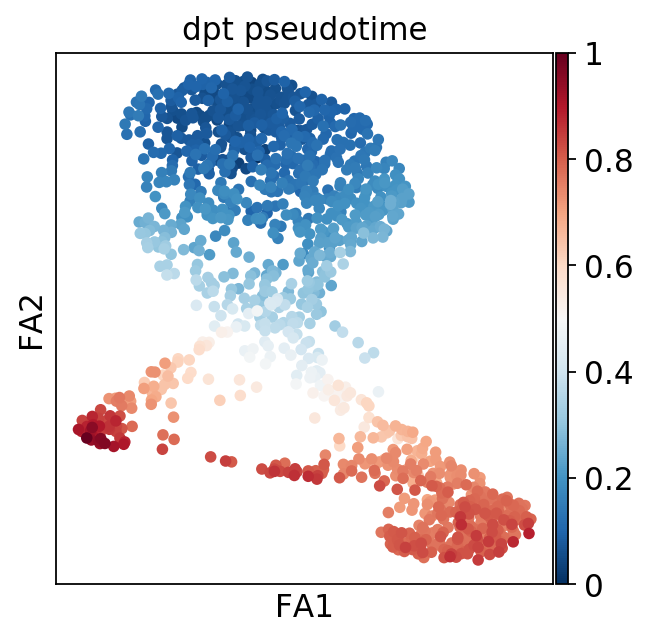

In [136]:
sc.tl.dpt(adata)
sc.pl.draw_graph(adata, color='dpt_pseudotime')

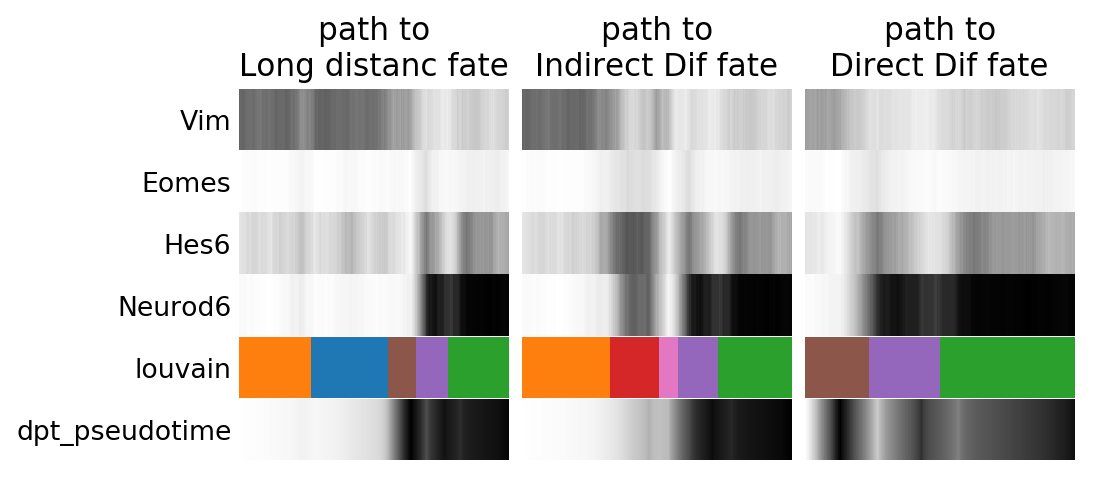

In [137]:
paths = [('Long distance', [1, 0, 5, 4, 2]),  # use the category indices instead of the cluster names
         ('Indirect Diff', [1, 3, 6, 4, 2]),
         ('Direct Diff',[5, 4, 2])]
_, axs = pl.subplots(ncols=3, figsize=(6, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.11})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata, path, gene_names,                         
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',                             
        title='path to\n{} fate'.format(descr[:-1]),
        return_data=True,
        show=False)
    data.to_csv('./write/paga_path_{}.csv'.format(descr))

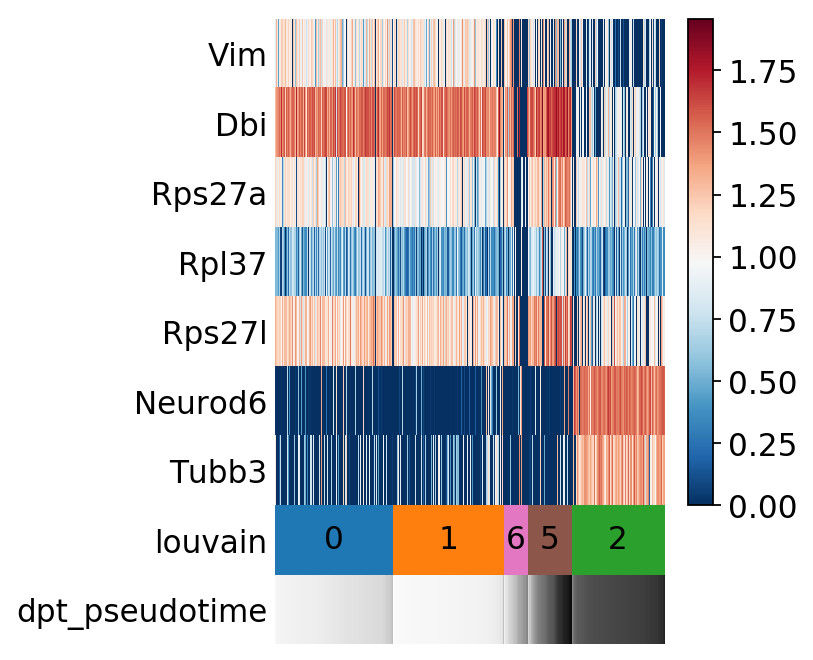

In [142]:
sc.pl.paga_path(adata, [0, 1, 6, 5, 2], ['Vim','Dbi','Rps27a','Rpl37','Rps27l','Neurod6','Tubb3'])